In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import sklearn
import pandas as pd
import scipy

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [14]:
help("modules")


Please wait a moment while I gather a list of all available modules...



/usr/local/lib/python3.6/dist-packages/skimage/novice/__init__.py:103: UserWarning: The `skimage.novice` module was deprecated in version 0.14. It will be removed in 0.16.
  warnings.warn("The `skimage.novice` module was deprecated in version 0.14. "
/usr/local/lib/python3.6/dist-packages/skimage/viewer/utils/core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/usr/lib/python3/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client i

AptUrl              asyncore            json                secrets
CommandNotFound     atexit              jsonschema          secretstorage
Crypto              audioop             jupyter             select
DistUpgrade         autoreload          jupyter_client      selectors
HweSupportStatus    base64              jupyter_core        setuptools
IPython             bdb                 keyring             shelve
LanguageSelector    binascii            keyword             shlex
NvidiaDetector      binhex              kiwisolver          shutil
PIL                 bisect              language_support_pkgs signal
PyQt5               bleach              launchpadlib        simplegeneric
Quirks              brlapi              learn00n            simplejson
UbuntuDrivers       builtins            lib2to3             sip
UbuntuSystemService bz2                 linecache           sipconfig
UpdateManager       cProfile            locale              sipconfig_nd6
__future__          cairo   

In [2]:
import os
import glob

dataset_path = './dataset/'
train_path = os.path.join(dataset_path,'train','*','*')
test_path = os.path.join(dataset_path,'test','*')

train_files = glob.glob(train_path)
test_files = glob.glob(test_path)

In [3]:
print ("\n".join(s for s in train_files if 'cats' in s))

./dataset/train/cats/cat.2495.jpg
./dataset/train/cats/cat.4969.jpg
./dataset/train/cats/cat.600.jpg
./dataset/train/cats/cat.278.jpg
./dataset/train/cats/cat.4425.jpg
./dataset/train/cats/cat.2759.jpg
./dataset/train/cats/cat.2366.jpg
./dataset/train/cats/cat.192.jpg
./dataset/train/cats/cat.1191.jpg
./dataset/train/cats/cat.571.jpg
./dataset/train/cats/cat.2259.jpg
./dataset/train/cats/cat.929.jpg
./dataset/train/cats/cat.2101.jpg
./dataset/train/cats/cat.1348.jpg
./dataset/train/cats/cat.4632.jpg
./dataset/train/cats/cat.4244.jpg
./dataset/train/cats/cat.4146.jpg
./dataset/train/cats/cat.956.jpg
./dataset/train/cats/cat.334.jpg
./dataset/train/cats/cat.3904.jpg
./dataset/train/cats/cat.2515.jpg
./dataset/train/cats/cat.3613.jpg
./dataset/train/cats/cat.3752.jpg
./dataset/train/cats/cat.4894.jpg
./dataset/train/cats/cat.2421.jpg
./dataset/train/cats/cat.189.jpg
./dataset/train/cats/cat.1721.jpg
./dataset/train/cats/cat.751.jpg
./dataset/train/cats/cat.3980.jpg
./dataset/train/cats/ca

In [4]:
test_files

['./dataset/test/8520.jpg',
 './dataset/test/7293.jpg',
 './dataset/test/3251.jpg',
 './dataset/test/11802.jpg',
 './dataset/test/3679.jpg',
 './dataset/test/4331.jpg',
 './dataset/test/9113.jpg',
 './dataset/test/11064.jpg',
 './dataset/test/11551.jpg',
 './dataset/test/6592.jpg',
 './dataset/test/3718.jpg',
 './dataset/test/6969.jpg',
 './dataset/test/4032.jpg',
 './dataset/test/6699.jpg',
 './dataset/test/9333.jpg',
 './dataset/test/9998.jpg',
 './dataset/test/1213.jpg',
 './dataset/test/1428.jpg',
 './dataset/test/381.jpg',
 './dataset/test/1917.jpg',
 './dataset/test/8419.jpg',
 './dataset/test/803.jpg',
 './dataset/test/10474.jpg',
 './dataset/test/542.jpg',
 './dataset/test/5267.jpg',
 './dataset/test/3796.jpg',
 './dataset/test/3468.jpg',
 './dataset/test/2317.jpg',
 './dataset/test/9805.jpg',
 './dataset/test/9976.jpg',
 './dataset/test/8585.jpg',
 './dataset/test/5958.jpg',
 './dataset/test/11140.jpg',
 './dataset/test/2453.jpg',
 './dataset/test/11249.jpg',
 './dataset/test/

./dataset/train/cats/cat.2646.jpg


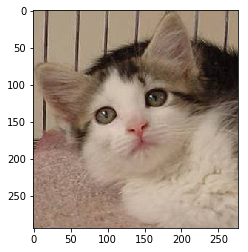

In [118]:
import random
import skimage.io

random_file = random.choice(train_files)
print(random_file)

img = skimage.io.imread(random_file)
plt.figure()
plt.imshow(img)
plt.show()

6.655128733880634e-06


/usr/local/lib/python3.6/dist-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


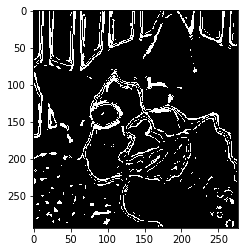

In [119]:
from skimage.filters import gaussian, laplace
from skimage.exposure import adjust_gamma,equalize_hist
from skimage.color import rgb2gray
from scipy.ndimage.filters import gaussian_filter
from skimage import img_as_float
from skimage.filters import threshold_mean


img_ = rgb2gray(img)

#sigma = [4,8,16]
img_ = gaussian_filter(img_,sigma=3)
img_ = equalize_hist(img_)
img_ = laplace(img_,ksize=3)
#img_laplace *= 255.0/img_laplace.max()
#img_laplace = np.array(img_laplace, dtype=np.uint8)
thresh = threshold_mean(img_)
img_ = img_ > 0.0082
print(thresh)

#img_gauss = gaussian_filter(img_gray,sigma=random.choice(sigma))
#img_adjgamma = adjust_gamma(img_gray,2)
#img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
#img_eqhist = equalize_hist(img_gray)

#plt.imshow(img_as_float(img_gauss),cmap="gray")
plt.imshow(img_,cmap="gray")
plt.show()

#skimage.io.imsave('./gauss.png',img_gauss)

In [9]:
for file in test_files:
    img = skimage.io.imread(file)
    img_gray = rgb2gray(img)
    #sigma = 8
    #img_adjgamma = adjust_gamma(img_gray,0.5)
    #img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
    img_laplace = laplace(img_gray,ksize=3)

    #plt.imshow(img_eqhist,cmap="gray")
    #plt.show()
    path = file.replace('dataset','dataset_laplace')
    folder = os.path.dirname(os.path.abspath(path))
    if not os.path.exists(folder):
        os.makedirs(folder)
    print(path)
    img_laplace *= 255.0/img_laplace.max()
    img_laplace = np.array(img_laplace, dtype=np.uint8)
    skimage.io.imsave(path,img_laplace)

/usr/local/lib/python3.6/dist-packages/skimage/restoration/uft.py:447: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  impr[([slice(1, 2)] * ndim)] = 2.0 * ndim


./dataset_laplace/test/8520.jpg
./dataset_laplace/test/7293.jpg
./dataset_laplace/test/3251.jpg
./dataset_laplace/test/11802.jpg
./dataset_laplace/test/3679.jpg
./dataset_laplace/test/4331.jpg
./dataset_laplace/test/9113.jpg
./dataset_laplace/test/11064.jpg
./dataset_laplace/test/11551.jpg
./dataset_laplace/test/6592.jpg
./dataset_laplace/test/3718.jpg
./dataset_laplace/test/6969.jpg
./dataset_laplace/test/4032.jpg
./dataset_laplace/test/6699.jpg
./dataset_laplace/test/9333.jpg
./dataset_laplace/test/9998.jpg
./dataset_laplace/test/1213.jpg
./dataset_laplace/test/1428.jpg
./dataset_laplace/test/381.jpg
./dataset_laplace/test/1917.jpg
./dataset_laplace/test/8419.jpg
./dataset_laplace/test/803.jpg
./dataset_laplace/test/10474.jpg
./dataset_laplace/test/542.jpg
./dataset_laplace/test/5267.jpg
./dataset_laplace/test/3796.jpg
./dataset_laplace/test/3468.jpg
./dataset_laplace/test/2317.jpg
./dataset_laplace/test/9805.jpg
./dataset_laplace/test/9976.jpg
./dataset_laplace/test/8585.jpg
./datas

./dataset_laplace/test/9268.jpg
./dataset_laplace/test/6795.jpg
./dataset_laplace/test/11950.jpg
./dataset_laplace/test/11922.jpg
./dataset_laplace/test/7588.jpg
./dataset_laplace/test/4328.jpg
./dataset_laplace/test/11613.jpg
./dataset_laplace/test/6045.jpg
./dataset_laplace/test/11462.jpg
./dataset_laplace/test/11902.jpg
./dataset_laplace/test/9773.jpg
./dataset_laplace/test/11757.jpg
./dataset_laplace/test/5517.jpg
./dataset_laplace/test/12479.jpg
./dataset_laplace/test/6946.jpg
./dataset_laplace/test/2410.jpg
./dataset_laplace/test/12023.jpg
./dataset_laplace/test/1242.jpg
./dataset_laplace/test/1477.jpg
./dataset_laplace/test/6818.jpg
./dataset_laplace/test/12188.jpg
./dataset_laplace/test/2686.jpg
./dataset_laplace/test/447.jpg
./dataset_laplace/test/9671.jpg
./dataset_laplace/test/8317.jpg
./dataset_laplace/test/2984.jpg
./dataset_laplace/test/6943.jpg
./dataset_laplace/test/11840.jpg
./dataset_laplace/test/9013.jpg
./dataset_laplace/test/1552.jpg
./dataset_laplace/test/6968.jpg

./dataset_laplace/test/8714.jpg
./dataset_laplace/test/6826.jpg
./dataset_laplace/test/682.jpg
./dataset_laplace/test/5235.jpg
./dataset_laplace/test/2.jpg
./dataset_laplace/test/586.jpg
./dataset_laplace/test/4447.jpg
./dataset_laplace/test/3830.jpg
./dataset_laplace/test/588.jpg
./dataset_laplace/test/6079.jpg
./dataset_laplace/test/5368.jpg
./dataset_laplace/test/7898.jpg
./dataset_laplace/test/4663.jpg
./dataset_laplace/test/2521.jpg
./dataset_laplace/test/7277.jpg
./dataset_laplace/test/5441.jpg
./dataset_laplace/test/10414.jpg
./dataset_laplace/test/5585.jpg
./dataset_laplace/test/1860.jpg
./dataset_laplace/test/12338.jpg
./dataset_laplace/test/4630.jpg
./dataset_laplace/test/9324.jpg
./dataset_laplace/test/9728.jpg
./dataset_laplace/test/5465.jpg
./dataset_laplace/test/11786.jpg
./dataset_laplace/test/12433.jpg
./dataset_laplace/test/6383.jpg
./dataset_laplace/test/193.jpg
./dataset_laplace/test/882.jpg
./dataset_laplace/test/7563.jpg
./dataset_laplace/test/7949.jpg
./dataset_la

./dataset_laplace/test/3675.jpg
./dataset_laplace/test/9794.jpg
./dataset_laplace/test/841.jpg
./dataset_laplace/test/8456.jpg
./dataset_laplace/test/3209.jpg
./dataset_laplace/test/11059.jpg
./dataset_laplace/test/4388.jpg
./dataset_laplace/test/2886.jpg
./dataset_laplace/test/7416.jpg
./dataset_laplace/test/10421.jpg
./dataset_laplace/test/10480.jpg
./dataset_laplace/test/2697.jpg
./dataset_laplace/test/6194.jpg
./dataset_laplace/test/4270.jpg
./dataset_laplace/test/1836.jpg
./dataset_laplace/test/2286.jpg
./dataset_laplace/test/6989.jpg
./dataset_laplace/test/2017.jpg
./dataset_laplace/test/2645.jpg
./dataset_laplace/test/1191.jpg
./dataset_laplace/test/10416.jpg
./dataset_laplace/test/4617.jpg
./dataset_laplace/test/7175.jpg
./dataset_laplace/test/4086.jpg
./dataset_laplace/test/361.jpg
./dataset_laplace/test/11277.jpg
./dataset_laplace/test/8411.jpg
./dataset_laplace/test/65.jpg
./dataset_laplace/test/5832.jpg
./dataset_laplace/test/9534.jpg
./dataset_laplace/test/4898.jpg
./datas

./dataset_laplace/test/5713.jpg
./dataset_laplace/test/1304.jpg
./dataset_laplace/test/4066.jpg
./dataset_laplace/test/10015.jpg
./dataset_laplace/test/9866.jpg
./dataset_laplace/test/4314.jpg
./dataset_laplace/test/6268.jpg
./dataset_laplace/test/5971.jpg
./dataset_laplace/test/6545.jpg
./dataset_laplace/test/4463.jpg
./dataset_laplace/test/2358.jpg
./dataset_laplace/test/11175.jpg
./dataset_laplace/test/8810.jpg
./dataset_laplace/test/9221.jpg
./dataset_laplace/test/117.jpg
./dataset_laplace/test/7702.jpg
./dataset_laplace/test/10665.jpg
./dataset_laplace/test/8068.jpg
./dataset_laplace/test/2720.jpg
./dataset_laplace/test/5717.jpg
./dataset_laplace/test/3076.jpg
./dataset_laplace/test/10212.jpg
./dataset_laplace/test/2998.jpg
./dataset_laplace/test/965.jpg
./dataset_laplace/test/10134.jpg
./dataset_laplace/test/6223.jpg
./dataset_laplace/test/9823.jpg
./dataset_laplace/test/4855.jpg
./dataset_laplace/test/6480.jpg
./dataset_laplace/test/5689.jpg
./dataset_laplace/test/2725.jpg
./dat

./dataset_laplace/test/8064.jpg
./dataset_laplace/test/2943.jpg
./dataset_laplace/test/4324.jpg
./dataset_laplace/test/2789.jpg
./dataset_laplace/test/10463.jpg
./dataset_laplace/test/9606.jpg
./dataset_laplace/test/12424.jpg
./dataset_laplace/test/9015.jpg
./dataset_laplace/test/2768.jpg
./dataset_laplace/test/10395.jpg
./dataset_laplace/test/4735.jpg
./dataset_laplace/test/594.jpg
./dataset_laplace/test/10861.jpg
./dataset_laplace/test/5979.jpg
./dataset_laplace/test/5015.jpg
./dataset_laplace/test/6644.jpg
./dataset_laplace/test/2447.jpg
./dataset_laplace/test/2334.jpg
./dataset_laplace/test/2929.jpg
./dataset_laplace/test/8855.jpg
./dataset_laplace/test/8797.jpg
./dataset_laplace/test/3177.jpg
./dataset_laplace/test/7203.jpg
./dataset_laplace/test/2884.jpg
./dataset_laplace/test/5818.jpg
./dataset_laplace/test/1718.jpg
./dataset_laplace/test/2314.jpg
./dataset_laplace/test/3355.jpg
./dataset_laplace/test/7434.jpg
./dataset_laplace/test/9037.jpg
./dataset_laplace/test/9225.jpg
./dat

./dataset_laplace/test/6911.jpg
./dataset_laplace/test/5761.jpg
./dataset_laplace/test/11924.jpg
./dataset_laplace/test/6173.jpg
./dataset_laplace/test/7483.jpg
./dataset_laplace/test/3482.jpg
./dataset_laplace/test/11511.jpg
./dataset_laplace/test/12138.jpg
./dataset_laplace/test/3342.jpg
./dataset_laplace/test/9415.jpg
./dataset_laplace/test/7024.jpg
./dataset_laplace/test/2731.jpg
./dataset_laplace/test/11777.jpg
./dataset_laplace/test/8339.jpg
./dataset_laplace/test/7278.jpg
./dataset_laplace/test/9014.jpg
./dataset_laplace/test/5898.jpg
./dataset_laplace/test/4609.jpg
./dataset_laplace/test/10763.jpg
./dataset_laplace/test/4242.jpg
./dataset_laplace/test/11325.jpg
./dataset_laplace/test/1953.jpg
./dataset_laplace/test/1495.jpg
./dataset_laplace/test/2420.jpg
./dataset_laplace/test/8945.jpg
./dataset_laplace/test/10788.jpg
./dataset_laplace/test/10390.jpg
./dataset_laplace/test/5910.jpg
./dataset_laplace/test/1458.jpg
./dataset_laplace/test/5184.jpg
./dataset_laplace/test/1041.jpg


./dataset_laplace/test/1480.jpg
./dataset_laplace/test/7821.jpg
./dataset_laplace/test/1410.jpg
./dataset_laplace/test/6866.jpg
./dataset_laplace/test/9388.jpg
./dataset_laplace/test/5449.jpg
./dataset_laplace/test/2734.jpg
./dataset_laplace/test/6650.jpg
./dataset_laplace/test/2753.jpg
./dataset_laplace/test/1107.jpg
./dataset_laplace/test/2633.jpg
./dataset_laplace/test/9514.jpg
./dataset_laplace/test/8831.jpg
./dataset_laplace/test/10722.jpg
./dataset_laplace/test/3149.jpg
./dataset_laplace/test/8078.jpg
./dataset_laplace/test/11931.jpg
./dataset_laplace/test/10808.jpg
./dataset_laplace/test/9661.jpg
./dataset_laplace/test/1558.jpg
./dataset_laplace/test/12490.jpg
./dataset_laplace/test/9159.jpg
./dataset_laplace/test/2567.jpg
./dataset_laplace/test/3935.jpg
./dataset_laplace/test/11982.jpg
./dataset_laplace/test/11969.jpg
./dataset_laplace/test/8485.jpg
./dataset_laplace/test/8552.jpg
./dataset_laplace/test/1172.jpg
./dataset_laplace/test/10323.jpg
./dataset_laplace/test/1468.jpg
.

./dataset_laplace/test/4720.jpg
./dataset_laplace/test/286.jpg
./dataset_laplace/test/7077.jpg
./dataset_laplace/test/8535.jpg
./dataset_laplace/test/3550.jpg
./dataset_laplace/test/5021.jpg
./dataset_laplace/test/3197.jpg
./dataset_laplace/test/12265.jpg
./dataset_laplace/test/111.jpg
./dataset_laplace/test/6256.jpg
./dataset_laplace/test/10936.jpg
./dataset_laplace/test/6438.jpg
./dataset_laplace/test/540.jpg
./dataset_laplace/test/11200.jpg
./dataset_laplace/test/3479.jpg
./dataset_laplace/test/8330.jpg
./dataset_laplace/test/7523.jpg
./dataset_laplace/test/11565.jpg
./dataset_laplace/test/774.jpg
./dataset_laplace/test/4435.jpg
./dataset_laplace/test/11268.jpg
./dataset_laplace/test/1925.jpg
./dataset_laplace/test/4842.jpg
./dataset_laplace/test/3333.jpg
./dataset_laplace/test/2635.jpg
./dataset_laplace/test/11529.jpg
./dataset_laplace/test/11527.jpg
./dataset_laplace/test/4441.jpg
./dataset_laplace/test/1588.jpg
./dataset_laplace/test/7447.jpg
./dataset_laplace/test/4511.jpg
./dat

./dataset_laplace/test/10380.jpg
./dataset_laplace/test/7038.jpg
./dataset_laplace/test/8528.jpg
./dataset_laplace/test/11080.jpg
./dataset_laplace/test/6310.jpg
./dataset_laplace/test/12162.jpg
./dataset_laplace/test/12402.jpg
./dataset_laplace/test/3424.jpg
./dataset_laplace/test/4731.jpg
./dataset_laplace/test/9950.jpg
./dataset_laplace/test/12426.jpg
./dataset_laplace/test/10311.jpg
./dataset_laplace/test/5785.jpg
./dataset_laplace/test/2629.jpg
./dataset_laplace/test/2547.jpg
./dataset_laplace/test/7192.jpg
./dataset_laplace/test/8370.jpg
./dataset_laplace/test/1342.jpg
./dataset_laplace/test/10566.jpg
./dataset_laplace/test/9707.jpg
./dataset_laplace/test/5201.jpg
./dataset_laplace/test/5878.jpg
./dataset_laplace/test/8393.jpg
./dataset_laplace/test/9109.jpg
./dataset_laplace/test/5157.jpg
./dataset_laplace/test/1823.jpg
./dataset_laplace/test/10048.jpg
./dataset_laplace/test/8371.jpg
./dataset_laplace/test/3531.jpg
./dataset_laplace/test/7280.jpg
./dataset_laplace/test/9494.jpg


./dataset_laplace/test/5023.jpg
./dataset_laplace/test/10291.jpg
./dataset_laplace/test/10013.jpg
./dataset_laplace/test/10525.jpg
./dataset_laplace/test/388.jpg
./dataset_laplace/test/11395.jpg
./dataset_laplace/test/1310.jpg
./dataset_laplace/test/5560.jpg
./dataset_laplace/test/11905.jpg
./dataset_laplace/test/2765.jpg
./dataset_laplace/test/1752.jpg
./dataset_laplace/test/8807.jpg
./dataset_laplace/test/11165.jpg
./dataset_laplace/test/1202.jpg
./dataset_laplace/test/1344.jpg
./dataset_laplace/test/12491.jpg
./dataset_laplace/test/8389.jpg
./dataset_laplace/test/453.jpg
./dataset_laplace/test/28.jpg
./dataset_laplace/test/5921.jpg
./dataset_laplace/test/1637.jpg
./dataset_laplace/test/5459.jpg
./dataset_laplace/test/6954.jpg
./dataset_laplace/test/1134.jpg
./dataset_laplace/test/12254.jpg
./dataset_laplace/test/4169.jpg
./dataset_laplace/test/3942.jpg
./dataset_laplace/test/10667.jpg
./dataset_laplace/test/8933.jpg
./dataset_laplace/test/12077.jpg
./dataset_laplace/test/116.jpg
./d

./dataset_laplace/test/3835.jpg
./dataset_laplace/test/9220.jpg
./dataset_laplace/test/4562.jpg
./dataset_laplace/test/4419.jpg
./dataset_laplace/test/632.jpg
./dataset_laplace/test/4363.jpg
./dataset_laplace/test/11230.jpg
./dataset_laplace/test/8558.jpg
./dataset_laplace/test/8457.jpg
./dataset_laplace/test/6005.jpg
./dataset_laplace/test/9314.jpg
./dataset_laplace/test/1099.jpg
./dataset_laplace/test/7719.jpg
./dataset_laplace/test/1680.jpg
./dataset_laplace/test/9771.jpg
./dataset_laplace/test/2931.jpg
./dataset_laplace/test/1142.jpg
./dataset_laplace/test/9418.jpg
./dataset_laplace/test/8540.jpg
./dataset_laplace/test/7466.jpg
./dataset_laplace/test/553.jpg
./dataset_laplace/test/1071.jpg
./dataset_laplace/test/9205.jpg
./dataset_laplace/test/9509.jpg
./dataset_laplace/test/6887.jpg
./dataset_laplace/test/7750.jpg
./dataset_laplace/test/3281.jpg
./dataset_laplace/test/11265.jpg
./dataset_laplace/test/6624.jpg
./dataset_laplace/test/9344.jpg
./dataset_laplace/test/8916.jpg
./datase

./dataset_laplace/test/4359.jpg
./dataset_laplace/test/12397.jpg
./dataset_laplace/test/5633.jpg
./dataset_laplace/test/8271.jpg
./dataset_laplace/test/6931.jpg
./dataset_laplace/test/12429.jpg
./dataset_laplace/test/5543.jpg
./dataset_laplace/test/9465.jpg
./dataset_laplace/test/9527.jpg
./dataset_laplace/test/7521.jpg
./dataset_laplace/test/9058.jpg
./dataset_laplace/test/10889.jpg
./dataset_laplace/test/902.jpg
./dataset_laplace/test/3102.jpg
./dataset_laplace/test/4130.jpg
./dataset_laplace/test/5611.jpg
./dataset_laplace/test/2985.jpg
./dataset_laplace/test/10135.jpg
./dataset_laplace/test/12178.jpg
./dataset_laplace/test/4588.jpg
./dataset_laplace/test/10002.jpg
./dataset_laplace/test/3454.jpg
./dataset_laplace/test/10154.jpg
./dataset_laplace/test/7082.jpg
./dataset_laplace/test/1063.jpg
./dataset_laplace/test/1756.jpg
./dataset_laplace/test/7723.jpg
./dataset_laplace/test/1565.jpg
./dataset_laplace/test/3972.jpg
./dataset_laplace/test/6291.jpg
./dataset_laplace/test/8950.jpg
./

./dataset_laplace/test/10287.jpg
./dataset_laplace/test/2636.jpg
./dataset_laplace/test/494.jpg
./dataset_laplace/test/5542.jpg
./dataset_laplace/test/4241.jpg
./dataset_laplace/test/6510.jpg
./dataset_laplace/test/1358.jpg
./dataset_laplace/test/8228.jpg
./dataset_laplace/test/11822.jpg
./dataset_laplace/test/3493.jpg
./dataset_laplace/test/8983.jpg
./dataset_laplace/test/1669.jpg
./dataset_laplace/test/1656.jpg
./dataset_laplace/test/8163.jpg
./dataset_laplace/test/5241.jpg
./dataset_laplace/test/1592.jpg
./dataset_laplace/test/10373.jpg
./dataset_laplace/test/4118.jpg
./dataset_laplace/test/5568.jpg
./dataset_laplace/test/26.jpg
./dataset_laplace/test/10370.jpg
./dataset_laplace/test/448.jpg
./dataset_laplace/test/9336.jpg
./dataset_laplace/test/4181.jpg
./dataset_laplace/test/10123.jpg
./dataset_laplace/test/1345.jpg
./dataset_laplace/test/5211.jpg
./dataset_laplace/test/2278.jpg
./dataset_laplace/test/9566.jpg
./dataset_laplace/test/6502.jpg
./dataset_laplace/test/2437.jpg
./datas

./dataset_laplace/test/5810.jpg
./dataset_laplace/test/5035.jpg
./dataset_laplace/test/8030.jpg
./dataset_laplace/test/10025.jpg
./dataset_laplace/test/6394.jpg
./dataset_laplace/test/3734.jpg
./dataset_laplace/test/10628.jpg
./dataset_laplace/test/3537.jpg
./dataset_laplace/test/11848.jpg
./dataset_laplace/test/1808.jpg
./dataset_laplace/test/9383.jpg
./dataset_laplace/test/7327.jpg
./dataset_laplace/test/3116.jpg
./dataset_laplace/test/5096.jpg
./dataset_laplace/test/8014.jpg
./dataset_laplace/test/6501.jpg
./dataset_laplace/test/12244.jpg
./dataset_laplace/test/519.jpg
./dataset_laplace/test/788.jpg
./dataset_laplace/test/3009.jpg
./dataset_laplace/test/3571.jpg
./dataset_laplace/test/7912.jpg
./dataset_laplace/test/8619.jpg
./dataset_laplace/test/4515.jpg
./dataset_laplace/test/8242.jpg
./dataset_laplace/test/2292.jpg
./dataset_laplace/test/9724.jpg
./dataset_laplace/test/637.jpg
./dataset_laplace/test/198.jpg
./dataset_laplace/test/12.jpg
./dataset_laplace/test/1247.jpg
./dataset_

./dataset_laplace/test/7123.jpg
./dataset_laplace/test/2241.jpg
./dataset_laplace/test/4512.jpg
./dataset_laplace/test/1893.jpg
./dataset_laplace/test/8712.jpg
./dataset_laplace/test/6405.jpg
./dataset_laplace/test/9329.jpg
./dataset_laplace/test/4723.jpg
./dataset_laplace/test/10998.jpg
./dataset_laplace/test/9407.jpg
./dataset_laplace/test/3806.jpg
./dataset_laplace/test/11067.jpg
./dataset_laplace/test/6753.jpg
./dataset_laplace/test/1528.jpg
./dataset_laplace/test/6904.jpg
./dataset_laplace/test/4228.jpg
./dataset_laplace/test/9001.jpg
./dataset_laplace/test/6681.jpg
./dataset_laplace/test/1061.jpg
./dataset_laplace/test/8919.jpg
./dataset_laplace/test/304.jpg
./dataset_laplace/test/1817.jpg
./dataset_laplace/test/1601.jpg
./dataset_laplace/test/5364.jpg
./dataset_laplace/test/11113.jpg
./dataset_laplace/test/12319.jpg
./dataset_laplace/test/549.jpg
./dataset_laplace/test/2120.jpg
./dataset_laplace/test/6523.jpg
./dataset_laplace/test/1083.jpg
./dataset_laplace/test/5764.jpg
./data

./dataset_laplace/test/5534.jpg
./dataset_laplace/test/6432.jpg
./dataset_laplace/test/7369.jpg
./dataset_laplace/test/7903.jpg
./dataset_laplace/test/5404.jpg
./dataset_laplace/test/3437.jpg
./dataset_laplace/test/2658.jpg
./dataset_laplace/test/3464.jpg
./dataset_laplace/test/2544.jpg
./dataset_laplace/test/10288.jpg
./dataset_laplace/test/1880.jpg
./dataset_laplace/test/4760.jpg
./dataset_laplace/test/10122.jpg
./dataset_laplace/test/5918.jpg
./dataset_laplace/test/2662.jpg
./dataset_laplace/test/3912.jpg
./dataset_laplace/test/8204.jpg
./dataset_laplace/test/7446.jpg
./dataset_laplace/test/5779.jpg
./dataset_laplace/test/4747.jpg
./dataset_laplace/test/6305.jpg
./dataset_laplace/test/12137.jpg
./dataset_laplace/test/3683.jpg
./dataset_laplace/test/6187.jpg
./dataset_laplace/test/2281.jpg
./dataset_laplace/test/10092.jpg
./dataset_laplace/test/11075.jpg
./dataset_laplace/test/2602.jpg
./dataset_laplace/test/8331.jpg
./dataset_laplace/test/8299.jpg
./dataset_laplace/test/10100.jpg
./

./dataset_laplace/test/7455.jpg
./dataset_laplace/test/9722.jpg
./dataset_laplace/test/2266.jpg
./dataset_laplace/test/12006.jpg
./dataset_laplace/test/3929.jpg
./dataset_laplace/test/11930.jpg
./dataset_laplace/test/956.jpg
./dataset_laplace/test/3283.jpg
./dataset_laplace/test/8377.jpg
./dataset_laplace/test/6263.jpg
./dataset_laplace/test/11424.jpg
./dataset_laplace/test/3433.jpg
./dataset_laplace/test/3404.jpg
./dataset_laplace/test/2721.jpg
./dataset_laplace/test/1465.jpg
./dataset_laplace/test/10627.jpg
./dataset_laplace/test/4694.jpg
./dataset_laplace/test/1541.jpg
./dataset_laplace/test/3071.jpg
./dataset_laplace/test/2028.jpg
./dataset_laplace/test/3864.jpg
./dataset_laplace/test/9542.jpg
./dataset_laplace/test/12222.jpg
./dataset_laplace/test/6890.jpg
./dataset_laplace/test/6364.jpg
./dataset_laplace/test/9524.jpg
./dataset_laplace/test/9339.jpg
./dataset_laplace/test/4960.jpg
./dataset_laplace/test/634.jpg
./dataset_laplace/test/9683.jpg
./dataset_laplace/test/1215.jpg
./dat

./dataset_laplace/test/9921.jpg
./dataset_laplace/test/3680.jpg
./dataset_laplace/test/464.jpg
./dataset_laplace/test/10149.jpg
./dataset_laplace/test/3376.jpg
./dataset_laplace/test/8353.jpg
./dataset_laplace/test/9814.jpg
./dataset_laplace/test/12293.jpg
./dataset_laplace/test/8296.jpg
./dataset_laplace/test/1024.jpg
./dataset_laplace/test/6874.jpg
./dataset_laplace/test/4040.jpg
./dataset_laplace/test/6742.jpg
./dataset_laplace/test/8533.jpg
./dataset_laplace/test/12183.jpg
./dataset_laplace/test/6900.jpg
./dataset_laplace/test/9303.jpg
./dataset_laplace/test/4596.jpg
./dataset_laplace/test/9576.jpg
./dataset_laplace/test/6450.jpg
./dataset_laplace/test/7330.jpg
./dataset_laplace/test/9994.jpg
./dataset_laplace/test/2572.jpg
./dataset_laplace/test/7320.jpg
./dataset_laplace/test/11803.jpg
./dataset_laplace/test/10966.jpg
./dataset_laplace/test/7215.jpg
./dataset_laplace/test/6747.jpg
./dataset_laplace/test/41.jpg
./dataset_laplace/test/9520.jpg
./dataset_laplace/test/12316.jpg
./dat

./dataset_laplace/test/7804.jpg
./dataset_laplace/test/8580.jpg
./dataset_laplace/test/9853.jpg
./dataset_laplace/test/9241.jpg
./dataset_laplace/test/9208.jpg
./dataset_laplace/test/10427.jpg
./dataset_laplace/test/9764.jpg
./dataset_laplace/test/2470.jpg
./dataset_laplace/test/5078.jpg
./dataset_laplace/test/9886.jpg
./dataset_laplace/test/11258.jpg
./dataset_laplace/test/4102.jpg
./dataset_laplace/test/1991.jpg
./dataset_laplace/test/8616.jpg
./dataset_laplace/test/11948.jpg
./dataset_laplace/test/7020.jpg
./dataset_laplace/test/3814.jpg
./dataset_laplace/test/10050.jpg
./dataset_laplace/test/5757.jpg
./dataset_laplace/test/10070.jpg
./dataset_laplace/test/1598.jpg
./dataset_laplace/test/2256.jpg
./dataset_laplace/test/5479.jpg
./dataset_laplace/test/8437.jpg
./dataset_laplace/test/9935.jpg
./dataset_laplace/test/3947.jpg
./dataset_laplace/test/2305.jpg
./dataset_laplace/test/8055.jpg
./dataset_laplace/test/11132.jpg
./dataset_laplace/test/5853.jpg
./dataset_laplace/test/3519.jpg
./

./dataset_laplace/test/522.jpg
./dataset_laplace/test/415.jpg
./dataset_laplace/test/3729.jpg
./dataset_laplace/test/12355.jpg
./dataset_laplace/test/10554.jpg
./dataset_laplace/test/2182.jpg
./dataset_laplace/test/3086.jpg
./dataset_laplace/test/10097.jpg
./dataset_laplace/test/5316.jpg
./dataset_laplace/test/5692.jpg
./dataset_laplace/test/5202.jpg
./dataset_laplace/test/7768.jpg
./dataset_laplace/test/11534.jpg
./dataset_laplace/test/5079.jpg
./dataset_laplace/test/3103.jpg
./dataset_laplace/test/3495.jpg
./dataset_laplace/test/11152.jpg
./dataset_laplace/test/10640.jpg
./dataset_laplace/test/3908.jpg
./dataset_laplace/test/8608.jpg
./dataset_laplace/test/2164.jpg
./dataset_laplace/test/10641.jpg
./dataset_laplace/test/11381.jpg
./dataset_laplace/test/3252.jpg
./dataset_laplace/test/5842.jpg
./dataset_laplace/test/11990.jpg
./dataset_laplace/test/11039.jpg
./dataset_laplace/test/10040.jpg
./dataset_laplace/test/10960.jpg
./dataset_laplace/test/7344.jpg
./dataset_laplace/test/461.jpg

./dataset_laplace/test/10264.jpg
./dataset_laplace/test/962.jpg
./dataset_laplace/test/8811.jpg
./dataset_laplace/test/9439.jpg
./dataset_laplace/test/2480.jpg
./dataset_laplace/test/3388.jpg
./dataset_laplace/test/3978.jpg
./dataset_laplace/test/7332.jpg
./dataset_laplace/test/1757.jpg
./dataset_laplace/test/2289.jpg
./dataset_laplace/test/604.jpg
./dataset_laplace/test/2219.jpg
./dataset_laplace/test/909.jpg
./dataset_laplace/test/7015.jpg
./dataset_laplace/test/8258.jpg
./dataset_laplace/test/7228.jpg
./dataset_laplace/test/905.jpg
./dataset_laplace/test/7878.jpg
./dataset_laplace/test/3939.jpg
./dataset_laplace/test/11794.jpg
./dataset_laplace/test/7406.jpg
./dataset_laplace/test/1505.jpg
./dataset_laplace/test/1791.jpg
./dataset_laplace/test/3155.jpg
./dataset_laplace/test/1354.jpg
./dataset_laplace/test/12403.jpg
./dataset_laplace/test/5188.jpg
./dataset_laplace/test/11176.jpg
./dataset_laplace/test/7737.jpg
./dataset_laplace/test/6769.jpg
./dataset_laplace/test/9141.jpg
./datase

./dataset_laplace/test/5938.jpg
./dataset_laplace/test/1000.jpg
./dataset_laplace/test/11537.jpg
./dataset_laplace/test/1776.jpg
./dataset_laplace/test/6191.jpg
./dataset_laplace/test/1636.jpg
./dataset_laplace/test/2212.jpg
./dataset_laplace/test/2663.jpg
./dataset_laplace/test/9614.jpg
./dataset_laplace/test/11927.jpg
./dataset_laplace/test/7606.jpg
./dataset_laplace/test/4659.jpg
./dataset_laplace/test/6037.jpg
./dataset_laplace/test/8400.jpg
./dataset_laplace/test/2969.jpg
./dataset_laplace/test/11276.jpg
./dataset_laplace/test/6652.jpg
./dataset_laplace/test/7828.jpg
./dataset_laplace/test/5164.jpg
./dataset_laplace/test/3222.jpg
./dataset_laplace/test/1769.jpg
./dataset_laplace/test/2850.jpg
./dataset_laplace/test/1349.jpg
./dataset_laplace/test/3541.jpg
./dataset_laplace/test/9259.jpg
./dataset_laplace/test/2338.jpg
./dataset_laplace/test/7291.jpg
./dataset_laplace/test/12354.jpg
./dataset_laplace/test/10064.jpg
./dataset_laplace/test/6020.jpg
./dataset_laplace/test/7264.jpg
./d

./dataset_laplace/test/4114.jpg
./dataset_laplace/test/4383.jpg
./dataset_laplace/test/5844.jpg
./dataset_laplace/test/5575.jpg
./dataset_laplace/test/6696.jpg
./dataset_laplace/test/8575.jpg
./dataset_laplace/test/1837.jpg
./dataset_laplace/test/3053.jpg
./dataset_laplace/test/800.jpg
./dataset_laplace/test/2199.jpg
./dataset_laplace/test/1147.jpg
./dataset_laplace/test/1287.jpg
./dataset_laplace/test/10223.jpg
./dataset_laplace/test/11795.jpg
./dataset_laplace/test/628.jpg
./dataset_laplace/test/7062.jpg
./dataset_laplace/test/11430.jpg
./dataset_laplace/test/10478.jpg
./dataset_laplace/test/3465.jpg
./dataset_laplace/test/7246.jpg
./dataset_laplace/test/10255.jpg
./dataset_laplace/test/2418.jpg
./dataset_laplace/test/11320.jpg
./dataset_laplace/test/10757.jpg
./dataset_laplace/test/7099.jpg
./dataset_laplace/test/1582.jpg
./dataset_laplace/test/6078.jpg
./dataset_laplace/test/9033.jpg
./dataset_laplace/test/7482.jpg
./dataset_laplace/test/10663.jpg
./dataset_laplace/test/1236.jpg
./

./dataset_laplace/test/1188.jpg
./dataset_laplace/test/8850.jpg
./dataset_laplace/test/3558.jpg
./dataset_laplace/test/2870.jpg
./dataset_laplace/test/2090.jpg
./dataset_laplace/test/12060.jpg
./dataset_laplace/test/8754.jpg
./dataset_laplace/test/9590.jpg
./dataset_laplace/test/331.jpg
./dataset_laplace/test/3574.jpg
./dataset_laplace/test/1427.jpg
./dataset_laplace/test/4321.jpg
./dataset_laplace/test/10572.jpg
./dataset_laplace/test/721.jpg
./dataset_laplace/test/6240.jpg
./dataset_laplace/test/10170.jpg
./dataset_laplace/test/2518.jpg
./dataset_laplace/test/5552.jpg
./dataset_laplace/test/5541.jpg
./dataset_laplace/test/458.jpg
./dataset_laplace/test/10666.jpg
./dataset_laplace/test/4963.jpg
./dataset_laplace/test/3605.jpg
./dataset_laplace/test/1749.jpg
./dataset_laplace/test/234.jpg
./dataset_laplace/test/486.jpg
./dataset_laplace/test/6920.jpg
./dataset_laplace/test/7456.jpg
./dataset_laplace/test/7180.jpg
./dataset_laplace/test/4466.jpg
./dataset_laplace/test/6595.jpg
./dataset

./dataset_laplace/test/8598.jpg
./dataset_laplace/test/5627.jpg
./dataset_laplace/test/4640.jpg
./dataset_laplace/test/10363.jpg
./dataset_laplace/test/9279.jpg
./dataset_laplace/test/2630.jpg
./dataset_laplace/test/4294.jpg
./dataset_laplace/test/5426.jpg
./dataset_laplace/test/873.jpg
./dataset_laplace/test/1547.jpg
./dataset_laplace/test/8684.jpg
./dataset_laplace/test/9100.jpg
./dataset_laplace/test/8019.jpg
./dataset_laplace/test/9270.jpg
./dataset_laplace/test/4140.jpg
./dataset_laplace/test/6220.jpg
./dataset_laplace/test/4252.jpg
./dataset_laplace/test/11621.jpg
./dataset_laplace/test/7604.jpg
./dataset_laplace/test/2207.jpg
./dataset_laplace/test/10332.jpg
./dataset_laplace/test/3344.jpg
./dataset_laplace/test/11166.jpg
./dataset_laplace/test/1577.jpg
./dataset_laplace/test/5151.jpg
./dataset_laplace/test/6958.jpg
./dataset_laplace/test/10825.jpg
./dataset_laplace/test/3865.jpg
./dataset_laplace/test/8493.jpg
./dataset_laplace/test/12166.jpg
./dataset_laplace/test/5032.jpg
./d

./dataset_laplace/test/10014.jpg
./dataset_laplace/test/11812.jpg
./dataset_laplace/test/2151.jpg
./dataset_laplace/test/1670.jpg
./dataset_laplace/test/2594.jpg
./dataset_laplace/test/11693.jpg
./dataset_laplace/test/6903.jpg
./dataset_laplace/test/6928.jpg
./dataset_laplace/test/989.jpg
./dataset_laplace/test/4161.jpg
./dataset_laplace/test/12046.jpg
./dataset_laplace/test/7325.jpg
./dataset_laplace/test/130.jpg
./dataset_laplace/test/4864.jpg
./dataset_laplace/test/11731.jpg
./dataset_laplace/test/5597.jpg
./dataset_laplace/test/5411.jpg
./dataset_laplace/test/1673.jpg
./dataset_laplace/test/11853.jpg
./dataset_laplace/test/564.jpg
./dataset_laplace/test/1610.jpg
./dataset_laplace/test/11779.jpg
./dataset_laplace/test/11028.jpg
./dataset_laplace/test/4856.jpg
./dataset_laplace/test/1704.jpg
./dataset_laplace/test/1514.jpg
./dataset_laplace/test/3131.jpg
./dataset_laplace/test/12142.jpg
./dataset_laplace/test/8238.jpg
./dataset_laplace/test/7480.jpg
./dataset_laplace/test/12375.jpg
.

./dataset_laplace/test/6345.jpg
./dataset_laplace/test/152.jpg
./dataset_laplace/test/422.jpg
./dataset_laplace/test/228.jpg
./dataset_laplace/test/4412.jpg
./dataset_laplace/test/7372.jpg
./dataset_laplace/test/6766.jpg
./dataset_laplace/test/6507.jpg
./dataset_laplace/test/3110.jpg
./dataset_laplace/test/3527.jpg
./dataset_laplace/test/170.jpg
./dataset_laplace/test/4687.jpg
./dataset_laplace/test/3487.jpg
./dataset_laplace/test/7994.jpg
./dataset_laplace/test/10922.jpg
./dataset_laplace/test/9714.jpg
./dataset_laplace/test/4272.jpg
./dataset_laplace/test/11498.jpg
./dataset_laplace/test/8494.jpg
./dataset_laplace/test/2348.jpg
./dataset_laplace/test/1040.jpg
./dataset_laplace/test/4286.jpg
./dataset_laplace/test/8262.jpg
./dataset_laplace/test/3630.jpg
./dataset_laplace/test/1482.jpg
./dataset_laplace/test/6075.jpg
./dataset_laplace/test/8775.jpg
./dataset_laplace/test/3711.jpg
./dataset_laplace/test/11809.jpg
./dataset_laplace/test/9700.jpg
./dataset_laplace/test/2575.jpg
./dataset

./dataset_laplace/test/1731.jpg
./dataset_laplace/test/6716.jpg
./dataset_laplace/test/8683.jpg
./dataset_laplace/test/7232.jpg
./dataset_laplace/test/9170.jpg
./dataset_laplace/test/7079.jpg
./dataset_laplace/test/5237.jpg
./dataset_laplace/test/5518.jpg
./dataset_laplace/test/1283.jpg
./dataset_laplace/test/8893.jpg
./dataset_laplace/test/1794.jpg
./dataset_laplace/test/7818.jpg
./dataset_laplace/test/10589.jpg
./dataset_laplace/test/210.jpg
./dataset_laplace/test/7244.jpg
./dataset_laplace/test/624.jpg
./dataset_laplace/test/10324.jpg
./dataset_laplace/test/11817.jpg
./dataset_laplace/test/8973.jpg
./dataset_laplace/test/10717.jpg
./dataset_laplace/test/5066.jpg
./dataset_laplace/test/7329.jpg
./dataset_laplace/test/2939.jpg
./dataset_laplace/test/3074.jpg
./dataset_laplace/test/6367.jpg
./dataset_laplace/test/7566.jpg
./dataset_laplace/test/6827.jpg
./dataset_laplace/test/9659.jpg
./dataset_laplace/test/1219.jpg
./dataset_laplace/test/6728.jpg
./dataset_laplace/test/407.jpg
./datas

./dataset_laplace/test/4408.jpg
./dataset_laplace/test/2634.jpg
./dataset_laplace/test/9460.jpg
./dataset_laplace/test/2423.jpg
./dataset_laplace/test/9269.jpg
./dataset_laplace/test/9090.jpg
./dataset_laplace/test/750.jpg
./dataset_laplace/test/12259.jpg
./dataset_laplace/test/1376.jpg
./dataset_laplace/test/2650.jpg
./dataset_laplace/test/5102.jpg
./dataset_laplace/test/3480.jpg
./dataset_laplace/test/5004.jpg
./dataset_laplace/test/9845.jpg
./dataset_laplace/test/1138.jpg
./dataset_laplace/test/8361.jpg
./dataset_laplace/test/5943.jpg
./dataset_laplace/test/10167.jpg
./dataset_laplace/test/3219.jpg
./dataset_laplace/test/6489.jpg
./dataset_laplace/test/7973.jpg
./dataset_laplace/test/4808.jpg
./dataset_laplace/test/8235.jpg
./dataset_laplace/test/4703.jpg
./dataset_laplace/test/8289.jpg
./dataset_laplace/test/12011.jpg
./dataset_laplace/test/6361.jpg
./dataset_laplace/test/8143.jpg
./dataset_laplace/test/9926.jpg
./dataset_laplace/test/8593.jpg
./dataset_laplace/test/11800.jpg
./dat

./dataset_laplace/test/10876.jpg
./dataset_laplace/test/1792.jpg
./dataset_laplace/test/6579.jpg
./dataset_laplace/test/6830.jpg
./dataset_laplace/test/7354.jpg
./dataset_laplace/test/4080.jpg
./dataset_laplace/test/3928.jpg
./dataset_laplace/test/6796.jpg
./dataset_laplace/test/7450.jpg
./dataset_laplace/test/8592.jpg
./dataset_laplace/test/4797.jpg
./dataset_laplace/test/2871.jpg
./dataset_laplace/test/3307.jpg
./dataset_laplace/test/4928.jpg
./dataset_laplace/test/10042.jpg
./dataset_laplace/test/2296.jpg
./dataset_laplace/test/6851.jpg
./dataset_laplace/test/6967.jpg
./dataset_laplace/test/11015.jpg
./dataset_laplace/test/4902.jpg
./dataset_laplace/test/6873.jpg
./dataset_laplace/test/10945.jpg
./dataset_laplace/test/10901.jpg
./dataset_laplace/test/1294.jpg
./dataset_laplace/test/8199.jpg
./dataset_laplace/test/2216.jpg
./dataset_laplace/test/11030.jpg
./dataset_laplace/test/9905.jpg
./dataset_laplace/test/3430.jpg
./dataset_laplace/test/7654.jpg
./dataset_laplace/test/9822.jpg
./

./dataset_laplace/test/11262.jpg
./dataset_laplace/test/9087.jpg
./dataset_laplace/test/10804.jpg
./dataset_laplace/test/11073.jpg
./dataset_laplace/test/9803.jpg
./dataset_laplace/test/9847.jpg
./dataset_laplace/test/824.jpg
./dataset_laplace/test/2607.jpg
./dataset_laplace/test/8898.jpg
./dataset_laplace/test/8525.jpg
./dataset_laplace/test/488.jpg
./dataset_laplace/test/9181.jpg
./dataset_laplace/test/8233.jpg
./dataset_laplace/test/879.jpg
./dataset_laplace/test/11370.jpg
./dataset_laplace/test/9234.jpg
./dataset_laplace/test/5450.jpg
./dataset_laplace/test/2573.jpg
./dataset_laplace/test/11575.jpg
./dataset_laplace/test/11750.jpg
./dataset_laplace/test/2388.jpg
./dataset_laplace/test/2255.jpg
./dataset_laplace/test/9024.jpg
./dataset_laplace/test/2626.jpg
./dataset_laplace/test/7364.jpg
./dataset_laplace/test/6147.jpg
./dataset_laplace/test/12431.jpg
./dataset_laplace/test/19.jpg
./dataset_laplace/test/10802.jpg
./dataset_laplace/test/2568.jpg
./dataset_laplace/test/7275.jpg
./dat

./dataset_laplace/test/371.jpg
./dataset_laplace/test/10688.jpg
./dataset_laplace/test/8499.jpg
./dataset_laplace/test/2803.jpg
./dataset_laplace/test/4771.jpg
./dataset_laplace/test/5227.jpg
./dataset_laplace/test/4556.jpg
./dataset_laplace/test/500.jpg
./dataset_laplace/test/4930.jpg
./dataset_laplace/test/5482.jpg
./dataset_laplace/test/8107.jpg
./dataset_laplace/test/7270.jpg
./dataset_laplace/test/5284.jpg
./dataset_laplace/test/5751.jpg
./dataset_laplace/test/1111.jpg
./dataset_laplace/test/104.jpg
./dataset_laplace/test/9600.jpg
./dataset_laplace/test/10293.jpg
./dataset_laplace/test/5215.jpg
./dataset_laplace/test/2379.jpg
./dataset_laplace/test/1506.jpg
./dataset_laplace/test/7550.jpg
./dataset_laplace/test/7130.jpg
./dataset_laplace/test/6512.jpg
./dataset_laplace/test/3984.jpg
./dataset_laplace/test/1103.jpg
./dataset_laplace/test/680.jpg
./dataset_laplace/test/3526.jpg
./dataset_laplace/test/2737.jpg
./dataset_laplace/test/11400.jpg
./dataset_laplace/test/8463.jpg
./dataset

./dataset_laplace/test/9499.jpg
./dataset_laplace/test/9834.jpg
./dataset_laplace/test/2659.jpg
./dataset_laplace/test/10103.jpg
./dataset_laplace/test/89.jpg
./dataset_laplace/test/3676.jpg
./dataset_laplace/test/9356.jpg
./dataset_laplace/test/3778.jpg
./dataset_laplace/test/4015.jpg
./dataset_laplace/test/6082.jpg
./dataset_laplace/test/9030.jpg
./dataset_laplace/test/12182.jpg
./dataset_laplace/test/1943.jpg
./dataset_laplace/test/9739.jpg
./dataset_laplace/test/716.jpg
./dataset_laplace/test/6314.jpg
./dataset_laplace/test/11269.jpg
./dataset_laplace/test/9584.jpg
./dataset_laplace/test/5063.jpg
./dataset_laplace/test/320.jpg
./dataset_laplace/test/7233.jpg
./dataset_laplace/test/2966.jpg
./dataset_laplace/test/12202.jpg
./dataset_laplace/test/7227.jpg
./dataset_laplace/test/11883.jpg
./dataset_laplace/test/7791.jpg
./dataset_laplace/test/3554.jpg
./dataset_laplace/test/8609.jpg
./dataset_laplace/test/5529.jpg
./dataset_laplace/test/5305.jpg
./dataset_laplace/test/6566.jpg
./datas

./dataset_laplace/test/11033.jpg
./dataset_laplace/test/8026.jpg
./dataset_laplace/test/2945.jpg
./dataset_laplace/test/3940.jpg
./dataset_laplace/test/967.jpg
./dataset_laplace/test/7798.jpg
./dataset_laplace/test/6046.jpg
./dataset_laplace/test/5247.jpg
./dataset_laplace/test/9320.jpg
./dataset_laplace/test/4062.jpg
./dataset_laplace/test/3666.jpg
./dataset_laplace/test/7847.jpg
./dataset_laplace/test/5792.jpg
./dataset_laplace/test/229.jpg
./dataset_laplace/test/1435.jpg
./dataset_laplace/test/3182.jpg
./dataset_laplace/test/9572.jpg
./dataset_laplace/test/8061.jpg
./dataset_laplace/test/567.jpg
./dataset_laplace/test/2730.jpg
./dataset_laplace/test/702.jpg
./dataset_laplace/test/1184.jpg
./dataset_laplace/test/3674.jpg
./dataset_laplace/test/8386.jpg
./dataset_laplace/test/8488.jpg
./dataset_laplace/test/7616.jpg
./dataset_laplace/test/11099.jpg
./dataset_laplace/test/2743.jpg
./dataset_laplace/test/5563.jpg
./dataset_laplace/test/2374.jpg
./dataset_laplace/test/9445.jpg
./dataset_

./dataset_laplace/test/2291.jpg
./dataset_laplace/test/954.jpg
./dataset_laplace/test/12272.jpg
./dataset_laplace/test/2539.jpg
./dataset_laplace/test/5538.jpg
./dataset_laplace/test/5118.jpg
./dataset_laplace/test/9901.jpg
./dataset_laplace/test/3068.jpg
./dataset_laplace/test/7402.jpg
./dataset_laplace/test/9906.jpg
./dataset_laplace/test/9816.jpg
./dataset_laplace/test/10148.jpg
./dataset_laplace/test/3104.jpg
./dataset_laplace/test/12324.jpg
./dataset_laplace/test/6976.jpg
./dataset_laplace/test/6601.jpg
./dataset_laplace/test/2112.jpg
./dataset_laplace/test/6229.jpg
./dataset_laplace/test/10335.jpg
./dataset_laplace/test/30.jpg
./dataset_laplace/test/2153.jpg
./dataset_laplace/test/327.jpg
./dataset_laplace/test/8048.jpg
./dataset_laplace/test/10400.jpg
./dataset_laplace/test/4407.jpg
./dataset_laplace/test/3564.jpg
./dataset_laplace/test/4922.jpg
./dataset_laplace/test/5127.jpg
./dataset_laplace/test/10401.jpg
./dataset_laplace/test/5005.jpg
./dataset_laplace/test/11317.jpg
./dat

./dataset_laplace/test/8736.jpg
./dataset_laplace/test/11024.jpg
./dataset_laplace/test/12209.jpg
./dataset_laplace/test/8976.jpg
./dataset_laplace/test/8273.jpg
./dataset_laplace/test/6934.jpg
./dataset_laplace/test/7731.jpg
./dataset_laplace/test/1567.jpg
./dataset_laplace/test/9451.jpg
./dataset_laplace/test/2092.jpg
./dataset_laplace/test/1449.jpg
./dataset_laplace/test/7150.jpg
./dataset_laplace/test/1625.jpg
./dataset_laplace/test/9198.jpg
./dataset_laplace/test/10911.jpg
./dataset_laplace/test/8949.jpg
./dataset_laplace/test/11018.jpg
./dataset_laplace/test/1856.jpg
./dataset_laplace/test/6643.jpg
./dataset_laplace/test/4878.jpg
./dataset_laplace/test/8182.jpg
./dataset_laplace/test/11718.jpg
./dataset_laplace/test/7442.jpg
./dataset_laplace/test/1231.jpg
./dataset_laplace/test/10491.jpg
./dataset_laplace/test/4418.jpg
./dataset_laplace/test/9673.jpg
./dataset_laplace/test/3651.jpg
./dataset_laplace/test/7152.jpg
./dataset_laplace/test/8108.jpg
./dataset_laplace/test/5904.jpg
./

./dataset_laplace/test/3968.jpg
./dataset_laplace/test/1320.jpg
./dataset_laplace/test/1220.jpg
./dataset_laplace/test/288.jpg
./dataset_laplace/test/10895.jpg
./dataset_laplace/test/7181.jpg
./dataset_laplace/test/7137.jpg
./dataset_laplace/test/6201.jpg
./dataset_laplace/test/11516.jpg
./dataset_laplace/test/10318.jpg
./dataset_laplace/test/2556.jpg
./dataset_laplace/test/11713.jpg
./dataset_laplace/test/7116.jpg
./dataset_laplace/test/4475.jpg
./dataset_laplace/test/6097.jpg
./dataset_laplace/test/5087.jpg
./dataset_laplace/test/7633.jpg
./dataset_laplace/test/10907.jpg
./dataset_laplace/test/10309.jpg
./dataset_laplace/test/10374.jpg
./dataset_laplace/test/4485.jpg
./dataset_laplace/test/8336.jpg
./dataset_laplace/test/6061.jpg
./dataset_laplace/test/8322.jpg
./dataset_laplace/test/1017.jpg
./dataset_laplace/test/7582.jpg
./dataset_laplace/test/396.jpg
./dataset_laplace/test/5336.jpg
./dataset_laplace/test/1561.jpg
./dataset_laplace/test/9827.jpg
./dataset_laplace/test/88.jpg
./dat

./dataset_laplace/test/4749.jpg
./dataset_laplace/test/9068.jpg
./dataset_laplace/test/9637.jpg
./dataset_laplace/test/2013.jpg
./dataset_laplace/test/3506.jpg
./dataset_laplace/test/10856.jpg
./dataset_laplace/test/12284.jpg
./dataset_laplace/test/7858.jpg
./dataset_laplace/test/2404.jpg
./dataset_laplace/test/3115.jpg
./dataset_laplace/test/372.jpg
./dataset_laplace/test/1450.jpg
./dataset_laplace/test/10644.jpg
./dataset_laplace/test/11658.jpg
./dataset_laplace/test/1916.jpg
./dataset_laplace/test/1089.jpg
./dataset_laplace/test/4719.jpg
./dataset_laplace/test/6308.jpg
./dataset_laplace/test/11334.jpg
./dataset_laplace/test/9062.jpg
./dataset_laplace/test/4287.jpg
./dataset_laplace/test/2451.jpg
./dataset_laplace/test/345.jpg
./dataset_laplace/test/3179.jpg
./dataset_laplace/test/11081.jpg
./dataset_laplace/test/2660.jpg
./dataset_laplace/test/6713.jpg
./dataset_laplace/test/2035.jpg
./dataset_laplace/test/8096.jpg
./dataset_laplace/test/5596.jpg
./dataset_laplace/test/6408.jpg
./da

./dataset_laplace/test/7221.jpg
./dataset_laplace/test/4119.jpg
./dataset_laplace/test/8559.jpg
./dataset_laplace/test/3126.jpg
./dataset_laplace/test/12349.jpg
./dataset_laplace/test/8517.jpg
./dataset_laplace/test/12127.jpg
./dataset_laplace/test/4055.jpg
./dataset_laplace/test/10730.jpg
./dataset_laplace/test/6253.jpg
./dataset_laplace/test/575.jpg
./dataset_laplace/test/128.jpg
./dataset_laplace/test/8612.jpg
./dataset_laplace/test/695.jpg
./dataset_laplace/test/4476.jpg
./dataset_laplace/test/4504.jpg
./dataset_laplace/test/10424.jpg
./dataset_laplace/test/4068.jpg
./dataset_laplace/test/8406.jpg
./dataset_laplace/test/3995.jpg
./dataset_laplace/test/37.jpg
./dataset_laplace/test/91.jpg
./dataset_laplace/test/9440.jpg
./dataset_laplace/test/9148.jpg
./dataset_laplace/test/393.jpg
./dataset_laplace/test/2375.jpg
./dataset_laplace/test/5174.jpg
./dataset_laplace/test/4387.jpg
./dataset_laplace/test/9206.jpg
./dataset_laplace/test/6803.jpg
./dataset_laplace/test/6598.jpg
./dataset_la

./dataset_laplace/test/7832.jpg
./dataset_laplace/test/5296.jpg
./dataset_laplace/test/6673.jpg
./dataset_laplace/test/6417.jpg
./dataset_laplace/test/7790.jpg
./dataset_laplace/test/10256.jpg
./dataset_laplace/test/2800.jpg
./dataset_laplace/test/4652.jpg
./dataset_laplace/test/2679.jpg
./dataset_laplace/test/4727.jpg
./dataset_laplace/test/3689.jpg
./dataset_laplace/test/1883.jpg
./dataset_laplace/test/7940.jpg
./dataset_laplace/test/8398.jpg
./dataset_laplace/test/11773.jpg
./dataset_laplace/test/11725.jpg
./dataset_laplace/test/12030.jpg
./dataset_laplace/test/11227.jpg
./dataset_laplace/test/3756.jpg
./dataset_laplace/test/8910.jpg
./dataset_laplace/test/8990.jpg
./dataset_laplace/test/2050.jpg
./dataset_laplace/test/8996.jpg
./dataset_laplace/test/783.jpg
./dataset_laplace/test/3672.jpg
./dataset_laplace/test/10119.jpg
./dataset_laplace/test/106.jpg
./dataset_laplace/test/2233.jpg
./dataset_laplace/test/1643.jpg
./dataset_laplace/test/5869.jpg
./dataset_laplace/test/12227.jpg
./d

./dataset_laplace/test/3656.jpg
./dataset_laplace/test/6461.jpg
./dataset_laplace/test/3398.jpg
./dataset_laplace/test/11248.jpg
./dataset_laplace/test/10786.jpg
./dataset_laplace/test/6403.jpg
./dataset_laplace/test/7935.jpg
./dataset_laplace/test/11739.jpg
./dataset_laplace/test/2034.jpg
./dataset_laplace/test/8904.jpg
./dataset_laplace/test/2880.jpg
./dataset_laplace/test/12336.jpg
./dataset_laplace/test/9545.jpg
./dataset_laplace/test/6691.jpg
./dataset_laplace/test/10959.jpg
./dataset_laplace/test/4778.jpg
./dataset_laplace/test/7052.jpg
./dataset_laplace/test/8719.jpg
./dataset_laplace/test/1141.jpg
./dataset_laplace/test/9583.jpg
./dataset_laplace/test/4212.jpg
./dataset_laplace/test/9272.jpg
./dataset_laplace/test/6961.jpg
./dataset_laplace/test/1875.jpg
./dataset_laplace/test/10085.jpg
./dataset_laplace/test/2136.jpg
./dataset_laplace/test/9019.jpg
./dataset_laplace/test/11069.jpg
./dataset_laplace/test/3663.jpg
./dataset_laplace/test/1511.jpg
./dataset_laplace/test/6923.jpg
.

./dataset_laplace/test/9783.jpg
./dataset_laplace/test/818.jpg
./dataset_laplace/test/3890.jpg
./dataset_laplace/test/4479.jpg
./dataset_laplace/test/287.jpg
./dataset_laplace/test/6397.jpg
./dataset_laplace/test/770.jpg
./dataset_laplace/test/11784.jpg
./dataset_laplace/test/608.jpg
./dataset_laplace/test/4280.jpg
./dataset_laplace/test/12357.jpg
./dataset_laplace/test/9488.jpg
./dataset_laplace/test/8173.jpg
./dataset_laplace/test/5908.jpg
./dataset_laplace/test/6465.jpg
./dataset_laplace/test/1855.jpg
./dataset_laplace/test/4638.jpg
./dataset_laplace/test/1739.jpg
./dataset_laplace/test/11953.jpg
./dataset_laplace/test/4184.jpg
./dataset_laplace/test/6993.jpg
./dataset_laplace/test/3055.jpg
./dataset_laplace/test/1602.jpg
./dataset_laplace/test/8621.jpg
./dataset_laplace/test/5802.jpg
./dataset_laplace/test/4446.jpg
./dataset_laplace/test/6617.jpg
./dataset_laplace/test/10818.jpg
./dataset_laplace/test/6071.jpg
./dataset_laplace/test/5108.jpg
./dataset_laplace/test/7661.jpg
./datase

./dataset_laplace/test/6195.jpg
./dataset_laplace/test/6509.jpg
./dataset_laplace/test/7664.jpg
./dataset_laplace/test/9635.jpg
./dataset_laplace/test/1162.jpg
./dataset_laplace/test/6926.jpg
./dataset_laplace/test/2938.jpg
./dataset_laplace/test/9515.jpg
./dataset_laplace/test/7724.jpg
./dataset_laplace/test/6799.jpg
./dataset_laplace/test/10814.jpg
./dataset_laplace/test/2664.jpg
./dataset_laplace/test/4107.jpg
./dataset_laplace/test/12306.jpg
./dataset_laplace/test/262.jpg
./dataset_laplace/test/9855.jpg
./dataset_laplace/test/10685.jpg
./dataset_laplace/test/12248.jpg
./dataset_laplace/test/10902.jpg
./dataset_laplace/test/4926.jpg
./dataset_laplace/test/10819.jpg
./dataset_laplace/test/2368.jpg
./dataset_laplace/test/10210.jpg
./dataset_laplace/test/451.jpg
./dataset_laplace/test/6980.jpg
./dataset_laplace/test/6395.jpg
./dataset_laplace/test/8887.jpg
./dataset_laplace/test/9991.jpg
./dataset_laplace/test/10886.jpg
./dataset_laplace/test/6531.jpg
./dataset_laplace/test/2448.jpg
./

./dataset_laplace/test/11901.jpg
./dataset_laplace/test/8162.jpg
./dataset_laplace/test/1802.jpg
./dataset_laplace/test/9480.jpg
./dataset_laplace/test/798.jpg
./dataset_laplace/test/11914.jpg
./dataset_laplace/test/2613.jpg
./dataset_laplace/test/3121.jpg
./dataset_laplace/test/3837.jpg
./dataset_laplace/test/9678.jpg
./dataset_laplace/test/11074.jpg
./dataset_laplace/test/11934.jpg
./dataset_laplace/test/10115.jpg
./dataset_laplace/test/2527.jpg
./dataset_laplace/test/5047.jpg
./dataset_laplace/test/4795.jpg
./dataset_laplace/test/12327.jpg
./dataset_laplace/test/2267.jpg
./dataset_laplace/test/9567.jpg
./dataset_laplace/test/8594.jpg
./dataset_laplace/test/12082.jpg
./dataset_laplace/test/8430.jpg
./dataset_laplace/test/6863.jpg
./dataset_laplace/test/4186.jpg
./dataset_laplace/test/11171.jpg
./dataset_laplace/test/2806.jpg
./dataset_laplace/test/12066.jpg
./dataset_laplace/test/3836.jpg
./dataset_laplace/test/1278.jpg
./dataset_laplace/test/10778.jpg
./dataset_laplace/test/10338.jp

./dataset_laplace/test/9893.jpg
./dataset_laplace/test/642.jpg
./dataset_laplace/test/8452.jpg
./dataset_laplace/test/7427.jpg
./dataset_laplace/test/3375.jpg
./dataset_laplace/test/4682.jpg
./dataset_laplace/test/707.jpg
./dataset_laplace/test/12018.jpg
./dataset_laplace/test/4044.jpg
./dataset_laplace/test/6455.jpg
./dataset_laplace/test/1685.jpg
./dataset_laplace/test/5967.jpg
./dataset_laplace/test/9021.jpg
./dataset_laplace/test/848.jpg
./dataset_laplace/test/4646.jpg
./dataset_laplace/test/8905.jpg
./dataset_laplace/test/8937.jpg
./dataset_laplace/test/2736.jpg
./dataset_laplace/test/5763.jpg
./dataset_laplace/test/2393.jpg
./dataset_laplace/test/9820.jpg
./dataset_laplace/test/5398.jpg
./dataset_laplace/test/10349.jpg
./dataset_laplace/test/3827.jpg
./dataset_laplace/test/985.jpg
./dataset_laplace/test/3133.jpg
./dataset_laplace/test/8466.jpg
./dataset_laplace/test/6156.jpg
./dataset_laplace/test/8179.jpg
./dataset_laplace/test/12156.jpg
./dataset_laplace/test/5171.jpg
./dataset

./dataset_laplace/test/7622.jpg
./dataset_laplace/test/8291.jpg
./dataset_laplace/test/7680.jpg
./dataset_laplace/test/3702.jpg
./dataset_laplace/test/3539.jpg
./dataset_laplace/test/6117.jpg
./dataset_laplace/test/1579.jpg
./dataset_laplace/test/6176.jpg
./dataset_laplace/test/8145.jpg
./dataset_laplace/test/10060.jpg
./dataset_laplace/test/6259.jpg
./dataset_laplace/test/6608.jpg
./dataset_laplace/test/431.jpg
./dataset_laplace/test/1574.jpg
./dataset_laplace/test/9713.jpg
./dataset_laplace/test/5254.jpg
./dataset_laplace/test/6262.jpg
./dataset_laplace/test/863.jpg
./dataset_laplace/test/11493.jpg
./dataset_laplace/test/5101.jpg
./dataset_laplace/test/5249.jpg
./dataset_laplace/test/12085.jpg
./dataset_laplace/test/9780.jpg
./dataset_laplace/test/3118.jpg
./dataset_laplace/test/7252.jpg
./dataset_laplace/test/10487.jpg
./dataset_laplace/test/4455.jpg
./dataset_laplace/test/9596.jpg
./dataset_laplace/test/11503.jpg
./dataset_laplace/test/11543.jpg
./dataset_laplace/test/4101.jpg
./da

./dataset_laplace/test/12213.jpg
./dataset_laplace/test/12049.jpg
./dataset_laplace/test/5813.jpg
./dataset_laplace/test/2896.jpg
./dataset_laplace/test/2618.jpg
./dataset_laplace/test/12421.jpg
./dataset_laplace/test/11423.jpg
./dataset_laplace/test/7696.jpg
./dataset_laplace/test/10803.jpg
./dataset_laplace/test/7386.jpg
./dataset_laplace/test/3924.jpg
./dataset_laplace/test/11622.jpg
./dataset_laplace/test/11630.jpg
./dataset_laplace/test/2149.jpg
./dataset_laplace/test/8521.jpg
./dataset_laplace/test/10731.jpg
./dataset_laplace/test/6158.jpg
./dataset_laplace/test/6822.jpg
./dataset_laplace/test/3846.jpg
./dataset_laplace/test/2820.jpg
./dataset_laplace/test/6645.jpg
./dataset_laplace/test/12386.jpg
./dataset_laplace/test/8489.jpg
./dataset_laplace/test/11421.jpg
./dataset_laplace/test/10225.jpg
./dataset_laplace/test/5900.jpg
./dataset_laplace/test/10743.jpg
./dataset_laplace/test/6069.jpg
./dataset_laplace/test/9563.jpg
./dataset_laplace/test/2104.jpg
./dataset_laplace/test/10475

In [120]:
for file in test_files:
    img = skimage.io.imread(file)
    img_gray = rgb2gray(img)
    #sigma = 8
    #img_adjgamma = adjust_gamma(img_gray,0.5)
    #img_gauss = gaussian(img_gray,sigma=sigma,multichannel=True)
    img_eqhist = equalize_hist(img_gray)

    #plt.imshow(img_eqhist,cmap="gray")
    #plt.show()
    path = file.replace('dataset','dataset_hist')
    folder = os.path.dirname(os.path.abspath(path))
    if not os.path.exists(folder):
        os.makedirs(folder)
    print(path)
    skimage.io.imsave(path,img_eqhist)

./dataset_hist/test/8520.jpg
./dataset_hist/test/7293.jpg
./dataset_hist/test/3251.jpg
./dataset_hist/test/11802.jpg
./dataset_hist/test/3679.jpg
./dataset_hist/test/4331.jpg
./dataset_hist/test/9113.jpg
./dataset_hist/test/11064.jpg
./dataset_hist/test/11551.jpg
./dataset_hist/test/6592.jpg


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


./dataset_hist/test/3718.jpg
./dataset_hist/test/6969.jpg
./dataset_hist/test/4032.jpg
./dataset_hist/test/6699.jpg
./dataset_hist/test/9333.jpg
./dataset_hist/test/9998.jpg
./dataset_hist/test/1213.jpg
./dataset_hist/test/1428.jpg
./dataset_hist/test/381.jpg
./dataset_hist/test/1917.jpg
./dataset_hist/test/8419.jpg
./dataset_hist/test/803.jpg
./dataset_hist/test/10474.jpg
./dataset_hist/test/542.jpg
./dataset_hist/test/5267.jpg
./dataset_hist/test/3796.jpg
./dataset_hist/test/3468.jpg
./dataset_hist/test/2317.jpg
./dataset_hist/test/9805.jpg
./dataset_hist/test/9976.jpg
./dataset_hist/test/8585.jpg
./dataset_hist/test/5958.jpg
./dataset_hist/test/11140.jpg
./dataset_hist/test/2453.jpg
./dataset_hist/test/11249.jpg
./dataset_hist/test/9369.jpg
./dataset_hist/test/3875.jpg
./dataset_hist/test/6093.jpg
./dataset_hist/test/10183.jpg
./dataset_hist/test/11203.jpg
./dataset_hist/test/9592.jpg
./dataset_hist/test/3418.jpg
./dataset_hist/test/773.jpg
./dataset_hist/test/9444.jpg
./dataset_his

./dataset_hist/test/347.jpg
./dataset_hist/test/899.jpg
./dataset_hist/test/9602.jpg
./dataset_hist/test/12264.jpg
./dataset_hist/test/6086.jpg
./dataset_hist/test/1907.jpg
./dataset_hist/test/5432.jpg
./dataset_hist/test/10812.jpg
./dataset_hist/test/7070.jpg
./dataset_hist/test/4027.jpg
./dataset_hist/test/10141.jpg
./dataset_hist/test/10767.jpg
./dataset_hist/test/9187.jpg
./dataset_hist/test/5430.jpg
./dataset_hist/test/2351.jpg
./dataset_hist/test/11789.jpg
./dataset_hist/test/6493.jpg
./dataset_hist/test/3525.jpg
./dataset_hist/test/998.jpg
./dataset_hist/test/9594.jpg
./dataset_hist/test/3887.jpg
./dataset_hist/test/6495.jpg
./dataset_hist/test/7031.jpg
./dataset_hist/test/3386.jpg
./dataset_hist/test/5273.jpg
./dataset_hist/test/5214.jpg
./dataset_hist/test/11025.jpg
./dataset_hist/test/8561.jpg
./dataset_hist/test/8774.jpg
./dataset_hist/test/2458.jpg
./dataset_hist/test/4941.jpg
./dataset_hist/test/6802.jpg
./dataset_hist/test/4619.jpg
./dataset_hist/test/8282.jpg
./dataset_h

./dataset_hist/test/6858.jpg
./dataset_hist/test/4826.jpg
./dataset_hist/test/6217.jpg
./dataset_hist/test/6245.jpg
./dataset_hist/test/11204.jpg
./dataset_hist/test/7568.jpg
./dataset_hist/test/3099.jpg
./dataset_hist/test/9864.jpg
./dataset_hist/test/11266.jpg
./dataset_hist/test/3790.jpg
./dataset_hist/test/3594.jpg
./dataset_hist/test/2308.jpg
./dataset_hist/test/7671.jpg
./dataset_hist/test/1560.jpg
./dataset_hist/test/8438.jpg
./dataset_hist/test/12047.jpg
./dataset_hist/test/4152.jpg
./dataset_hist/test/11865.jpg
./dataset_hist/test/3215.jpg
./dataset_hist/test/5445.jpg
./dataset_hist/test/3135.jpg
./dataset_hist/test/4079.jpg
./dataset_hist/test/5018.jpg
./dataset_hist/test/9928.jpg
./dataset_hist/test/6896.jpg
./dataset_hist/test/3882.jpg
./dataset_hist/test/9185.jpg
./dataset_hist/test/3036.jpg
./dataset_hist/test/10811.jpg
./dataset_hist/test/12279.jpg
./dataset_hist/test/4843.jpg
./dataset_hist/test/6031.jpg
./dataset_hist/test/10267.jpg
./dataset_hist/test/4489.jpg
./datas

./dataset_hist/test/6416.jpg
./dataset_hist/test/11589.jpg
./dataset_hist/test/10815.jpg
./dataset_hist/test/33.jpg
./dataset_hist/test/6666.jpg
./dataset_hist/test/11741.jpg
./dataset_hist/test/10974.jpg
./dataset_hist/test/7162.jpg
./dataset_hist/test/940.jpg
./dataset_hist/test/1204.jpg
./dataset_hist/test/9691.jpg
./dataset_hist/test/9459.jpg
./dataset_hist/test/1538.jpg
./dataset_hist/test/10703.jpg
./dataset_hist/test/10026.jpg
./dataset_hist/test/951.jpg
./dataset_hist/test/12302.jpg
./dataset_hist/test/2822.jpg
./dataset_hist/test/10232.jpg
./dataset_hist/test/6870.jpg
./dataset_hist/test/7969.jpg
./dataset_hist/test/10124.jpg
./dataset_hist/test/1408.jpg
./dataset_hist/test/11766.jpg
./dataset_hist/test/8001.jpg
./dataset_hist/test/11163.jpg
./dataset_hist/test/2933.jpg
./dataset_hist/test/4357.jpg
./dataset_hist/test/4550.jpg
./dataset_hist/test/11653.jpg
./dataset_hist/test/5307.jpg
./dataset_hist/test/11496.jpg
./dataset_hist/test/6630.jpg
./dataset_hist/test/1062.jpg
./dat

./dataset_hist/test/8144.jpg
./dataset_hist/test/1581.jpg
./dataset_hist/test/10484.jpg
./dataset_hist/test/2705.jpg
./dataset_hist/test/3565.jpg
./dataset_hist/test/4924.jpg
./dataset_hist/test/4316.jpg
./dataset_hist/test/7761.jpg
./dataset_hist/test/3476.jpg
./dataset_hist/test/2246.jpg
./dataset_hist/test/12013.jpg
./dataset_hist/test/3278.jpg
./dataset_hist/test/7783.jpg
./dataset_hist/test/3231.jpg
./dataset_hist/test/3667.jpg
./dataset_hist/test/9654.jpg
./dataset_hist/test/194.jpg
./dataset_hist/test/8188.jpg
./dataset_hist/test/10082.jpg
./dataset_hist/test/1035.jpg
./dataset_hist/test/5469.jpg
./dataset_hist/test/10565.jpg
./dataset_hist/test/9479.jpg
./dataset_hist/test/8757.jpg
./dataset_hist/test/11019.jpg
./dataset_hist/test/1140.jpg
./dataset_hist/test/1487.jpg
./dataset_hist/test/10526.jpg
./dataset_hist/test/479.jpg
./dataset_hist/test/7961.jpg
./dataset_hist/test/7498.jpg
./dataset_hist/test/6952.jpg
./dataset_hist/test/8844.jpg
./dataset_hist/test/8614.jpg
./dataset_

./dataset_hist/test/4203.jpg
./dataset_hist/test/7703.jpg
./dataset_hist/test/4336.jpg
./dataset_hist/test/6359.jpg
./dataset_hist/test/9340.jpg
./dataset_hist/test/9371.jpg
./dataset_hist/test/3872.jpg
./dataset_hist/test/4905.jpg
./dataset_hist/test/11445.jpg
./dataset_hist/test/392.jpg
./dataset_hist/test/6835.jpg
./dataset_hist/test/4970.jpg
./dataset_hist/test/11677.jpg
./dataset_hist/test/9755.jpg
./dataset_hist/test/8256.jpg
./dataset_hist/test/4410.jpg
./dataset_hist/test/1380.jpg
./dataset_hist/test/3254.jpg
./dataset_hist/test/10402.jpg
./dataset_hist/test/10874.jpg
./dataset_hist/test/3314.jpg
./dataset_hist/test/2041.jpg
./dataset_hist/test/11720.jpg
./dataset_hist/test/10303.jpg
./dataset_hist/test/1080.jpg
./dataset_hist/test/76.jpg
./dataset_hist/test/7204.jpg
./dataset_hist/test/548.jpg
./dataset_hist/test/1079.jpg
./dataset_hist/test/4231.jpg
./dataset_hist/test/6869.jpg
./dataset_hist/test/3560.jpg
./dataset_hist/test/8848.jpg
./dataset_hist/test/6685.jpg
./dataset_hi

./dataset_hist/test/6555.jpg
./dataset_hist/test/12361.jpg
./dataset_hist/test/6751.jpg
./dataset_hist/test/10679.jpg
./dataset_hist/test/7558.jpg
./dataset_hist/test/2680.jpg
./dataset_hist/test/2960.jpg
./dataset_hist/test/5720.jpg
./dataset_hist/test/5771.jpg
./dataset_hist/test/8818.jpg
./dataset_hist/test/3671.jpg
./dataset_hist/test/7382.jpg
./dataset_hist/test/8492.jpg
./dataset_hist/test/4833.jpg
./dataset_hist/test/2657.jpg
./dataset_hist/test/1212.jpg
./dataset_hist/test/11211.jpg
./dataset_hist/test/4598.jpg
./dataset_hist/test/9681.jpg
./dataset_hist/test/12122.jpg
./dataset_hist/test/4531.jpg
./dataset_hist/test/1339.jpg
./dataset_hist/test/8847.jpg
./dataset_hist/test/9229.jpg
./dataset_hist/test/8071.jpg
./dataset_hist/test/10581.jpg
./dataset_hist/test/31.jpg
./dataset_hist/test/9332.jpg
./dataset_hist/test/11006.jpg
./dataset_hist/test/2012.jpg
./dataset_hist/test/11932.jpg
./dataset_hist/test/3572.jpg
./dataset_hist/test/5216.jpg
./dataset_hist/test/6136.jpg
./dataset

./dataset_hist/test/10693.jpg
./dataset_hist/test/192.jpg
./dataset_hist/test/6320.jpg
./dataset_hist/test/7261.jpg
./dataset_hist/test/1075.jpg
./dataset_hist/test/9103.jpg
./dataset_hist/test/7524.jpg
./dataset_hist/test/10129.jpg
./dataset_hist/test/11886.jpg
./dataset_hist/test/11758.jpg
./dataset_hist/test/7339.jpg
./dataset_hist/test/177.jpg
./dataset_hist/test/7274.jpg
./dataset_hist/test/7083.jpg
./dataset_hist/test/2464.jpg
./dataset_hist/test/734.jpg
./dataset_hist/test/5073.jpg
./dataset_hist/test/438.jpg
./dataset_hist/test/9575.jpg
./dataset_hist/test/559.jpg
./dataset_hist/test/779.jpg
./dataset_hist/test/12273.jpg
./dataset_hist/test/3203.jpg
./dataset_hist/test/10522.jpg
./dataset_hist/test/7159.jpg
./dataset_hist/test/10447.jpg
./dataset_hist/test/4398.jpg
./dataset_hist/test/892.jpg
./dataset_hist/test/3774.jpg
./dataset_hist/test/8161.jpg
./dataset_hist/test/7066.jpg
./dataset_hist/test/5376.jpg
./dataset_hist/test/6547.jpg
./dataset_hist/test/947.jpg
./dataset_hist/

./dataset_hist/test/9248.jpg
./dataset_hist/test/9969.jpg
./dataset_hist/test/8479.jpg
./dataset_hist/test/2459.jpg
./dataset_hist/test/2600.jpg
./dataset_hist/test/3575.jpg
./dataset_hist/test/11480.jpg
./dataset_hist/test/4261.jpg
./dataset_hist/test/10708.jpg
./dataset_hist/test/7758.jpg
./dataset_hist/test/8930.jpg
./dataset_hist/test/11635.jpg
./dataset_hist/test/120.jpg
./dataset_hist/test/11820.jpg
./dataset_hist/test/1178.jpg
./dataset_hist/test/8417.jpg
./dataset_hist/test/1964.jpg
./dataset_hist/test/10964.jpg
./dataset_hist/test/12325.jpg
./dataset_hist/test/3168.jpg
./dataset_hist/test/11780.jpg
./dataset_hist/test/3175.jpg
./dataset_hist/test/1593.jpg
./dataset_hist/test/3166.jpg
./dataset_hist/test/1405.jpg
./dataset_hist/test/7967.jpg
./dataset_hist/test/2882.jpg
./dataset_hist/test/5348.jpg
./dataset_hist/test/2818.jpg
./dataset_hist/test/5678.jpg
./dataset_hist/test/1945.jpg
./dataset_hist/test/11371.jpg
./dataset_hist/test/6090.jpg
./dataset_hist/test/11714.jpg
./data

./dataset_hist/test/240.jpg
./dataset_hist/test/653.jpg
./dataset_hist/test/6587.jpg
./dataset_hist/test/1164.jpg
./dataset_hist/test/3524.jpg
./dataset_hist/test/5602.jpg
./dataset_hist/test/2707.jpg
./dataset_hist/test/6801.jpg
./dataset_hist/test/9858.jpg
./dataset_hist/test/11678.jpg
./dataset_hist/test/7166.jpg
./dataset_hist/test/6048.jpg
./dataset_hist/test/8515.jpg
./dataset_hist/test/4591.jpg
./dataset_hist/test/5513.jpg
./dataset_hist/test/8663.jpg
./dataset_hist/test/10680.jpg
./dataset_hist/test/9156.jpg
./dataset_hist/test/9829.jpg
./dataset_hist/test/9202.jpg
./dataset_hist/test/6445.jpg
./dataset_hist/test/5460.jpg
./dataset_hist/test/4674.jpg
./dataset_hist/test/12076.jpg
./dataset_hist/test/11252.jpg
./dataset_hist/test/7145.jpg
./dataset_hist/test/11557.jpg
./dataset_hist/test/5023.jpg
./dataset_hist/test/10291.jpg
./dataset_hist/test/10013.jpg
./dataset_hist/test/10525.jpg
./dataset_hist/test/388.jpg
./dataset_hist/test/11395.jpg
./dataset_hist/test/1310.jpg
./datase

./dataset_hist/test/8975.jpg
./dataset_hist/test/11009.jpg
./dataset_hist/test/11312.jpg
./dataset_hist/test/10110.jpg
./dataset_hist/test/9472.jpg
./dataset_hist/test/9207.jpg
./dataset_hist/test/5314.jpg
./dataset_hist/test/3835.jpg
./dataset_hist/test/9220.jpg
./dataset_hist/test/4562.jpg
./dataset_hist/test/4419.jpg
./dataset_hist/test/632.jpg
./dataset_hist/test/4363.jpg
./dataset_hist/test/11230.jpg
./dataset_hist/test/8558.jpg
./dataset_hist/test/8457.jpg
./dataset_hist/test/6005.jpg
./dataset_hist/test/9314.jpg
./dataset_hist/test/1099.jpg
./dataset_hist/test/7719.jpg
./dataset_hist/test/1680.jpg
./dataset_hist/test/9771.jpg
./dataset_hist/test/2931.jpg
./dataset_hist/test/1142.jpg
./dataset_hist/test/9418.jpg
./dataset_hist/test/8540.jpg
./dataset_hist/test/7466.jpg
./dataset_hist/test/553.jpg
./dataset_hist/test/1071.jpg
./dataset_hist/test/9205.jpg
./dataset_hist/test/9509.jpg
./dataset_hist/test/6887.jpg
./dataset_hist/test/7750.jpg
./dataset_hist/test/3281.jpg
./dataset_hi

./dataset_hist/test/10154.jpg
./dataset_hist/test/7082.jpg
./dataset_hist/test/1063.jpg
./dataset_hist/test/1756.jpg
./dataset_hist/test/7723.jpg
./dataset_hist/test/1565.jpg
./dataset_hist/test/3972.jpg
./dataset_hist/test/6291.jpg
./dataset_hist/test/8950.jpg
./dataset_hist/test/6789.jpg
./dataset_hist/test/3540.jpg
./dataset_hist/test/11358.jpg
./dataset_hist/test/7134.jpg
./dataset_hist/test/8725.jpg
./dataset_hist/test/6655.jpg
./dataset_hist/test/12348.jpg
./dataset_hist/test/1084.jpg
./dataset_hist/test/7380.jpg
./dataset_hist/test/5545.jpg
./dataset_hist/test/8327.jpg
./dataset_hist/test/2554.jpg
./dataset_hist/test/9365.jpg
./dataset_hist/test/3520.jpg
./dataset_hist/test/8843.jpg
./dataset_hist/test/805.jpg
./dataset_hist/test/3723.jpg
./dataset_hist/test/11797.jpg
./dataset_hist/test/7337.jpg
./dataset_hist/test/1900.jpg
./dataset_hist/test/7312.jpg
./dataset_hist/test/32.jpg
./dataset_hist/test/11558.jpg
./dataset_hist/test/10008.jpg
./dataset_hist/test/7975.jpg
./dataset_h

./dataset_hist/test/12252.jpg
./dataset_hist/test/10314.jpg
./dataset_hist/test/2517.jpg
./dataset_hist/test/2678.jpg
./dataset_hist/test/10055.jpg
./dataset_hist/test/8472.jpg
./dataset_hist/test/1308.jpg
./dataset_hist/test/5329.jpg
./dataset_hist/test/8690.jpg
./dataset_hist/test/7841.jpg
./dataset_hist/test/6014.jpg
./dataset_hist/test/12314.jpg
./dataset_hist/test/8206.jpg
./dataset_hist/test/6518.jpg
./dataset_hist/test/10063.jpg
./dataset_hist/test/5330.jpg
./dataset_hist/test/7214.jpg
./dataset_hist/test/4521.jpg
./dataset_hist/test/4056.jpg
./dataset_hist/test/6927.jpg
./dataset_hist/test/12128.jpg
./dataset_hist/test/10530.jpg
./dataset_hist/test/1840.jpg
./dataset_hist/test/11264.jpg
./dataset_hist/test/2039.jpg
./dataset_hist/test/1783.jpg
./dataset_hist/test/2290.jpg
./dataset_hist/test/5658.jpg
./dataset_hist/test/12256.jpg
./dataset_hist/test/3833.jpg
./dataset_hist/test/12251.jpg
./dataset_hist/test/916.jpg
./dataset_hist/test/9026.jpg
./dataset_hist/test/743.jpg
./data

./dataset_hist/test/4433.jpg
./dataset_hist/test/5128.jpg
./dataset_hist/test/6254.jpg
./dataset_hist/test/12341.jpg
./dataset_hist/test/42.jpg
./dataset_hist/test/11373.jpg
./dataset_hist/test/980.jpg
./dataset_hist/test/17.jpg
./dataset_hist/test/5605.jpg
./dataset_hist/test/10355.jpg
./dataset_hist/test/8758.jpg
./dataset_hist/test/2732.jpg
./dataset_hist/test/4182.jpg
./dataset_hist/test/2837.jpg
./dataset_hist/test/7676.jpg
./dataset_hist/test/4606.jpg
./dataset_hist/test/2970.jpg
./dataset_hist/test/1932.jpg
./dataset_hist/test/5158.jpg
./dataset_hist/test/8978.jpg
./dataset_hist/test/8109.jpg
./dataset_hist/test/5794.jpg
./dataset_hist/test/676.jpg
./dataset_hist/test/5399.jpg
./dataset_hist/test/10365.jpg
./dataset_hist/test/9749.jpg
./dataset_hist/test/4918.jpg
./dataset_hist/test/107.jpg
./dataset_hist/test/3289.jpg
./dataset_hist/test/1504.jpg
./dataset_hist/test/4865.jpg
./dataset_hist/test/10537.jpg
./dataset_hist/test/6264.jpg
./dataset_hist/test/3235.jpg
./dataset_hist/t

./dataset_hist/test/4350.jpg
./dataset_hist/test/5646.jpg
./dataset_hist/test/1489.jpg
./dataset_hist/test/8177.jpg
./dataset_hist/test/8867.jpg
./dataset_hist/test/9486.jpg
./dataset_hist/test/6433.jpg
./dataset_hist/test/9036.jpg
./dataset_hist/test/7864.jpg
./dataset_hist/test/7981.jpg
./dataset_hist/test/11703.jpg
./dataset_hist/test/6285.jpg
./dataset_hist/test/9343.jpg
./dataset_hist/test/6813.jpg
./dataset_hist/test/9934.jpg
./dataset_hist/test/10490.jpg
./dataset_hist/test/5815.jpg
./dataset_hist/test/7075.jpg
./dataset_hist/test/11892.jpg
./dataset_hist/test/4237.jpg
./dataset_hist/test/2165.jpg
./dataset_hist/test/6047.jpg
./dataset_hist/test/10020.jpg
./dataset_hist/test/6375.jpg
./dataset_hist/test/20.jpg
./dataset_hist/test/2515.jpg
./dataset_hist/test/125.jpg
./dataset_hist/test/6898.jpg
./dataset_hist/test/12430.jpg
./dataset_hist/test/7601.jpg
./dataset_hist/test/8464.jpg
./dataset_hist/test/8427.jpg
./dataset_hist/test/10104.jpg
./dataset_hist/test/11624.jpg
./dataset_

./dataset_hist/test/1117.jpg
./dataset_hist/test/4695.jpg
./dataset_hist/test/7525.jpg
./dataset_hist/test/12360.jpg
./dataset_hist/test/5942.jpg
./dataset_hist/test/317.jpg
./dataset_hist/test/8260.jpg
./dataset_hist/test/2601.jpg
./dataset_hist/test/3588.jpg
./dataset_hist/test/11826.jpg
./dataset_hist/test/4738.jpg
./dataset_hist/test/4949.jpg
./dataset_hist/test/4992.jpg
./dataset_hist/test/6277.jpg
./dataset_hist/test/9815.jpg
./dataset_hist/test/3414.jpg
./dataset_hist/test/12239.jpg
./dataset_hist/test/7597.jpg
./dataset_hist/test/10691.jpg
./dataset_hist/test/6810.jpg
./dataset_hist/test/4444.jpg
./dataset_hist/test/8668.jpg
./dataset_hist/test/6819.jpg
./dataset_hist/test/3660.jpg
./dataset_hist/test/3247.jpg
./dataset_hist/test/6966.jpg
./dataset_hist/test/11508.jpg
./dataset_hist/test/410.jpg
./dataset_hist/test/2476.jpg
./dataset_hist/test/10056.jpg
./dataset_hist/test/9372.jpg
./dataset_hist/test/4176.jpg
./dataset_hist/test/4210.jpg
./dataset_hist/test/10278.jpg
./dataset

./dataset_hist/test/1760.jpg
./dataset_hist/test/1195.jpg
./dataset_hist/test/10597.jpg
./dataset_hist/test/4561.jpg
./dataset_hist/test/6208.jpg
./dataset_hist/test/2487.jpg
./dataset_hist/test/2141.jpg
./dataset_hist/test/9149.jpg
./dataset_hist/test/5204.jpg
./dataset_hist/test/12164.jpg
./dataset_hist/test/7034.jpg
./dataset_hist/test/8769.jpg
./dataset_hist/test/4379.jpg
./dataset_hist/test/8126.jpg
./dataset_hist/test/3787.jpg
./dataset_hist/test/5177.jpg
./dataset_hist/test/10012.jpg
./dataset_hist/test/1946.jpg
./dataset_hist/test/166.jpg
./dataset_hist/test/7073.jpg
./dataset_hist/test/1801.jpg
./dataset_hist/test/10603.jpg
./dataset_hist/test/9020.jpg
./dataset_hist/test/22.jpg
./dataset_hist/test/5974.jpg
./dataset_hist/test/7921.jpg
./dataset_hist/test/4923.jpg
./dataset_hist/test/2488.jpg
./dataset_hist/test/10823.jpg
./dataset_hist/test/6355.jpg
./dataset_hist/test/3926.jpg
./dataset_hist/test/10248.jpg
./dataset_hist/test/9986.jpg
./dataset_hist/test/10496.jpg
./dataset_

./dataset_hist/test/2395.jpg
./dataset_hist/test/12342.jpg
./dataset_hist/test/11189.jpg
./dataset_hist/test/3817.jpg
./dataset_hist/test/10307.jpg
./dataset_hist/test/10454.jpg
./dataset_hist/test/5744.jpg
./dataset_hist/test/4522.jpg
./dataset_hist/test/6917.jpg
./dataset_hist/test/7373.jpg
./dataset_hist/test/552.jpg
./dataset_hist/test/9327.jpg
./dataset_hist/test/7056.jpg
./dataset_hist/test/10072.jpg
./dataset_hist/test/2132.jpg
./dataset_hist/test/4995.jpg
./dataset_hist/test/7827.jpg
./dataset_hist/test/1490.jpg
./dataset_hist/test/12234.jpg
./dataset_hist/test/4894.jpg
./dataset_hist/test/7831.jpg
./dataset_hist/test/3477.jpg
./dataset_hist/test/8778.jpg
./dataset_hist/test/4857.jpg
./dataset_hist/test/10687.jpg
./dataset_hist/test/9744.jpg
./dataset_hist/test/11591.jpg
./dataset_hist/test/3172.jpg
./dataset_hist/test/4214.jpg
./dataset_hist/test/10655.jpg
./dataset_hist/test/6373.jpg
./dataset_hist/test/3178.jpg
./dataset_hist/test/3198.jpg
./dataset_hist/test/2057.jpg
./data

./dataset_hist/test/7710.jpg
./dataset_hist/test/2438.jpg
./dataset_hist/test/5311.jpg
./dataset_hist/test/7430.jpg
./dataset_hist/test/681.jpg
./dataset_hist/test/3759.jpg
./dataset_hist/test/10942.jpg
./dataset_hist/test/9423.jpg
./dataset_hist/test/12364.jpg
./dataset_hist/test/1422.jpg
./dataset_hist/test/10243.jpg
./dataset_hist/test/9404.jpg
./dataset_hist/test/1181.jpg
./dataset_hist/test/5283.jpg
./dataset_hist/test/144.jpg
./dataset_hist/test/3409.jpg
./dataset_hist/test/5993.jpg
./dataset_hist/test/2979.jpg
./dataset_hist/test/691.jpg
./dataset_hist/test/10446.jpg
./dataset_hist/test/12470.jpg
./dataset_hist/test/6488.jpg
./dataset_hist/test/2051.jpg
./dataset_hist/test/8018.jpg
./dataset_hist/test/11900.jpg
./dataset_hist/test/2432.jpg
./dataset_hist/test/5250.jpg
./dataset_hist/test/4403.jpg
./dataset_hist/test/5259.jpg
./dataset_hist/test/9669.jpg
./dataset_hist/test/4965.jpg
./dataset_hist/test/7236.jpg
./dataset_hist/test/3236.jpg
./dataset_hist/test/7820.jpg
./dataset_h

./dataset_hist/test/2225.jpg
./dataset_hist/test/6611.jpg
./dataset_hist/test/9938.jpg
./dataset_hist/test/12212.jpg
./dataset_hist/test/9284.jpg
./dataset_hist/test/4411.jpg
./dataset_hist/test/3423.jpg
./dataset_hist/test/1113.jpg
./dataset_hist/test/6346.jpg
./dataset_hist/test/1478.jpg
./dataset_hist/test/3946.jpg
./dataset_hist/test/10653.jpg
./dataset_hist/test/6744.jpg
./dataset_hist/test/11459.jpg
./dataset_hist/test/4206.jpg
./dataset_hist/test/6639.jpg
./dataset_hist/test/4788.jpg
./dataset_hist/test/3392.jpg
./dataset_hist/test/896.jpg
./dataset_hist/test/6933.jpg
./dataset_hist/test/12434.jpg
./dataset_hist/test/10962.jpg
./dataset_hist/test/4222.jpg
./dataset_hist/test/12203.jpg
./dataset_hist/test/11967.jpg
./dataset_hist/test/1153.jpg
./dataset_hist/test/11760.jpg
./dataset_hist/test/8381.jpg
./dataset_hist/test/12243.jpg
./dataset_hist/test/810.jpg
./dataset_hist/test/2170.jpg
./dataset_hist/test/12163.jpg
./dataset_hist/test/10264.jpg
./dataset_hist/test/962.jpg
./data

./dataset_hist/test/1939.jpg
./dataset_hist/test/12014.jpg
./dataset_hist/test/723.jpg
./dataset_hist/test/7941.jpg
./dataset_hist/test/997.jpg
./dataset_hist/test/11260.jpg
./dataset_hist/test/7027.jpg
./dataset_hist/test/5938.jpg
./dataset_hist/test/1000.jpg
./dataset_hist/test/11537.jpg
./dataset_hist/test/1776.jpg
./dataset_hist/test/6191.jpg
./dataset_hist/test/1636.jpg
./dataset_hist/test/2212.jpg
./dataset_hist/test/2663.jpg
./dataset_hist/test/9614.jpg
./dataset_hist/test/11927.jpg
./dataset_hist/test/7606.jpg
./dataset_hist/test/4659.jpg
./dataset_hist/test/6037.jpg
./dataset_hist/test/8400.jpg
./dataset_hist/test/2969.jpg
./dataset_hist/test/11276.jpg
./dataset_hist/test/6652.jpg
./dataset_hist/test/7828.jpg
./dataset_hist/test/5164.jpg
./dataset_hist/test/3222.jpg
./dataset_hist/test/1769.jpg
./dataset_hist/test/2850.jpg
./dataset_hist/test/1349.jpg
./dataset_hist/test/3541.jpg
./dataset_hist/test/9259.jpg
./dataset_hist/test/2338.jpg
./dataset_hist/test/7291.jpg
./dataset_h

./dataset_hist/test/6078.jpg
./dataset_hist/test/9033.jpg
./dataset_hist/test/7482.jpg
./dataset_hist/test/10663.jpg
./dataset_hist/test/1236.jpg
./dataset_hist/test/7884.jpg
./dataset_hist/test/9497.jpg
./dataset_hist/test/211.jpg
./dataset_hist/test/8878.jpg
./dataset_hist/test/11544.jpg
./dataset_hist/test/4175.jpg
./dataset_hist/test/2055.jpg
./dataset_hist/test/2546.jpg
./dataset_hist/test/3027.jpg
./dataset_hist/test/829.jpg
./dataset_hist/test/5953.jpg
./dataset_hist/test/7224.jpg
./dataset_hist/test/10642.jpg
./dataset_hist/test/4029.jpg
./dataset_hist/test/10425.jpg
./dataset_hist/test/4251.jpg
./dataset_hist/test/1411.jpg
./dataset_hist/test/11170.jpg
./dataset_hist/test/1815.jpg
./dataset_hist/test/7054.jpg
./dataset_hist/test/6378.jpg
./dataset_hist/test/1439.jpg
./dataset_hist/test/6247.jpg
./dataset_hist/test/1822.jpg
./dataset_hist/test/10828.jpg
./dataset_hist/test/1209.jpg
./dataset_hist/test/2146.jpg
./dataset_hist/test/5578.jpg
./dataset_hist/test/9689.jpg
./dataset_

./dataset_hist/test/12083.jpg
./dataset_hist/test/7132.jpg
./dataset_hist/test/4940.jpg
./dataset_hist/test/11196.jpg
./dataset_hist/test/3607.jpg
./dataset_hist/test/11144.jpg
./dataset_hist/test/9628.jpg
./dataset_hist/test/3181.jpg
./dataset_hist/test/12407.jpg
./dataset_hist/test/10079.jpg
./dataset_hist/test/6714.jpg
./dataset_hist/test/1149.jpg
./dataset_hist/test/8870.jpg
./dataset_hist/test/2387.jpg
./dataset_hist/test/2242.jpg
./dataset_hist/test/8510.jpg
./dataset_hist/test/6306.jpg
./dataset_hist/test/5403.jpg
./dataset_hist/test/3472.jpg
./dataset_hist/test/5675.jpg
./dataset_hist/test/9933.jpg
./dataset_hist/test/8072.jpg
./dataset_hist/test/7980.jpg
./dataset_hist/test/9951.jpg
./dataset_hist/test/8737.jpg
./dataset_hist/test/11040.jpg
./dataset_hist/test/9925.jpg
./dataset_hist/test/10067.jpg
./dataset_hist/test/5788.jpg
./dataset_hist/test/2107.jpg
./dataset_hist/test/3478.jpg
./dataset_hist/test/6637.jpg
./dataset_hist/test/12339.jpg
./dataset_hist/test/5876.jpg
./data

./dataset_hist/test/7614.jpg
./dataset_hist/test/6995.jpg
./dataset_hist/test/5193.jpg
./dataset_hist/test/2191.jpg
./dataset_hist/test/1778.jpg
./dataset_hist/test/2075.jpg
./dataset_hist/test/12185.jpg
./dataset_hist/test/6081.jpg
./dataset_hist/test/10939.jpg
./dataset_hist/test/5915.jpg
./dataset_hist/test/4563.jpg
./dataset_hist/test/4458.jpg
./dataset_hist/test/8152.jpg
./dataset_hist/test/3442.jpg
./dataset_hist/test/8808.jpg
./dataset_hist/test/5705.jpg
./dataset_hist/test/4851.jpg
./dataset_hist/test/4936.jpg
./dataset_hist/test/2118.jpg
./dataset_hist/test/3049.jpg
./dataset_hist/test/3462.jpg
./dataset_hist/test/4439.jpg
./dataset_hist/test/1100.jpg
./dataset_hist/test/6188.jpg
./dataset_hist/test/4911.jpg
./dataset_hist/test/5749.jpg
./dataset_hist/test/7124.jpg
./dataset_hist/test/1258.jpg
./dataset_hist/test/9347.jpg
./dataset_hist/test/7363.jpg
./dataset_hist/test/3269.jpg
./dataset_hist/test/9757.jpg
./dataset_hist/test/4671.jpg
./dataset_hist/test/266.jpg
./dataset_his

./dataset_hist/test/10909.jpg
./dataset_hist/test/11538.jpg
./dataset_hist/test/12146.jpg
./dataset_hist/test/3592.jpg
./dataset_hist/test/7298.jpg
./dataset_hist/test/9161.jpg
./dataset_hist/test/2360.jpg
./dataset_hist/test/8793.jpg
./dataset_hist/test/4224.jpg
./dataset_hist/test/2081.jpg
./dataset_hist/test/11185.jpg
./dataset_hist/test/6702.jpg
./dataset_hist/test/10354.jpg
./dataset_hist/test/10464.jpg
./dataset_hist/test/1021.jpg
./dataset_hist/test/12389.jpg
./dataset_hist/test/5053.jpg
./dataset_hist/test/6137.jpg
./dataset_hist/test/3026.jpg
./dataset_hist/test/1136.jpg
./dataset_hist/test/5873.jpg
./dataset_hist/test/282.jpg
./dataset_hist/test/10233.jpg
./dataset_hist/test/8276.jpg
./dataset_hist/test/11742.jpg
./dataset_hist/test/4296.jpg
./dataset_hist/test/11345.jpg
./dataset_hist/test/835.jpg
./dataset_hist/test/1326.jpg
./dataset_hist/test/6162.jpg
./dataset_hist/test/6429.jpg
./dataset_hist/test/9626.jpg
./dataset_hist/test/3937.jpg
./dataset_hist/test/3320.jpg
./data

./dataset_hist/test/4544.jpg
./dataset_hist/test/7543.jpg
./dataset_hist/test/1735.jpg
./dataset_hist/test/5581.jpg
./dataset_hist/test/11026.jpg
./dataset_hist/test/8749.jpg
./dataset_hist/test/3422.jpg
./dataset_hist/test/4822.jpg
./dataset_hist/test/6244.jpg
./dataset_hist/test/4099.jpg
./dataset_hist/test/2135.jpg
./dataset_hist/test/832.jpg
./dataset_hist/test/10235.jpg
./dataset_hist/test/8914.jpg
./dataset_hist/test/4339.jpg
./dataset_hist/test/8059.jpg
./dataset_hist/test/1341.jpg
./dataset_hist/test/3589.jpg
./dataset_hist/test/4103.jpg
./dataset_hist/test/3989.jpg
./dataset_hist/test/11596.jpg
./dataset_hist/test/3641.jpg
./dataset_hist/test/2542.jpg
./dataset_hist/test/9912.jpg
./dataset_hist/test/4401.jpg
./dataset_hist/test/9072.jpg
./dataset_hist/test/1126.jpg
./dataset_hist/test/180.jpg
./dataset_hist/test/424.jpg
./dataset_hist/test/5664.jpg
./dataset_hist/test/1841.jpg
./dataset_hist/test/8833.jpg
./dataset_hist/test/2445.jpg
./dataset_hist/test/9885.jpg
./dataset_hist

./dataset_hist/test/10194.jpg
./dataset_hist/test/4683.jpg
./dataset_hist/test/843.jpg
./dataset_hist/test/10643.jpg
./dataset_hist/test/8366.jpg
./dataset_hist/test/10610.jpg
./dataset_hist/test/5875.jpg
./dataset_hist/test/6402.jpg
./dataset_hist/test/12186.jpg
./dataset_hist/test/375.jpg
./dataset_hist/test/3736.jpg
./dataset_hist/test/934.jpg
./dataset_hist/test/1193.jpg
./dataset_hist/test/5183.jpg
./dataset_hist/test/3165.jpg
./dataset_hist/test/7863.jpg
./dataset_hist/test/10007.jpg
./dataset_hist/test/11673.jpg
./dataset_hist/test/11293.jpg
./dataset_hist/test/8220.jpg
./dataset_hist/test/689.jpg
./dataset_hist/test/9150.jpg
./dataset_hist/test/4583.jpg
./dataset_hist/test/4071.jpg
./dataset_hist/test/1132.jpg
./dataset_hist/test/3024.jpg
./dataset_hist/test/1805.jpg
./dataset_hist/test/605.jpg
./dataset_hist/test/6430.jpg
./dataset_hist/test/10540.jpg
./dataset_hist/test/8896.jpg
./dataset_hist/test/9053.jpg
./dataset_hist/test/4785.jpg
./dataset_hist/test/6886.jpg
./dataset_h

./dataset_hist/test/3907.jpg
./dataset_hist/test/7441.jpg
./dataset_hist/test/6062.jpg
./dataset_hist/test/11679.jpg
./dataset_hist/test/6184.jpg
./dataset_hist/test/1671.jpg
./dataset_hist/test/7165.jpg
./dataset_hist/test/9553.jpg
./dataset_hist/test/6889.jpg
./dataset_hist/test/5492.jpg
./dataset_hist/test/906.jpg
./dataset_hist/test/10510.jpg
./dataset_hist/test/3054.jpg
./dataset_hist/test/6883.jpg
./dataset_hist/test/369.jpg
./dataset_hist/test/8093.jpg
./dataset_hist/test/2974.jpg
./dataset_hist/test/2553.jpg
./dataset_hist/test/8969.jpg
./dataset_hist/test/5444.jpg
./dataset_hist/test/1475.jpg
./dataset_hist/test/4391.jpg
./dataset_hist/test/3767.jpg
./dataset_hist/test/7254.jpg
./dataset_hist/test/462.jpg
./dataset_hist/test/7183.jpg
./dataset_hist/test/36.jpg
./dataset_hist/test/1042.jpg
./dataset_hist/test/2178.jpg
./dataset_hist/test/1491.jpg
./dataset_hist/test/1515.jpg
./dataset_hist/test/4635.jpg
./dataset_hist/test/11753.jpg
./dataset_hist/test/6159.jpg
./dataset_hist/t

./dataset_hist/test/8374.jpg
./dataset_hist/test/5132.jpg
./dataset_hist/test/918.jpg
./dataset_hist/test/8875.jpg
./dataset_hist/test/9939.jpg
./dataset_hist/test/2122.jpg
./dataset_hist/test/5418.jpg
./dataset_hist/test/2872.jpg
./dataset_hist/test/1280.jpg
./dataset_hist/test/2095.jpg
./dataset_hist/test/3447.jpg
./dataset_hist/test/7759.jpg
./dataset_hist/test/1881.jpg
./dataset_hist/test/10184.jpg
./dataset_hist/test/4134.jpg
./dataset_hist/test/4745.jpg
./dataset_hist/test/7596.jpg
./dataset_hist/test/363.jpg
./dataset_hist/test/992.jpg
./dataset_hist/test/8420.jpg
./dataset_hist/test/6206.jpg
./dataset_hist/test/3207.jpg
./dataset_hist/test/4406.jpg
./dataset_hist/test/8041.jpg
./dataset_hist/test/7435.jpg
./dataset_hist/test/5481.jpg
./dataset_hist/test/7907.jpg
./dataset_hist/test/163.jpg
./dataset_hist/test/4841.jpg
./dataset_hist/test/10528.jpg
./dataset_hist/test/7209.jpg
./dataset_hist/test/335.jpg
./dataset_hist/test/5991.jpg
./dataset_hist/test/10732.jpg
./dataset_hist/t

./dataset_hist/test/2123.jpg
./dataset_hist/test/3901.jpg
./dataset_hist/test/1952.jpg
./dataset_hist/test/4165.jpg
./dataset_hist/test/4541.jpg
./dataset_hist/test/85.jpg
./dataset_hist/test/496.jpg
./dataset_hist/test/8334.jpg
./dataset_hist/test/1060.jpg
./dataset_hist/test/9993.jpg
./dataset_hist/test/3412.jpg
./dataset_hist/test/9065.jpg
./dataset_hist/test/1796.jpg
./dataset_hist/test/2691.jpg
./dataset_hist/test/8095.jpg
./dataset_hist/test/2138.jpg
./dataset_hist/test/1483.jpg
./dataset_hist/test/7650.jpg
./dataset_hist/test/10171.jpg
./dataset_hist/test/12481.jpg
./dataset_hist/test/2280.jpg
./dataset_hist/test/650.jpg
./dataset_hist/test/2493.jpg
./dataset_hist/test/1842.jpg
./dataset_hist/test/5525.jpg
./dataset_hist/test/6977.jpg
./dataset_hist/test/11366.jpg
./dataset_hist/test/9873.jpg
./dataset_hist/test/12236.jpg
./dataset_hist/test/9817.jpg
./dataset_hist/test/1755.jpg
./dataset_hist/test/9359.jpg
./dataset_hist/test/8889.jpg
./dataset_hist/test/7231.jpg
./dataset_hist

./dataset_hist/test/6428.jpg
./dataset_hist/test/11668.jpg
./dataset_hist/test/3523.jpg
./dataset_hist/test/4906.jpg
./dataset_hist/test/10834.jpg
./dataset_hist/test/10207.jpg
./dataset_hist/test/10160.jpg
./dataset_hist/test/2760.jpg
./dataset_hist/test/1263.jpg
./dataset_hist/test/6056.jpg
./dataset_hist/test/5762.jpg
./dataset_hist/test/2071.jpg
./dataset_hist/test/9085.jpg
./dataset_hist/test/1693.jpg
./dataset_hist/test/1250.jpg
./dataset_hist/test/4732.jpg
./dataset_hist/test/67.jpg
./dataset_hist/test/4057.jpg
./dataset_hist/test/11593.jpg
./dataset_hist/test/5725.jpg
./dataset_hist/test/9499.jpg
./dataset_hist/test/9834.jpg
./dataset_hist/test/2659.jpg
./dataset_hist/test/10103.jpg
./dataset_hist/test/89.jpg
./dataset_hist/test/3676.jpg
./dataset_hist/test/9356.jpg
./dataset_hist/test/3778.jpg
./dataset_hist/test/4015.jpg
./dataset_hist/test/6082.jpg
./dataset_hist/test/9030.jpg
./dataset_hist/test/12182.jpg
./dataset_hist/test/1943.jpg
./dataset_hist/test/9739.jpg
./dataset_h

./dataset_hist/test/7798.jpg
./dataset_hist/test/6046.jpg
./dataset_hist/test/5247.jpg
./dataset_hist/test/9320.jpg
./dataset_hist/test/4062.jpg
./dataset_hist/test/3666.jpg
./dataset_hist/test/7847.jpg
./dataset_hist/test/5792.jpg
./dataset_hist/test/229.jpg
./dataset_hist/test/1435.jpg
./dataset_hist/test/3182.jpg
./dataset_hist/test/9572.jpg
./dataset_hist/test/8061.jpg
./dataset_hist/test/567.jpg
./dataset_hist/test/2730.jpg
./dataset_hist/test/702.jpg
./dataset_hist/test/1184.jpg
./dataset_hist/test/3674.jpg
./dataset_hist/test/8386.jpg
./dataset_hist/test/8488.jpg
./dataset_hist/test/7616.jpg
./dataset_hist/test/11099.jpg
./dataset_hist/test/2743.jpg
./dataset_hist/test/5563.jpg
./dataset_hist/test/2374.jpg
./dataset_hist/test/9445.jpg
./dataset_hist/test/9215.jpg
./dataset_hist/test/8065.jpg
./dataset_hist/test/3362.jpg
./dataset_hist/test/4576.jpg
./dataset_hist/test/9892.jpg
./dataset_hist/test/2698.jpg
./dataset_hist/test/8155.jpg
./dataset_hist/test/3789.jpg
./dataset_hist/t

./dataset_hist/test/8894.jpg
./dataset_hist/test/7195.jpg
./dataset_hist/test/2320.jpg
./dataset_hist/test/1417.jpg
./dataset_hist/test/11712.jpg
./dataset_hist/test/11838.jpg
./dataset_hist/test/4473.jpg
./dataset_hist/test/10955.jpg
./dataset_hist/test/10580.jpg
./dataset_hist/test/623.jpg
./dataset_hist/test/5566.jpg
./dataset_hist/test/2251.jpg
./dataset_hist/test/2545.jpg
./dataset_hist/test/3841.jpg
./dataset_hist/test/11737.jpg
./dataset_hist/test/9490.jpg
./dataset_hist/test/5558.jpg
./dataset_hist/test/6715.jpg
./dataset_hist/test/246.jpg
./dataset_hist/test/907.jpg
./dataset_hist/test/11981.jpg
./dataset_hist/test/9088.jpg
./dataset_hist/test/7058.jpg
./dataset_hist/test/10477.jpg
./dataset_hist/test/3337.jpg
./dataset_hist/test/2562.jpg
./dataset_hist/test/10150.jpg
./dataset_hist/test/2847.jpg
./dataset_hist/test/2037.jpg
./dataset_hist/test/3936.jpg
./dataset_hist/test/600.jpg
./dataset_hist/test/181.jpg
./dataset_hist/test/6542.jpg
./dataset_hist/test/7479.jpg
./dataset_h

./dataset_hist/test/5522.jpg
./dataset_hist/test/11765.jpg
./dataset_hist/test/6971.jpg
./dataset_hist/test/11847.jpg
./dataset_hist/test/12158.jpg
./dataset_hist/test/7093.jpg
./dataset_hist/test/5621.jpg
./dataset_hist/test/7686.jpg
./dataset_hist/test/5980.jpg
./dataset_hist/test/18.jpg
./dataset_hist/test/8113.jpg
./dataset_hist/test/7272.jpg
./dataset_hist/test/4425.jpg
./dataset_hist/test/4046.jpg
./dataset_hist/test/1884.jpg
./dataset_hist/test/10598.jpg
./dataset_hist/test/6221.jpg
./dataset_hist/test/8006.jpg
./dataset_hist/test/4654.jpg
./dataset_hist/test/9793.jpg
./dataset_hist/test/8385.jpg
./dataset_hist/test/5036.jpg
./dataset_hist/test/9959.jpg
./dataset_hist/test/258.jpg
./dataset_hist/test/517.jpg
./dataset_hist/test/12289.jpg
./dataset_hist/test/3985.jpg
./dataset_hist/test/7917.jpg
./dataset_hist/test/6447.jpg
./dataset_hist/test/122.jpg
./dataset_hist/test/9276.jpg
./dataset_hist/test/12139.jpg
./dataset_hist/test/12105.jpg
./dataset_hist/test/8823.jpg
./dataset_hi

./dataset_hist/test/11253.jpg
./dataset_hist/test/2208.jpg
./dataset_hist/test/2580.jpg
./dataset_hist/test/2500.jpg
./dataset_hist/test/1160.jpg
./dataset_hist/test/8676.jpg
./dataset_hist/test/4537.jpg
./dataset_hist/test/2540.jpg
./dataset_hist/test/8971.jpg
./dataset_hist/test/1857.jpg
./dataset_hist/test/5912.jpg
./dataset_hist/test/9098.jpg
./dataset_hist/test/9167.jpg
./dataset_hist/test/7128.jpg
./dataset_hist/test/9512.jpg
./dataset_hist/test/2593.jpg
./dataset_hist/test/1307.jpg
./dataset_hist/test/808.jpg
./dataset_hist/test/4392.jpg
./dataset_hist/test/3587.jpg
./dataset_hist/test/2963.jpg
./dataset_hist/test/1382.jpg
./dataset_hist/test/5864.jpg
./dataset_hist/test/1277.jpg
./dataset_hist/test/9474.jpg
./dataset_hist/test/5373.jpg
./dataset_hist/test/121.jpg
./dataset_hist/test/9434.jpg
./dataset_hist/test/8218.jpg
./dataset_hist/test/1697.jpg
./dataset_hist/test/9997.jpg
./dataset_hist/test/8776.jpg
./dataset_hist/test/11964.jpg
./dataset_hist/test/11408.jpg
./dataset_his

./dataset_hist/test/7938.jpg
./dataset_hist/test/10970.jpg
./dataset_hist/test/2162.jpg
./dataset_hist/test/7657.jpg
./dataset_hist/test/8899.jpg
./dataset_hist/test/12282.jpg
./dataset_hist/test/2809.jpg
./dataset_hist/test/1347.jpg
./dataset_hist/test/6120.jpg
./dataset_hist/test/4551.jpg
./dataset_hist/test/11918.jpg
./dataset_hist/test/6209.jpg
./dataset_hist/test/9254.jpg
./dataset_hist/test/9045.jpg
./dataset_hist/test/545.jpg
./dataset_hist/test/9230.jpg
./dataset_hist/test/5141.jpg
./dataset_hist/test/2414.jpg
./dataset_hist/test/1381.jpg
./dataset_hist/test/8786.jpg
./dataset_hist/test/356.jpg
./dataset_hist/test/11756.jpg
./dataset_hist/test/861.jpg
./dataset_hist/test/379.jpg
./dataset_hist/test/4996.jpg
./dataset_hist/test/1659.jpg
./dataset_hist/test/888.jpg
./dataset_hist/test/2264.jpg
./dataset_hist/test/6286.jpg
./dataset_hist/test/3742.jpg
./dataset_hist/test/6141.jpg
./dataset_hist/test/5503.jpg
./dataset_hist/test/7167.jpg
./dataset_hist/test/11494.jpg
./dataset_hist

./dataset_hist/test/436.jpg
./dataset_hist/test/4806.jpg
./dataset_hist/test/2148.jpg
./dataset_hist/test/3473.jpg
./dataset_hist/test/10661.jpg
./dataset_hist/test/6144.jpg
./dataset_hist/test/2508.jpg
./dataset_hist/test/10595.jpg
./dataset_hist/test/10813.jpg
./dataset_hist/test/12442.jpg
./dataset_hist/test/5654.jpg
./dataset_hist/test/10102.jpg
./dataset_hist/test/8661.jpg
./dataset_hist/test/1171.jpg
./dataset_hist/test/6947.jpg
./dataset_hist/test/622.jpg
./dataset_hist/test/7144.jpg
./dataset_hist/test/7992.jpg
./dataset_hist/test/5094.jpg
./dataset_hist/test/5626.jpg
./dataset_hist/test/7067.jpg
./dataset_hist/test/11177.jpg
./dataset_hist/test/3873.jpg
./dataset_hist/test/9536.jpg
./dataset_hist/test/3361.jpg
./dataset_hist/test/10848.jpg
./dataset_hist/test/7106.jpg
./dataset_hist/test/3.jpg
./dataset_hist/test/2681.jpg
./dataset_hist/test/2497.jpg
./dataset_hist/test/11458.jpg
./dataset_hist/test/6832.jpg
./dataset_hist/test/10062.jpg
./dataset_hist/test/629.jpg
./dataset_h

./dataset_hist/test/1281.jpg
./dataset_hist/test/8873.jpg
./dataset_hist/test/7387.jpg
./dataset_hist/test/7299.jpg
./dataset_hist/test/9450.jpg
./dataset_hist/test/3802.jpg
./dataset_hist/test/5071.jpg
./dataset_hist/test/2853.jpg
./dataset_hist/test/3962.jpg
./dataset_hist/test/4154.jpg
./dataset_hist/test/11949.jpg
./dataset_hist/test/8099.jpg
./dataset_hist/test/9899.jpg
./dataset_hist/test/2343.jpg
./dataset_hist/test/14.jpg
./dataset_hist/test/5907.jpg
./dataset_hist/test/5113.jpg
./dataset_hist/test/2243.jpg
./dataset_hist/test/2485.jpg
./dataset_hist/test/1050.jpg
./dataset_hist/test/4468.jpg
./dataset_hist/test/3196.jpg
./dataset_hist/test/2776.jpg
./dataset_hist/test/2121.jpg
./dataset_hist/test/10499.jpg
./dataset_hist/test/7101.jpg
./dataset_hist/test/35.jpg
./dataset_hist/test/2548.jpg
./dataset_hist/test/8432.jpg
./dataset_hist/test/12283.jpg
./dataset_hist/test/9909.jpg
./dataset_hist/test/4227.jpg
./dataset_hist/test/11994.jpg
./dataset_hist/test/11652.jpg
./dataset_his

./dataset_hist/test/4869.jpg
./dataset_hist/test/12064.jpg
./dataset_hist/test/3500.jpg
./dataset_hist/test/305.jpg
./dataset_hist/test/9758.jpg
./dataset_hist/test/8674.jpg
./dataset_hist/test/10327.jpg
./dataset_hist/test/6862.jpg
./dataset_hist/test/11010.jpg
./dataset_hist/test/10586.jpg
./dataset_hist/test/3758.jpg
./dataset_hist/test/3315.jpg
./dataset_hist/test/10683.jpg
./dataset_hist/test/12065.jpg
./dataset_hist/test/6834.jpg
./dataset_hist/test/10615.jpg
./dataset_hist/test/9916.jpg
./dataset_hist/test/10429.jpg
./dataset_hist/test/1343.jpg
./dataset_hist/test/5196.jpg
./dataset_hist/test/10704.jpg
./dataset_hist/test/3369.jpg
./dataset_hist/test/9005.jpg
./dataset_hist/test/4320.jpg
./dataset_hist/test/2005.jpg
./dataset_hist/test/4036.jpg
./dataset_hist/test/7408.jpg
./dataset_hist/test/10930.jpg
./dataset_hist/test/294.jpg
./dataset_hist/test/497.jpg
./dataset_hist/test/5487.jpg
./dataset_hist/test/299.jpg
./dataset_hist/test/3221.jpg
./dataset_hist/test/11785.jpg
./datas

./dataset_hist/test/1915.jpg
./dataset_hist/test/12428.jpg
./dataset_hist/test/8303.jpg
./dataset_hist/test/9954.jpg
./dataset_hist/test/400.jpg
./dataset_hist/test/5495.jpg
./dataset_hist/test/10061.jpg
./dataset_hist/test/1057.jpg
./dataset_hist/test/2936.jpg
./dataset_hist/test/10093.jpg
./dataset_hist/test/9571.jpg
./dataset_hist/test/5583.jpg
./dataset_hist/test/2198.jpg
./dataset_hist/test/948.jpg
./dataset_hist/test/3740.jpg
./dataset_hist/test/12469.jpg
./dataset_hist/test/1845.jpg
./dataset_hist/test/3224.jpg
./dataset_hist/test/12020.jpg
./dataset_hist/test/9153.jpg
./dataset_hist/test/11684.jpg
./dataset_hist/test/7785.jpg
./dataset_hist/test/2773.jpg
./dataset_hist/test/9487.jpg
./dataset_hist/test/7988.jpg
./dataset_hist/test/6349.jpg
./dataset_hist/test/5718.jpg
./dataset_hist/test/8050.jpg
./dataset_hist/test/11582.jpg
./dataset_hist/test/3266.jpg
./dataset_hist/test/1809.jpg
./dataset_hist/test/3535.jpg
./dataset_hist/test/1059.jpg
./dataset_hist/test/5554.jpg
./dataset

./dataset_hist/test/1481.jpg
./dataset_hist/test/6130.jpg
./dataset_hist/test/4075.jpg
./dataset_hist/test/7335.jpg
./dataset_hist/test/5791.jpg
./dataset_hist/test/9032.jpg
./dataset_hist/test/1389.jpg
./dataset_hist/test/4001.jpg
./dataset_hist/test/6745.jpg
./dataset_hist/test/1569.jpg
./dataset_hist/test/11191.jpg
./dataset_hist/test/2574.jpg
./dataset_hist/test/11043.jpg
./dataset_hist/test/10368.jpg
./dataset_hist/test/11999.jpg
./dataset_hist/test/675.jpg
./dataset_hist/test/521.jpg
./dataset_hist/test/2954.jpg
./dataset_hist/test/11061.jpg
./dataset_hist/test/6214.jpg
./dataset_hist/test/11901.jpg
./dataset_hist/test/8162.jpg
./dataset_hist/test/1802.jpg
./dataset_hist/test/9480.jpg
./dataset_hist/test/798.jpg
./dataset_hist/test/11914.jpg
./dataset_hist/test/2613.jpg
./dataset_hist/test/3121.jpg
./dataset_hist/test/3837.jpg
./dataset_hist/test/9678.jpg
./dataset_hist/test/11074.jpg
./dataset_hist/test/11934.jpg
./dataset_hist/test/10115.jpg
./dataset_hist/test/2527.jpg
./datas

./dataset_hist/test/5967.jpg
./dataset_hist/test/9021.jpg
./dataset_hist/test/848.jpg
./dataset_hist/test/4646.jpg
./dataset_hist/test/8905.jpg
./dataset_hist/test/8937.jpg
./dataset_hist/test/2736.jpg
./dataset_hist/test/5763.jpg
./dataset_hist/test/2393.jpg
./dataset_hist/test/9820.jpg
./dataset_hist/test/5398.jpg
./dataset_hist/test/10349.jpg
./dataset_hist/test/3827.jpg
./dataset_hist/test/985.jpg
./dataset_hist/test/3133.jpg
./dataset_hist/test/8466.jpg
./dataset_hist/test/6156.jpg
./dataset_hist/test/8179.jpg
./dataset_hist/test/12156.jpg
./dataset_hist/test/5171.jpg
./dataset_hist/test/2044.jpg
./dataset_hist/test/8729.jpg
./dataset_hist/test/9325.jpg
./dataset_hist/test/5796.jpg
./dataset_hist/test/4527.jpg
./dataset_hist/test/7584.jpg
./dataset_hist/test/5688.jpg
./dataset_hist/test/8117.jpg
./dataset_hist/test/9702.jpg
./dataset_hist/test/1010.jpg
./dataset_hist/test/11889.jpg
./dataset_hist/test/7193.jpg
./dataset_hist/test/6186.jpg
./dataset_hist/test/7983.jpg
./dataset_his

./dataset_hist/test/10076.jpg
./dataset_hist/test/11245.jpg
./dataset_hist/test/3905.jpg
./dataset_hist/test/495.jpg
./dataset_hist/test/966.jpg
./dataset_hist/test/1469.jpg
./dataset_hist/test/9139.jpg
./dataset_hist/test/9521.jpg
./dataset_hist/test/3244.jpg
./dataset_hist/test/10350.jpg
./dataset_hist/test/8842.jpg
./dataset_hist/test/9011.jpg
./dataset_hist/test/1143.jpg
./dataset_hist/test/9041.jpg
./dataset_hist/test/11407.jpg
./dataset_hist/test/6546.jpg
./dataset_hist/test/9239.jpg
./dataset_hist/test/7658.jpg
./dataset_hist/test/9956.jpg
./dataset_hist/test/5119.jpg
./dataset_hist/test/8358.jpg
./dataset_hist/test/532.jpg
./dataset_hist/test/3746.jpg
./dataset_hist/test/6125.jpg
./dataset_hist/test/11412.jpg
./dataset_hist/test/6626.jpg
./dataset_hist/test/1423.jpg
./dataset_hist/test/8830.jpg
./dataset_hist/test/10151.jpg
./dataset_hist/test/6972.jpg
./dataset_hist/test/11568.jpg
./dataset_hist/test/2874.jpg
./dataset_hist/test/9029.jpg
./dataset_hist/test/9644.jpg
./dataset_

./dataset_hist/test/8828.jpg
./dataset_hist/test/7164.jpg
./dataset_hist/test/5746.jpg
./dataset_hist/test/12096.jpg
./dataset_hist/test/12058.jpg
./dataset_hist/test/8601.jpg
./dataset_hist/test/7681.jpg
./dataset_hist/test/11923.jpg
./dataset_hist/test/12290.jpg
./dataset_hist/test/5278.jpg
./dataset_hist/test/712.jpg
./dataset_hist/test/728.jpg
./dataset_hist/test/3598.jpg
./dataset_hist/test/10611.jpg
./dataset_hist/test/5669.jpg
./dataset_hist/test/4668.jpg
./dataset_hist/test/6817.jpg
./dataset_hist/test/10018.jpg
./dataset_hist/test/10549.jpg
./dataset_hist/test/11425.jpg
./dataset_hist/test/5181.jpg
./dataset_hist/test/698.jpg
./dataset_hist/test/3518.jpg
./dataset_hist/test/12080.jpg
./dataset_hist/test/4634.jpg
./dataset_hist/test/2769.jpg
./dataset_hist/test/7269.jpg
./dataset_hist/test/5777.jpg
./dataset_hist/test/4366.jpg
./dataset_hist/test/9581.jpg
./dataset_hist/test/7465.jpg
./dataset_hist/test/12476.jpg
./dataset_hist/test/2745.jpg
./dataset_hist/test/6667.jpg
./datas

In [118]:
for file in test_files:
    img = skimage.io.imread(file)
    img_gray = rgb2gray(img)
    #sigma = 8
    gamma_values = [0.1,2,4]
    for gamma in gamma_values:
        img_adjgamma = adjust_gamma(img_gray,gamma)
        path = file.replace('dataset','dataset_eqGamma')
        folder = os.path.dirname(os.path.abspath(path))
        if not os.path.exists(folder):
            os.makedirs(folder)
        filename = os.path.basename(path)
        new_filename = os.path.splitext(filename)[0]+'gamma'+str(gamma)+os.path.splitext(filename)[1]
        new_path = os.path.join(folder,new_filename)
        print(new_path)
        skimage.io.imsave(new_path,img_adjgamma)

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8520gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8520gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8520gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7293gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7293gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7293gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3251gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3251gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3251gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11802gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11802gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11802gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3679gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4331gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4331gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4331gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9113gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9113gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9113gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11064gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11064gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11064gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11551gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11551gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11551gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6592gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1166gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1166gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/233gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/233gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/233gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1542gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1542gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1542gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12228gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12228gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12228gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8184gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8184gamma2.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2142gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2142gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2142gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3481gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3481gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3481gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4069gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4069gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4069gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5978gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5978gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5978gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8043gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5805gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11649gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11311gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11311gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11311gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10858gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10858gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10858gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2772gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2772gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2772gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7449gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7449gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7449gamma4.j

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12267gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8028gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8028gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8028gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2583gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2583gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2583gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6588gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6588gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6588gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4696gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4696gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4696gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9787gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7305gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7305gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7305gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3536gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3536gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3536gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2982gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2982gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2982gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3163gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3163gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3163gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1810gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5533gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5533gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7060gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7060gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7060gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5076gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5076gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5076gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6163gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6163gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6163gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1189gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1189gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1269gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9299gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9299gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12334gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12334gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12334gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9414gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9414gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9414gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2833gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2833gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2833gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6096gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6096gamma2.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/614gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/555gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/555gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/555gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2345gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2345gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2345gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7210gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7210gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7210gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11859gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11859gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11859gamma4.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9671gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8317gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8317gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8317gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2984gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2984gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2984gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6943gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6943gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6943gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11840gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11840gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11840gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3525gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/998gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/998gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9594gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9594gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9594gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3887gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3887gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3887gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6495gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6495gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6495gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7031gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7031gamma2.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/70gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/70gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8111gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8111gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8111gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10749gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10749gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10749gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9078gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9078gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9078gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8424gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8424gamma2.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11051gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5846gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5846gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5846gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6541gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6541gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6541gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10956gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10956gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9555gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9555gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9555gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10147gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7503gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7842gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7842gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7842gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1106gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1106gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1106gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7310gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7310gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7310gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6369gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6369gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6369gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2512gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2512gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2512gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10312gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10312gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10312gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3319gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3319gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3319gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4195gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4195gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4195gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3670gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1852gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5286gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5286gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5286gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4726gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4726gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4726gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1979gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1979gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1979gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1292gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1292gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1292gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10325gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8747gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11825gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11825gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11825gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8647gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8647gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8647gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3849gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3849gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3849gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10836gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10836gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10836gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10678gamma0.1

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3390gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1706gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3170gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3170gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3170gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3918gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3918gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3918gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11417gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11417gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11417gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4762gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4762gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4762gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12433gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6383gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6383gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6383gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/193gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/193gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/193gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/882gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/882gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/882gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7563gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3790gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3790gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3790gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3594gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3594gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3594gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2308gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2308gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2308gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7671gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7671gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7671gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1560gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10555gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9173gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9173gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9173gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8579gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8579gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8579gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2036gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2036gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2036gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10618gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10618gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10618gamma4.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8921gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8921gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8921gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1540gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1540gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1540gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1348gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1348gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1348gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7133gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7133gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7133gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10065gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4909gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4909gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4909gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11514gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11514gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11514gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3891gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3891gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3891gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3859gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3859gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3859gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11857gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5020gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5020gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5778gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5778gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5778gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6774gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6774gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6774gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/785gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/785gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/785gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11031gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11031gamma2.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/789gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1640gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1640gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1640gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12461gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12461gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12461gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/433gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3405gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3405gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3405gamma4.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9534gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9534gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9534gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4898gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4898gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4898gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/25gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/25gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/25gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3822gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3822gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3822gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2210gamma0.1.jpg
/home/pa

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6454gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4673gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4673gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4673gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2257gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2257gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2257gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5378gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5378gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5378gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3407gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3407gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3407gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4550gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4550gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4550gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11653gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11653gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11653gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5307gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5307gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5307gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11496gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11496gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11496gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6630gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5697gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3623gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3623gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3623gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4827gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4827gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4827gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8734gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8734gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8734gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7423gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7423gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7423gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6028gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5955gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5955gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5955gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2917gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2917gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2917gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1356gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1356gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1356gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3389gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3389gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3389gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10670gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7989gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9917gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9917gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9917gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11271gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11271gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11271gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3154gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3154gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3154gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2468gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2468gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2468gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5713gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5713gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5713gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1304gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1304gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1304gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4066gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4066gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4066gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10015gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10015gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10015gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9866gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11405gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11405gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9884gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9884gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9884gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3001gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3001gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3001gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4081gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4081gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4081gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8360gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8360gamma2.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10850gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10850gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10850gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5868gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5868gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5868gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11120gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11120gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11120gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1926gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1926gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1926gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9647gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4316gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4316gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4316gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7761gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7761gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7761gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3476gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3476gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3476gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2246gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2246gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2246gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12013gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8757gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/479gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/479gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/479gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7961gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7961gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7961gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7498gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7498gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7498gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6952gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6952gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6952gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8844gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7934gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2421gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2421gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/138gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/138gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/138gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/179gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/179gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/179gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4656gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4656gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4656gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3976gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3976gamma2.jpg
/home/paul

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10166gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1044gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1044gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1044gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2174gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4783gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4783gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4783gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1732gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1732gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1732gamma4.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/660gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8342gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8342gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8342gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11279gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11279gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11279gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2412gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2412gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2412gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11985gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11985gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11985gamma4.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2943gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4324gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4324gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4324gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2789gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2789gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2789gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10463gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10463gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10463gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9606gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9606gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9606gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4074gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11162gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3226gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3226gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3226gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11475gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11475gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11475gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4820gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4820gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4820gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5704gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5704gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5704gamma4.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4679gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4679gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4679gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4200gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4200gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4200gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11376gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11376gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11376gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1125gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1125gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1125gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1772gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10493gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1357gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5940gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5940gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5940gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4053gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4053gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4053gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5750gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5750gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5750gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12321gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12321gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12321gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10303gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1080gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/76gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/76gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/76gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7204gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7204gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7204gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/548gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/548gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/548gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1079gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1079gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1079gamma4.jpg
/home/paulo/D

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3560gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1599gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1599gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9160gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9160gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9160gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12210gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12210gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12210gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8133gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8133gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8133gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/82gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/82gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8133gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/82gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7726gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7726gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7726gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11816gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11816gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11816gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/950gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/950gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/950gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3626gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3626gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3626gamma4.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8085gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8085gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3752gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3752gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3752gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11151gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11151gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11151gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8396gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8396gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8396gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8455gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8455gamma2.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3752gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4273gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9188gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11904gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11904gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11904gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7738gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7738gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7738gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5884gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5884gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5884gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3298gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3298gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3298gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7964gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5179gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5179gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5179gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10388gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10388gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10388gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/569gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/569gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/569gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6539gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6539gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6539gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4627gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11511gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2731gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2731gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2731gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11777gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11777gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11777gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8339gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8339gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8339gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7278gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7278gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7278gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9014gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/351gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/351gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/351gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7814gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7814gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7814gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11804gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11804gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11804gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12303gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12303gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12303gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/780gamma0.1.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9747gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9747gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9747gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9297gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9297gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9297gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5424gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5424gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5424gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5390gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5390gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5390gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9210gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5466gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3293gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3293gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3293gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9083gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9083gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9083gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9968gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9968gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9968gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3964gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3964gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3964gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6600gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4631gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3958gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3958gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3958gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6174gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10659gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10659gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10659gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8550gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8550gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8550gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9229gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9229gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9229gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8071gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8071gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8071gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10581gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10581gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10581gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/31gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/31gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/31gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9332gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9081gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/374gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2494gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2494gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2494gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8031gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8031gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8031gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6265gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6265gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6265gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11389gamma0.1.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3876gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4989gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4989gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4989gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2788gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2788gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2788gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2759gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2759gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2759gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12050gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12050gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12050gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10808gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10808gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9661gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9661gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9661gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1558gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1558gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1558gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12490gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12490gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12490gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9159gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9159gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9159gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4016gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6994gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6994gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6994gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10715gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10715gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10715gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9684gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9684gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9684gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6508gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6508gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6508gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12332gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8771gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8622gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8622gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8622gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/135gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/135gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/135gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1913gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1913gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1913gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12159gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12159gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12159gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10636gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12285gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9629gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9629gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9629gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1683gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1683gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1683gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10931gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10931gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10931gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8433gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3159gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12000gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12000gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12000gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5367gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5367gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5367gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6337gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6337gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6337gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11218gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11218gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11218gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10622gamma0.1

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4979gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7261gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7261gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7261gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1075gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1075gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1075gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9103gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9103gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9103gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7524gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7524gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7524gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10129gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/734gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/438gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/438gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/438gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9575gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9575gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9575gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/559gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/559gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/559gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/779gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/779gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/779gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12273gamma0.1.jpg
/home/paul

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10447gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4398gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4398gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4398gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/892gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/892gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/892gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3774gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3774gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3774gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8161gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8161gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8161gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7066gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8649gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8649gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8649gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11897gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11897gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11897gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10591gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10591gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10591gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10202gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10202gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10202gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5223gamma0

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10936gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6438gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6438gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6438gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/540gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/540gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/540gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11200gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11200gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11200gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3479gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3479gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3479gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8330gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1370gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1370gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1370gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2323gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2323gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2323gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8929gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8929gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8929gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3146gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3146gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3146gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2276gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10759gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10759gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10759gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6486gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6486gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6486gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11699gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11699gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11699gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/561gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/561gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/561gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2347gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2877gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2877gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2877gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11645gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11645gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11645gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5297gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5297gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5297gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7313gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7313gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7313gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1864gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10875gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10875gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10875gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12119gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12119gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12119gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4705gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4705gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4705gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9558gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9558gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9558gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4021gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11545gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11545gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11545gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8153gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8153gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8153gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9271gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9271gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9271gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/944gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/944gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/944gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7090gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5348gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2818gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2818gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2818gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5678gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5678gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5678gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1945gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1945gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1945gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11371gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11371gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11371gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6090gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3424gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4731gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4731gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4731gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9950gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9950gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9950gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12426gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12426gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12426gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10311gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10311gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10311gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10311gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5785gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2629gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2629gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2629gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2547gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2547gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2547gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7192gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7192gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7192gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8370gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8370gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8370gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9109gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5157gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5157gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5157gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1823gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1823gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1823gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10048gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10048gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10048gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8371gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8371gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8371gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3531gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7280gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10221gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10221gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10221gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7439gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7439gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7439gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11360gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11360gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11360gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3347gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3347gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3347gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2866gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5880gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5880gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5880gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6121gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6121gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6121gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3067gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3067gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3067gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4345gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4345gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4345gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4649gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3327gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8368gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10968gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10968gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10968gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5650gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5650gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5650gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1914gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1914gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1914gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8224gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8224gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8224gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12392gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12392gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12392gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/911gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/911gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/911gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2940gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2940gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2940gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9082gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9082gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9082gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3599gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11595gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6791gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6791gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2876gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2876gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2876gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/216gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/216gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/216gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3498gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3498gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3498gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4935gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4935gamma2.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9338gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9377gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9377gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9377gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2350gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2350gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2350gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4552gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4552gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4552gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9966gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9966gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9966gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6371gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3524gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5602gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5602gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5602gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2707gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2707gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2707gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6801gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6801gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6801gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9858gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9858gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9858gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/453gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/453gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/453gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/28gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/28gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/28gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5921gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5921gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5921gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1637gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1637gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1637gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5459gamma0.1.jpg
/home/paulo

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1637gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6954gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6954gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6954gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1134gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1134gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1134gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12254gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12254gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12254gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4169gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4169gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4169gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3942gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12420gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8356gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8356gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8356gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11096gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11096gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11096gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2599gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2599gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2599gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8653gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8653gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8653gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12452gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4302gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3187gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3187gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3187gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10621gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10621gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10621gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1121gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1121gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1121gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/609gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/609gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/609gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/399gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8298gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8298gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8298gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6260gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6260gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6260gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6249gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6249gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6249gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3870gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3870gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3870gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8779gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3870gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4115gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4115gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4115gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9865gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9865gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9865gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8142gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8142gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8142gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12286gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12286gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12286gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2154gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5700gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5700gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5700gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2475gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2475gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2475gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4755gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4755gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4755gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/733gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/733gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/733gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4423gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/44gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7188gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8576gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8576gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8576gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10157gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10157gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10157gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5024gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5024gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5024gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7697gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7697gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7697gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6017gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1590gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1590gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1590gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3077gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3077gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3077gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9395gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9395gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9395gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9236gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9236gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9236gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7708gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7104gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4861gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4861gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4861gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3514gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3514gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3514gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7956gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7956gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8229gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8229gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8229gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11230gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11230gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11230gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8558gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8558gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8558gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8457gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8457gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8457gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6005gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6005gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6005gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9314gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6887gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3281gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11265gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11265gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11265gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6624gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6624gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6624gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9344gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9344gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9344gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8916gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8916gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8916gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11808gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11808gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11808gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/671gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/671gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/671gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3922gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3922gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3922gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4058gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4058gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4058gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2639gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5954gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3129gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3129gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3129gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6025gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6025gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6025gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5748gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5748gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5748gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4835gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4835gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4835gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7107gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/524gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3212gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3212gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3212gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1192gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1192gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1192gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4572gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4572gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4572gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1151gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1151gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1151gamma4.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7141gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7141gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7141gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3393gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3393gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3393gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6620gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6620gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6620gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11308gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11308gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11308gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1034gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5727gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/925gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/925gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/925gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9061gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9061gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9061gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11517gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11517gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11517gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3304gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3304gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3304gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7146gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7146gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7146gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12432gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12432gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12432gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/547gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/547gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/547gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4824gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4824gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4824gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10671gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10002gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3454gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3454gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3454gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10154gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10154gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10154gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7082gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7082gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7082gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1063gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1063gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1063gamma4.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4318gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2434gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2434gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2434gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2238gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2238gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2238gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8198gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8198gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8198gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7670gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7670gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7670gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2708gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5052gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5052gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5052gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10872gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10872gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10872gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10656gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10656gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10656gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7306gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7306gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7306gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7080gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/101gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/101gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6623gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6623gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6623gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4844gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4844gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4844gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5708gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5708gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5708gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5576gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5576gamma2.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11452gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9658gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9658gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9658gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8027gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8027gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8027gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3378gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3378gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3378gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10471gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10471gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10471gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5870gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7366gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7366gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6211gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6211gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6211gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1002gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1002gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1002gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10877gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10877gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10877gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10431gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10431gamma2.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10806gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2406gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2406gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2406gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7493gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7493gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2406gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8670gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7493gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8670gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8670gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8670gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1553gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1553gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1553gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6272gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6272gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6272gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9618gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9618gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9618gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8228gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8228gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8228gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11822gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11822gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11822gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3493gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3493gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3493gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8983gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8983gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8983gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1669gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7295gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7728gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7728gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7728gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4094gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4094gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4094gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5557gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5557gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5557gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11912gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11912gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11912gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6927gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12128gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10530gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10530gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10530gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1840gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1840gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1840gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11264gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11264gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11264gamma4

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5391gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5391gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5391gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/315gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/315gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/315gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9980gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9980gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9980gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7610gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6109gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/499gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3668gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3668gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3668gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10851gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10851gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10851gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4461gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4461gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4461gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4943gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4943gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4943gamma4.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5043gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5043gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5043gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10544gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10544gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10544gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9183gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9183gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9183gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4139gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4139gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4139gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9812gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7716gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6112gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7648gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7648gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7648gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6553gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6553gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6553gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/329gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/329gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/329gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/784gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/784gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/784gamma4.jpg
/home/paul

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5448gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10489gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10489gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10489gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10156gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10156gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10156gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9792gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9792gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9792gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4800gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4800gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10489gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4800gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/580gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/580gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/580gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11696gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11696gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11696gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1112gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1112gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1112gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4488gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4488gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4488gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/637gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/637gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/637gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/198gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/198gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/198gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1247gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1247gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1247gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3381gamma0.1.jpg
/home/paulo/Do

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/189gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/189gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/189gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11192gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11192gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11192gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9002gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9002gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9002gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1165gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1165gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1165gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/543gamma0.1.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5399gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5399gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5399gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10365gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10365gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10365gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9749gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9749gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9749gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4918gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4918gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4918gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/107gamma0.1.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5759gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5759gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5759gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10366gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10366gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10366gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8856gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8856gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8856gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1774gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1774gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1774gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1509gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8646gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9296gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9296gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9296gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4364gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4364gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4364gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10440gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10440gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10440gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3548gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3548gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3548gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10440gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2682gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2682gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2682gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8200gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8200gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8200gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10669gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10669gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10669gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/343gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/343gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/343gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/95gamma0.1.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/190gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/190gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/190gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12038gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12038gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12038gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6251gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6251gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6251gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10817gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10817gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10817gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3094gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6434gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10953gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10953gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10953gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3109gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3109gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3109gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5506gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5506gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5506gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5997gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5997gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5997gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/50gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1893gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8712gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6405gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6405gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6405gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9329gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9329gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9329gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4723gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4723gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4723gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10998gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10998gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10998gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11625gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11625gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11625gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9523gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9523gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9523gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3373gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3373gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3373gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7515gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7515gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7515gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4128gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10624gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10890gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10890gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10890gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1265gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1265gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1265gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4973gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4973gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4973gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11796gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11796gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11796gamma4.j

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7075gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7075gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7075gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11892gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11892gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11892gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4237gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4237gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4237gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2165gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2165gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2165gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6047gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2396gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2396gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2396gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10208gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10208gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10208gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7239gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7239gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7239gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2590gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2590gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2590gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10881gamma0.1.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6231gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7542gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/219gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/219gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/219gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7362gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7362gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7362gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9290gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9290gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9290gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1090gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1090gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1090gamma4.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2902gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6574gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6574gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6574gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11988gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11988gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11988gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5643gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5643gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5643gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7926gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7926gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7926gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6986gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9089gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9089gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9089gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8696gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8696gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8696gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1948gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1948gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1948gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9176gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9176gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9176gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9711gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9176gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5478gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5478gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5478gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6586gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6586gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6586gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10527gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10527gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10527gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12296gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12296gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12296gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6871gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2582gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2073gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2073gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2073gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10541gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10541gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10541gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/748gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/748gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/748gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5534gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5534gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5534gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6305gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3683gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3683gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3683gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6187gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6187gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6187gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2281gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2281gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2281gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10092gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10092gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10092gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11075gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7397gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8186gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8186gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8186gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11734gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11734gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11734gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5857gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5857gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5857gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12225gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12225gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12225gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/509gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6316gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6316gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6316gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1086gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1086gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1086gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5388gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5388gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5388gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1572gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1572gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1572gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2307gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4526gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4526gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4526gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6104gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6104gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6104gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10596gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10596gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10596gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9698gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9698gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9698gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7208gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1117gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7525gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7525gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7525gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12360gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12360gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12360gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5942gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5942gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5942gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/317gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/317gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/317gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8260gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/391gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/391gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/391gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11134gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11134gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11134gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5691gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5691gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5691gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1641gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1641gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1641gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12413gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12309gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5355gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5355gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5355gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2603gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2603gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2603gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9656gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9656gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9656gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2946gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2946gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2946gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5012gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3034gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2915gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2915gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2915gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11401gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11401gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11401gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11505gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11505gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11505gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4180gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4180gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4180gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5709gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7455gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7455gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7455gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9722gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9722gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9722gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2266gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2266gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2266gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12006gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12006gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12006gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3929gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1866gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1866gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1866gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1446gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1446gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1446gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7880gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7880gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7880gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4976gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4976gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3210gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12120gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4559gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4559gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4559gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7877gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7877gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7877gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2054gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2054gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2054gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6269gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6269gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6269gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3546gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/845gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/845gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/845gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8711gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8711gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8711gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4368gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4368gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4368gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3726gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3726gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3726gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11341gamma0.1.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1447gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1447gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/591gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/591gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/591gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3260gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3260gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3260gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8459gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8459gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8459gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7799gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7799gamma2.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2488gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6355gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6355gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6355gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6355gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3926gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3926gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3926gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10248gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10248gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10248gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9986gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9986gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9986gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10496gamma0.1.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8325gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/887gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/887gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/887gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11894gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11894gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11894gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5205gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5205gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5205gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/809gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/809gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/809gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5205gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3204gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3204gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3204gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6938gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6938gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6938gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6386gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6386gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6386gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8384gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8384gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8384gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6328gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3625gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7592gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7592gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7592gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11995gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11995gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11995gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5033gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5033gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5033gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2001gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2001gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2001gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12468gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6779gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9350gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9350gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9350gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2442gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2442gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2442gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10242gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10242gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10242gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9263gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9263gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9263gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10550gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10619gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10619gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10619gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2851gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2851gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2851gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/312gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/312gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/312gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5885gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5885gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3188gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6899gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5830gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5830gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5830gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3022gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3022gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3022gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3317gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3317gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3317gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4386gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4386gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4386gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6899gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11272gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11272gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11272gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6043gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6043gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6043gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3730gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3730gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3730gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8906gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8906gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8906gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/946gamma0.1.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5582gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5582gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5582gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/593gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/593gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/593gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1464gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1464gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1464gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5608gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5608gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5608gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1722gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7197gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11631gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11631gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11631gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5405gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5405gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5405gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10004gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10004gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10004gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9317gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9317gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9317gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10957gamma0.1

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10454gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10454gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10454gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5744gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5744gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5744gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4522gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4522gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4522gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6917gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6917gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6917gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7373gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3198gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/597gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3694gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3694gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3694gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11136gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11136gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11136gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8288gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8288gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8288gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3321gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3321gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3321gamma4.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9483gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9483gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9483gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4246gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4246gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4246gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/816gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/816gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/816gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12040gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12040gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12040gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6011gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9935gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9935gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9935gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3947gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3947gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3947gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2305gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2305gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2305gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8055gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8055gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8055gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11132gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11132gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8700gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8700gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8700gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5103gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5103gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5103gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4266gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4266gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4266gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4873gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4873gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4873gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10958gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8968gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1221gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1221gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1221gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11014gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11014gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11014gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5527gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5527gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5527gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4903gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4903gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4903gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7598gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7598gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7598gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9863gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9863gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9863gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6257gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6257gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6257gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5877gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5877gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5877gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6828gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4100gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4100gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4100gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1691gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1691gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1691gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2089gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2089gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2089gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4737gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4737gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4737gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8604gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6570gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2194gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2194gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2194gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6483gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6483gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6483gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11580gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11580gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11580gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10426gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10426gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10426gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5283gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5283gamma2.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5283gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3409gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3409gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3409gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5993gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5993gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5993gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2979gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2979gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2979gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/691gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/691gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/691gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10446gamma0.1.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9599gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1849gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1849gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1849gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4714gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4714gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4714gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8319gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8319gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8319gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8829gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8829gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8829gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11148gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9795gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2452gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2452gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2452gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/688gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/688gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/688gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5858gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5858gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5858gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5239gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5239gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5239gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2061gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3252gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5842gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5842gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5842gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11990gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11990gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11990gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11039gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11039gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11039gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10040gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10040gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10040gamma4

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7659gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7659gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7659gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10571gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10571gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10571gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2381gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2381gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2381gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2934gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2934gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2934gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5591gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10682gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5272gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5272gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5272gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11584gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11584gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11584gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6024gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6024gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6024gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/844gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/844gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/844gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10842gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/844gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5072gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3636gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3636gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3636gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12291gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12291gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12291gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1174gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1009gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1009gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1009gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8157gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8157gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8157gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6216gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6216gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6216gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7720gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7720gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7720gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4322gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4322gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4322gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6054gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8834gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5812gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5812gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5812gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4061gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4061gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4061gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3248gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3248gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3248gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11374gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3807gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3446gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11296gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11296gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/536gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/536gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/536gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12441gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12441gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12441gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/47gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/47gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/47gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/354gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/354gamma2.jpg
/home/paul

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9348gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6118gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6118gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6118gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6929gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6929gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6929gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11674gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11674gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11674gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8286gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8286gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8286gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7978gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9419gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9419gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9419gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/134gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/134gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/134gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4111gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4111gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4111gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9896gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9896gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9896gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3206gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/896gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6933gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12434gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12434gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12434gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10962gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10962gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10962gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4222gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4222gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4222gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12203gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12203gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12203gamma4

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3388gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2289gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2289gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2289gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/604gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/604gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/604gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2219gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2219gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2219gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/909gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/909gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/909gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7015gamma0.1.jpg
/home/pa

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7737gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6769gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6769gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6769gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9141gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9141gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9141gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6057gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6057gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6057gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/645gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/645gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/645gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8213gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2324gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2655gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2655gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2655gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11456gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11456gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11456gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9409gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9409gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9409gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2668gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2668gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2668gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8751gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6701gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11562gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5152gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5152gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5152gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10579gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10579gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10579gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10986gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10986gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10986gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7822gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7822gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7822gamma4.j

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5645gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8439gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8439gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8439gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3273gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3273gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3273gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3627gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3627gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3627gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7766gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7766gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7766gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6912gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10609gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10609gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10609gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10844gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10844gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10844gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5883gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5883gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5883gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10539gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10539gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10539gamma4

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9505gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9505gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/610gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1629gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1629gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1629gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8934gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8934gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8934gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11960gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11960gamma2.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4967gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4967gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4967gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11856gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11856gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11856gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3686gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3686gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3686gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7189gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7189gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7189gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2783gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5164gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5164gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5164gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3222gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3222gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3222gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1769gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1769gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1769gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2850gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2850gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2850gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1349gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1497gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1497gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1497gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2652gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2652gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2652gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8988gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8988gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8988gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8052gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8052gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8052gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12384gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1702gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1702gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4937gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4937gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4937gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10087gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10087gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10087gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12395gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12395gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12395gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2718gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2718gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2718gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2901gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2901gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2901gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3380gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3380gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3380gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12095gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12095gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12095gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10245gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10245gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10245gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4104gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10186gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10186gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10186gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4437gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4437gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4437gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12333gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12333gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12333gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1319gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1319gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1319gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8016gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5944gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6089gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6089gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6089gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5219gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5219gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5219gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7219gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7219gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7219gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7797gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7797gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7797gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11351gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1672gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11352gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11352gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11352gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3263gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3263gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3263gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5180gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5180gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5180gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7042gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7042gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7042gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10290gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1533gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1533gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1533gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8789gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8789gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8789gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4847gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4847gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4847gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3999gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3999gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3999gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6996gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10481gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2109gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2109gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2109gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/697gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/697gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/697gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9265gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9265gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9265gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2215gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2215gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2215gamma4.jpg
/home/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3465gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2418gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2418gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2418gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11320gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11320gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11320gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10757gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10757gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10757gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7099gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7099gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7099gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1582gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2146gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5578gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5578gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5578gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9689gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9689gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9689gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/385gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/385gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/385gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3504gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3504gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3504gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4343gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4343gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4343gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8861gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8861gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8861gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11755gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11755gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11755gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7011gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7011gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7011gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2047gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5229gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7628gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7628gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7628gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9560gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9560gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9560gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9705gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9705gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9705gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1144gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1144gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1144gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11813gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6690gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3080gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3080gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3080gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3916gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3916gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3916gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2595gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2595gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2595gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3080gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/446gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/446gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/446gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6232gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6232gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6232gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3757gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3757gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3757gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4397gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4397gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4397gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11694gamma0.1.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4721gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7350gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1161gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1161gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1161gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6875gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6875gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6875gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8615gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8615gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8615gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9144gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9144gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9144gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7590gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3150gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3150gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3150gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7753gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7753gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7753gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6036gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6036gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6036gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6638gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6638gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6638gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6425gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6425gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6425gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11340gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11340gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11340gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1941gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1941gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1941gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6365gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6365gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6365gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1288gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/331gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4321gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4321gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4321gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10572gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10572gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10572gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/721gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/721gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/721gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6240gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6240gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6240gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10170gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5233gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5233gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5233gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6945gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6945gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6945gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7687gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7687gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7687gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8923gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8923gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8923gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7852gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5876gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5876gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5876gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10650gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10650gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10650gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12113gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12113gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12113gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5077gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5077gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5077gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8032gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5742gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5742gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5742gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1318gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1318gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1318gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11063gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11063gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11063gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6918gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6918gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6918gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5412gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4108gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/154gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/154gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/154gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2312gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2312gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2312gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10967gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10967gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10967gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3267gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3267gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3267gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7868gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1064gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11210gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11210gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11210gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4866gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4866gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4866gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4580gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4580gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4580gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10010gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10010gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10010gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1859gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1859gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1859gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9342gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9342gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9342gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8741gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8741gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8741gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10356gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10356gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10356gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6759gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7499gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10561gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10561gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10561gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10736gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10736gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10736gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4770gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4770gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4770gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6963gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6963gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6963gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5498gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3344gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3344gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11166gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11166gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11166gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1577gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1577gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1577gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5151gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5151gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5151gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6958gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6958gamma2.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8305gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4469gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4469gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4469gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5724gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5724gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5724gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/390gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/390gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/390gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12240gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12240gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12240gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4563gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8808gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8808gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8808gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5705gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5705gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5705gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4851gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4851gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4851gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4936gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4936gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4936gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2118gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2083gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2083gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3980gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3980gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3980gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3010gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3010gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3010gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9184gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9184gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9184gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10756gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10756gamma2.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1433gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8582gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8582gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8582gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8379gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8379gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8379gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5270gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5270gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5270gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10265gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7636gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8943gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8943gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8943gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4335gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4335gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4335gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7399gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7399gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7399gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1745gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1745gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1745gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/295gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/295gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/295gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5117gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5117gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5117gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6679gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6679gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6679gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10515gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10515gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10515gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3791gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11853gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11853gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11853gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/564gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/564gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/564gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1610gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11779gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11779gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11779gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11028gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7943gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3193gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3193gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3193gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/401gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/401gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/401gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9470gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9470gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9470gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1419gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1419gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1419gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7743gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7743gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7743gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2172gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2172gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2172gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/467gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/467gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/467gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10909gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10909gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10909gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11538gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10464gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3026gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3026gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3026gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1136gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1136gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1136gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5873gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5873gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5873gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/282gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/282gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/282gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10233gamma0.1.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11942gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11942gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11942gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12070gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12070gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12070gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12241gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12241gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12241gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8131gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8131gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8131gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8320gamma0

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3824gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3824gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3824gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8882gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8882gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8882gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10353gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10353gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10353gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3288gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3288gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3288gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/23gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11141gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1681gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1681gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1681gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/769gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/769gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/769gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9079gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9079gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9079gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2440gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2440gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2440gamma4.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/152gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/422gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/422gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/422gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/228gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/228gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/228gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4412gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4412gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4412gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7372gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7372gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7372gamma4.jpg
/home/paulo

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8004gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8004gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8004gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5121gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5121gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5121gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4786gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4786gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4786gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12451gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12451gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12451gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11420gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1539gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1539gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1539gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/274gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/274gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/274gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7110gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7110gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7110gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10915gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10915gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10915gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5139gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5932gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2478gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11495gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11495gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11495gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6424gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6424gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6424gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1646gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1646gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1646gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11970gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11970gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11970gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4822gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4822gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6244gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6244gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6244gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4099gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4099gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4099gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2135gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2135gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2135gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/832gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/832gamma2.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9895gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9895gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9895gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1996gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1996gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1996gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9354gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9354gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9354gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9164gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9164gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9164gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5589gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10937gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4127gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4127gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4127gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/635gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/635gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/635gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1956gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1956gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6530gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6530gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6530gamma4.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4612gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8852gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8852gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8852gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10664gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10664gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10664gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9801gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9801gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9801gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7924gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7924gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7924gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2939gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2939gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3074gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3074gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3074gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6367gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6367gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6367gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7566gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7566gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7566gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6827gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6827gamma2.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2913gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2913gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2913gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9587gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9587gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9587gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2676gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2676gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2676gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7669gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7669gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7669gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1337gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7709gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4049gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4049gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4049gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2825gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2825gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2825gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5154gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5154gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5154gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10963gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10963gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10963gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/72gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6564gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6103gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6103gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6103gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1105gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1105gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1105gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1596gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1596gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1596gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/761gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/761gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/761gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5414gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5414gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5414gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9112gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9112gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9112gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10194gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10194gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10194gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4683gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4683gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4683gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/843gamma0.1.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1115gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1115gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1115gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8421gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8421gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8421gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4120gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4120gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4120gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12362gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12362gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12362gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11004gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4975gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4975gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6128gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5123gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5123gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5123gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6152gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6152gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6152gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/791gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/791gamma2.jpg
/home/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7085gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5105gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5105gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5105gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/855gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/855gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/855gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11297gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11297gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11297gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4408gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4408gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4408gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2634gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6361gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8143gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8143gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8143gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9926gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9926gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9926gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8593gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8593gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8593gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11800gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11800gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11800gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5848gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7385gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7385gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7385gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10980gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10980gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10980gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/364gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/364gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/364gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11157gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11157gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11157gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3810gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3808gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3808gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3808gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12372gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12372gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12372gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11007gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11007gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11007gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7742gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7742gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7742gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5639gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11436gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4502gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4502gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4502gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12464gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12464gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12464gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8434gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8434gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8434gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/759gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/759gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/759gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11620gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10137gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4882gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4882gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4882gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1543gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1543gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1543gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3907gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3907gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3907gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7441gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7441gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7441gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1475gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/462gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/462gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/462gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7183gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7183gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7183gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/36gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/36gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/36gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1042gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1042gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1042gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2178gamma0.1.jpg
/home/paulo

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8677gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9097gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9097gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9097gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7535gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7535gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7535gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1056gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1056gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1056gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/202gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/202gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/202gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3397gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6579gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6579gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6579gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6830gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6830gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6830gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7354gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7354gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7354gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4080gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4080gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4080gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3928gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4739gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5417gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8596gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8596gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8596gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4741gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4741gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4741gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11936gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11936gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11936gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12116gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12116gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12116gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7074gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8723gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3805gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3805gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3805gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5281gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5281gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5281gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10492gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10492gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10492gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1030gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1030gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1030gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9009gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9009gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9009gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5977gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5977gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5977gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6389gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6389gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6389gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8002gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8002gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8002gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9869gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8732gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/118gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/118gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/118gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5851gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5851gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5851gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/472gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/472gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/472gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2046gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2046gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2046gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/578gamma0.1.jpg
/home/pau

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11601gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7318gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7875gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7875gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7875gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4319gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4319gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4319gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8491gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8491gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8491gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1335gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1335gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1335gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9736gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9736gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8374gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5132gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5132gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5132gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/918gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/918gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/918gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8875gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8875gamma2.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8041gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7907gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7907gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7907gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/163gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/163gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/163gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4841gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4841gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4841gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10528gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10528gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10528gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7209gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10316gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10316gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10316gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3747gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3747gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3747gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8505gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8505gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8505gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2311gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2311gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2311gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6593gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9847gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/488gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/488gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/488gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9181gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9181gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9181gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8233gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8233gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8233gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/879gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/879gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/879gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11370gamma0.1.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6147gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12431gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/19gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10802gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10802gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10802gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2568gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2568gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2568gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7275gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7275gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7275gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2741gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2741gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2741gamma4.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1243gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1243gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1243gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11823gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11823gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11823gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8029gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8029gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8029gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/199gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/199gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/199gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/875gamma0.1.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1898gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6676gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6676gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6676gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9403gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9403gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9403gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3240gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3240gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3240gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3276gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3276gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3276gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7600gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8613gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8613gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4852gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4852gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4852gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4374gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4863gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4863gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4863gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10860gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10860gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10860gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5774gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/720gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/720gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/720gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11550gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11550gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11550gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7901gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7901gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7901gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6443gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6443gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6443gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4375gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11611gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11611gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11611gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7222gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7222gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7222gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5143gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5143gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5143gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/636gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/636gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/636gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1208gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1060gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1060gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1060gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9993gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9993gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9993gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3412gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3412gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3412gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9065gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9065gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9065gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1796gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5227gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5227gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5227gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4556gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4556gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4556gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/500gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/500gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/500gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4930gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4930gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4930gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5482gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9600gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2379gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2379gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2379gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1506gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1506gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1506gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7550gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7550gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7550gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7130gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7130gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1506gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7130gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6512gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6512gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6512gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3984gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3984gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3984gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1103gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1103gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1103gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/680gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/680gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/680gamma4.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8110gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11862gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11862gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11862gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7287gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7287gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7287gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12218gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12218gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12218gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2078gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2078gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2078gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4672gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4672gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9007gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9007gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9007gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5467gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5467gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5467gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7102gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7102gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7102gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1982gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1982gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1982gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2624gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2140gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1173gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5577gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5577gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5577gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9712gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9712gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9712gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3906gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3906gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3906gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11046gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11046gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11046gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2975gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2975gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11147gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11147gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11147gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12297gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12297gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12297gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7297gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7297gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7297gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10328gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10328gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10328gamma4

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8221gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8221gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11362gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11362gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11362gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9214gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9214gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9214gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2114gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2114gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2114gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7422gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7422gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7422gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1985gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8073gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8915gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8915gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8915gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7013gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7013gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7013gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3279gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3279gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3279gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4349gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4349gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4349gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/513gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/513gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4011gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4011gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4011gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6377gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6377gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6377gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7359gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7359gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7359gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5520gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5520gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5520gamma4.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3335gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6983gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6983gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6983gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/669gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/669gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/669gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12198gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12198gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12198gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11079gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11079gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11079gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8845gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9531gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9531gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9531gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2689gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2689gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2689gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10479gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10479gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10479gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2798gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2798gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2798gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9719gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4384gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4384gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4384gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11244gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11244gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11244gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10336gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10336gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10336gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9257gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9257gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9257gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2937gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4887gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8806gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/512gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/512gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/512gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8261gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8261gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8261gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4849gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4849gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4849gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6428gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6428gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6428gamma4.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2071gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4732gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4732gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4732gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/67gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/67gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/67gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4057gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4057gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4057gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11593gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11593gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11593gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5725gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3554gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3554gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3554gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8609gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8609gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8609gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5529gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5529gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5529gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5305gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5305gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5305gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6566gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6566gamma2.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4091gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4091gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4091gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10954gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10954gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10954gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8519gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8519gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8519gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7638gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7638gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7638gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4736gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8625gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5263gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3743gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3743gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3743gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7282gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7282gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7282gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6179gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6179gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6179gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4421gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4421gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4421gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/742gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7891gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7891gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7891gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1261gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1261gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1261gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10729gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10729gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10729gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2501gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2501gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2501gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5182gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/100gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12016gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12016gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12016gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6482gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6482gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6482gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2063gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2063gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2063gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9595gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9595gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2063gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9595gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7717gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7717gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7717gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3341gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3341gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3341gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10637gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10637gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10637gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3783gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3783gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3783gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9258gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9258gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9258gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10719gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10719gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10719gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12109gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12109gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12109gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10568gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10568gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10568gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10254gamma

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2559gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9611gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9611gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9611gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6610gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6436gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6436gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6436gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6793gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6793gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6793gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12359gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2526gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2526gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2526gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3658gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3658gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3658gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11033gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11033gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11033gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8026gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8026gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8026gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8386gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11099gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2743gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2743gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2743gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5563gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5563gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5563gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2374gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2374gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2374gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9445gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9445gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9445gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/353gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8217gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8217gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8217gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5451gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5451gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5451gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4766gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4766gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4766gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10413gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10413gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10413gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9706gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10873gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9162gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9162gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9162gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8425gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8425gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8425gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5722gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5722gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5722gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4807gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4807gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4807gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4807gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/248gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/248gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/248gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10538gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10538gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10538gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11221gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11221gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11221gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5515gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5515gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5515gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1597gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2258gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2258gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2258gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10260gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10260gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10260gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2105gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2105gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2105gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5381gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5381gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5381gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3429gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4633gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6021gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6021gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6021gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10698gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10698gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10698gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6064gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6064gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6064gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3354gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3354gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3354gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/425gamma0.1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2973gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12462gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12462gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12462gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3857gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3857gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3857gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8441gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8441gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8441gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4292gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4292gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4292gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9585gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/237gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12328gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12328gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10647gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10647gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10647gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7698gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7698gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7698gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8397gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8397gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8397gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6982gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6982gamma2.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11220gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11426gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9485gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9485gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9485gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12408gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12408gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12408gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1568gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1568gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1568gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9174gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1322gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/213gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/213gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10892gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10892gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10892gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11199gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11199gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11199gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11522gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11522gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11522gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11522gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11128gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4927gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4927gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4927gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2713gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2713gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2713gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6636gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6636gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6636gamma4.jpg


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4922gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4922gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4922gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5127gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5127gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5127gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10401gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10401gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10401gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5005gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5005gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5005gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11317gamma0.1.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2847gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2847gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2847gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2037gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2037gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2037gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3936gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3936gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3936gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/600gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/600gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/600gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/181gamma0.1.jpg
/home/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/514gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3113gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12353gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12353gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12353gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7594gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7594gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7594gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2577gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2577gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2577gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12135gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12135gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12135gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5159gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10283gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10283gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10283gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10923gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10923gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10923gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11536gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11536gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11536gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5453gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5453gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5453gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11763gamma

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5088gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6535gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6535gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6535gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10702gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10702gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10702gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10218gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10218gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10218gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6634gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6634gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6634gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4126gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4126gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4126gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/641gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/641gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/641gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6258gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6258gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6258gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1686gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1686gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1686gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/250gamma0.1.jpg
/home/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4495gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/662gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/662gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/662gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5408gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5408gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5408gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1993gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1993gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1993gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3952gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3952gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3952gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6203gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/883gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5464gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10428gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10428gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10428gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1432gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1432gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1432gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11975gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11975gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11975gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10405gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10405gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10405gamma4

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4787gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8736gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8736gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8736gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11024gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11024gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11024gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12209gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12209gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12209gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8976gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8976gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8976gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8273gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5242gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8100gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8100gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8100gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8486gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8486gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8486gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2385gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2385gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2385gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1015gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1015gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1015gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3122gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3650gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12134gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12134gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12134gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/173gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/173gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/173gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/871gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/871gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/871gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9743gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9743gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9743gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3985gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7917gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7917gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7917gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6447gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6447gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6447gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/122gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/122gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/122gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9276gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9276gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9276gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2584gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2584gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2584gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2647gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2647gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2647gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12271gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12271gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12271gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6777gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6777gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6777gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8136gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2856gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2856gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12193gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12193gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12193gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/755gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/755gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/755gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6846gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6846gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6846gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6287gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6287gamma2.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3237gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3237gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3237gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1460gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1460gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1460gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/296gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/296gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/296gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8448gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8448gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8448gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12438gamma0.1.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5976gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3834gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/527gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/527gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/527gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6142gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6142gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6142gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11240gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11240gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11240gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11414gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11414gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11414gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8762gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5303gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5303gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5303gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11346gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11346gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11346gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5406gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5406gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5406gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12409gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12409gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12409gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7582gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7582gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7582gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/396gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/396gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/396gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5336gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5336gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5336gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1561gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1561gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1561gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9827gamma0.1.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5059gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5301gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10321gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10321gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10321gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8650gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8650gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8650gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8545gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8545gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8545gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6880gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6880gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6880gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2500gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2500gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2500gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1160gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1160gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1160gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8676gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8676gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8676gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4537gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4537gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4537gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2540gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8971gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1857gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5912gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5912gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5912gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9098gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9098gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9098gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9167gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9167gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9167gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7128gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2593gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/808gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/808gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/808gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4392gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4392gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4392gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3587gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3587gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3587gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2963gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2963gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2963gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1382gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9622gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9622gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9622gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8067gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8067gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8067gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10934gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10934gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10934gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5956gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5956gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11843gamma0.1.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6558gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4309gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4309gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4309gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3018gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3018gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3018gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6382gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6382gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6382gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3538gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3538gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3538gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9641gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11323gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11323gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11323gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/963gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/963gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/963gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10921gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10921gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10921gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1314gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1314gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1314gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8272gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12257gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7445gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7445gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7445gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7644gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7644gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7644gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5438gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5438gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5438gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9298gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9298gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9298gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10856gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3115gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3115gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3115gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/372gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/372gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/372gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1450gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1450gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1450gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10644gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10644gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10644gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11658gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3179gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6713gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6713gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6713gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2035gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2035gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2035gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8096gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8096gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8096gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5596gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5596gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5596gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6408gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11698gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7229gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4493gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4493gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4493gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11153gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11153gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11153gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2924gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2924gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2924gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2878gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2878gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2878gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11903gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11903gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11903gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1689gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1689gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1689gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2807gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2807gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2807gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10047gamma0.1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1689gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10047gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10047gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2285gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2285gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2285gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1795gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1795gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1795gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2422gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2422gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2422gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/367gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/367gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12282gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6120gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12282gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2809gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2809gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2809gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1347gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1347gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1347gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6120gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6120gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6120gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4551gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4551gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4551gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1381gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8786gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8786gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8786gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/356gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/356gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/356gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11756gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11756gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11756gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/861gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/861gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/861gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/379gamma0.1.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8269gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8269gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8269gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1300gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1300gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1300gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10358gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10358gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10358gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3798gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3798gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3798gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/858gamma0.1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/255gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1492gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1492gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1492gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4051gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4051gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4051gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2861gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2861gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2861gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7315gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7315gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7315gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/444gamma0.1.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/444gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9192gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9192gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9192gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8277gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8277gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8277gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10824gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10824gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10824gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7795gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7795gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7795gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8120gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8630gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6218gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6218gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6218gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7747gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7747gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7747gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8864gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8864gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8864gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10733gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10733gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10733gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/849gamma0.1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9374gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6456gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6456gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6456gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8623gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8623gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8623gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6250gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6250gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6250gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7221gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7221gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7221gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4119gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3995gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/91gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/91gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9440gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9440gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9440gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9148gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9148gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9148gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/393gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/393gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/393gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2375gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2375gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2375gamma4.jpg
/home/pau

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/941gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3174gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6768gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6768gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6768gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5648gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5648gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5648gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10173gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10173gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10173gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8140gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3274gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3274gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3274gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/149gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/149gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/149gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11807gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11807gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11807gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2175gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2175gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2175gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/534gamma0.1.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12442gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12442gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5654gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5654gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5654gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10102gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10102gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10102gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8661gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8661gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8661gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1171gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1171gamma2.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10848gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2497gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2497gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2497gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11458gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11458gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11458gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6832gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6832gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6832gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10062gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10062gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10062gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/629gamma0.1.j

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4199gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8759gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8759gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8759gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11732gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11732gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11732gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10252gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10252gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10252gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7170gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7170gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7170gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11158gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11158gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11158gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10532gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10532gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10532gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5743gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5743gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5743gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10654gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10654gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10654gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11523gamma

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11641gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/342gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/342gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/342gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11433gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10168gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10168gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10168gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9431gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9431gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9431gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4416gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10422gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/668gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1895gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1895gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1895gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7832gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7832gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7832gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5296gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5296gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5296gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6673gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6673gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6673gamma4.jpg
/home

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7940gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11773gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11773gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11773gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11725gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11725gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11725gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12030gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12030gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12030gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11227gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11227gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11227gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3756gam

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1635gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3745gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3745gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3745gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4775gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4775gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4775gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12307gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12307gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12307gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8648gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8648gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8648gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4767gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1658gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1658gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1658gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7143gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7143gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7143gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/139gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/139gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/139gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1336gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1336gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1336gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9047gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3483gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3483gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3483gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6343gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6343gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6343gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7055gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7055gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7055gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7589gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7589gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7589gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11368gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/507gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/507gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5243gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5243gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5243gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/355gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/355gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/355gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10497gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10497gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10497gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1281gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1281gamma2.jpg
/home/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9357gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9357gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9357gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12435gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12435gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12435gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5098gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5098gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5098gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2339gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2339gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2339gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11561gamma0.1.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5829gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3998gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3998gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3998gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10833gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10833gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10833gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4035gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4035gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4035gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10404gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10404gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10404gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9146gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3280gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8266gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7796gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7796gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7796gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2842gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2842gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2842gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3856gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3856gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3856gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10605gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10605gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10605gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2014gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5452gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5452gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5452gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10754gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10754gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10754gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6778gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6778gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6778gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7111gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7111gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7111gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3938gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1387gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1387gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1387gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3360gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3360gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3360gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1169gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1169gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1169gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3471gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3471gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3471gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8791gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9019gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11069gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11069gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11069gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3663gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3663gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3663gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1511gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1511gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1511gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6923gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6923gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6923gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/434gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7855gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9889gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9889gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9889gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6776gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6776gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6776gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7749gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7749gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7749gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6372gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6372gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6372gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1972gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3349gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10797gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10797gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10797gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9155gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9155gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9155gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1443gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1443gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1443gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/994gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/994gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/994gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11020gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11020gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11020gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7253gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7253gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7253gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5662gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5662gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5662gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8044gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8044gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8044gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8335gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1203gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7564gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7564gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7564gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11685gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11685gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11685gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/595gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/595gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/595gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7044gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7044gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7044gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/867gamma0.1.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/595gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/867gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10437gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10437gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10437gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3508gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3508gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3508gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11858gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11858gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11858gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7548gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7548gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7548gamma4.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2239gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3533gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7520gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7520gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7520gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/281gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/281gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/281gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/937gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/937gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/937gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1785gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1785gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1785gamma4.jpg
/home/paul

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9916gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10429gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10429gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10429gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1343gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1343gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1343gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5196gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5196gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5196gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10704gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10704gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10704gamma4.jp

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12231gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12231gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12231gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9224gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9224gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9224gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9769gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9769gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9769gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12003gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12003gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12003gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2167gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12357gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9488gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9488gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9488gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8173gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8173gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8173gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5908gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5908gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5908gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6465gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6465gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6465gamma4.jpg
/ho

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12094gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8170gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8170gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8170gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2964gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2964gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2964gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5573gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5573gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5573gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1116gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1116gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1116gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12280gamma0.1.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11284gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11284gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11284gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1751gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1751gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1751gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8102gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8102gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8102gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/903gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/903gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/903gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4097gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3019gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8039gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8039gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8039gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1873gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1873gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1873gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5084gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5084gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5084gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8817gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8817gamma2.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8039gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8817gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7311gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7311gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7311gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10672gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10672gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10672gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5323gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5323gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5323gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1274gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1274gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1274gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10672gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3543gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3543gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3543gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2653gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2653gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2653gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1666gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1666gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1666gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5345gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5345gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5345gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9929gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2805gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8730gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8730gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8730gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5457gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5457gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5457gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/776gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/776gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/776gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1123gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1123gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1123gamma4.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5457gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5392gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5392gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5392gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11676gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11676gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11676gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9073gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9073gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9073gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10359gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10359gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10359gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7872gamma0.1.

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8539gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6722gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6722gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6722gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3534gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3534gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3534gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10216gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10216gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10216gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7754gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7754gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7754gamma4.jpg
/

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1809gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1809gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1809gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3535gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3535gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3535gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1059gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1059gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1059gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5554gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5554gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5554gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1240gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9855gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9855gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9855gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10685gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10685gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10685gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12248gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12248gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12248gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10902gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10902gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10902gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4926gamma0

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4954gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4954gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4954gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7904gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7904gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7904gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8672gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8672gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8672gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5488gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5488gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5488gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3156gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7256gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7256gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8077gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8077gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8077gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/560gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/560gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/560gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8461gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8461gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8461gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/127gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/127gamma2.jpg
/home/pau

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/417gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9949gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/958gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/958gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/958gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11553gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11553gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11553gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2585gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2585gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2585gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1205gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1205gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1205gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10266gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6161gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6161gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/471gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/471gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/471gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3158gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3158gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3158gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11318gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11318gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11318gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4644gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4644gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4644gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1811gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3732gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3732gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3732gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4031gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4031gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4031gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1197gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1197gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1197gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11888gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11888gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11888gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8084gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7707gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7707gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7707gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4293gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4293gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4293gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5827gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5827gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5827gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9775gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9775gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9775gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11290gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7571gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7571gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4327gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4327gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4327gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10951gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10951gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10951gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3669gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3669gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3669gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8309gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8309gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8309gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/953gamma0.1.jpg


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6039gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4666gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4666gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4666gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1128gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7856gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7856gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7856gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2661gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2661gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2661gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6792gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3862gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10801gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3809gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3809gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3809gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3659gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3659gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3659gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10250gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10250gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10250gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/889gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/889gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/889gamma4.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2613gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2613gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2613gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3121gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3121gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3121gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3837gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3837gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3837gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9678gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9678gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9678gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11074gamma0.1.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9056gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6406gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6406gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6406gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3352gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3352gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3352gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3261gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3261gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3261gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10174gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10174gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10174gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1759gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3954gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3954gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3954gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1400gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1400gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1400gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12337gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12337gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12337gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12136gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12136gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12136gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2059gamma0.1.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10897gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1431gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10450gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10450gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10450gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8694gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8694gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8694gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12237gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12237gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12237gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8548gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8548gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8548gamma4.jp

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5304gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11256gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9610gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9610gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9610gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11470gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11470gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11470gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6738gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6738gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6738gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11169gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11169gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11169gamma4.j

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6301gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6301gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/913gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/913gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/913gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6181gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6181gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6181gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8662gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8662gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8662gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5471gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5471gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5471gamma4.jpg
/home/p

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4106gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4106gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4106gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3616gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3616gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3616gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5975gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5975gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5975gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8506gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8506gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8506gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6581gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11656gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6991gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6991gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6991gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7163gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7163gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7163gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1771gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1771gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1771gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4311gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4311gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4311gamma4.jpg
/ho

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6156gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6156gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8179gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8179gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8179gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12156gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12156gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12156gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5171gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5171gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5171gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2044gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2044gamma2.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12475gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7990gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7990gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7990gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3815gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3815gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3815gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10700gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10700gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10700gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6860gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6860gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6860gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1004gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7612gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7612gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7612gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4216gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4216gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4216gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2631gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2631gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2631gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8785gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8785gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8785gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4567gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4422gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/56gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/56gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/56gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2362gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2362gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2362gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9128gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9128gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9128gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9433gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9433gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9433gamma4.jpg
/home/paul

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2365gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2365gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2365gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3277gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3277gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3277gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8403gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8403gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8403gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3062gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3062gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3062gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8761gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10973gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10973gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10973gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11415gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11415gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11415gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1616gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1616gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1616gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10676gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10676gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10676gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10841gamma

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11744gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8901gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8901gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8901gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3751gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3751gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3751gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10764gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10764gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10764gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9904gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9904gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9904gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5306gamma0.1.jpg

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7559gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/437gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/437gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/437gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7365gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7365gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7365gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/735gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/735gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/735gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11845gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11845gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11845gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11205gamma0.1.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1073gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7622gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7622gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7622gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8291gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8291gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8291gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7680gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7680gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7680gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3702gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3702gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3702gamma4.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/863gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5101gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5101gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5101gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5249gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5249gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5249gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12085gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12085gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12085gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9780gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9780gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9780gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3118gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9956gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5119gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5119gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5119gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8358gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8358gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8358gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/532gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/532gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/532gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3746gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3746gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3746gamma4.jpg
/home/p

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10016gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5001gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5001gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5001gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6029gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6029gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6029gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4582gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4582gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4582gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6549gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6549gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6549gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3634gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5755gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3556gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6326gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6326gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6326gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5343gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5343gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5343gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5887gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5887gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5887gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7169gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7169gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7169gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7959gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7511gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7511gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7511gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8090gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8090gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8090gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3016gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3016gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3016gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9012gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9012gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9012gamma4.jpg
/hom

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3258gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6805gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6805gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6805gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7896gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7896gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7896gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6474gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6474gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6474gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12148gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12148gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12148gamma4.jpg
/

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10626gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2829gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2829gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2829gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7425gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7425gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7425gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3724gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3724gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3724gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2889gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2889gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2889gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7345gamma0.1.jpg
/h

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/9261gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3268gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3268gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3268gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4276gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4276gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4276gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7533gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7533gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7533gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3417gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3417gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3417gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8344gamma0.1.jpg
/h

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11622gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11622gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11622gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11630gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11630gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11630gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2149gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2149gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/2149gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8521gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8521gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8521gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10731gamma0.1

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6331gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6331gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6331gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/877gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/877gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/877gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6516gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6516gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6516gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8578gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8578gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8578gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11670gamma0.1.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12058gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12290gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12290gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/12290gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5278gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5278gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/5278gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/712gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/712gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/712gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/728gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/728gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/728gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3598gamma0.1.jpg
/home

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3977gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3977gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3977gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10494gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10494gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10494gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7715gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7715gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7715gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4358gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4358gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4358gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1055gamma0.1.jpg

/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7161gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7161gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11356gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11356gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11356gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8468gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8468gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8468gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10399gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10399gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10399gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10943gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10943gamma2.

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/1257gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4964gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/4964gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3874gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3874gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3874gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8756gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8756gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8756gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3652gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3652gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/3652gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8222gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8222gamma2.jpg
/hom

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/6763gamma0.1.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11648gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11648gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/11648gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8688gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8688gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8688gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10289gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10289gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10289gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10506gamma0.1.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10506gamma2.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/10506gamma4.jpg
/home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/8323gamma0

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: /home/paulo/Documents/Disciplinas/visao/dataset_eqGamma/test/7844gamma4.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


In [121]:
for file in test_files:
    img = skimage.io.imread(file)
    img_gray = rgb2gray(img)
    
    sigma = [2,4,8,16]
    img_gauss = gaussian_filter(img_gray,sigma=random.choice(sigma))
    
    path = file.replace('dataset','dataset_gauss')
    folder = os.path.dirname(os.path.abspath(path))
    if not os.path.exists(folder):
        os.makedirs(folder)
    print(path)
    img_gauss = np.array(img_gauss, dtype=np.float32)
    skimage.io.imsave(path,img_gauss)

./dataset_gauss/test/8520.jpg
./dataset_gauss/test/7293.jpg
./dataset_gauss/test/3251.jpg
./dataset_gauss/test/11802.jpg
./dataset_gauss/test/3679.jpg
./dataset_gauss/test/4331.jpg
./dataset_gauss/test/9113.jpg


/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))


./dataset_gauss/test/11064.jpg
./dataset_gauss/test/11551.jpg
./dataset_gauss/test/6592.jpg
./dataset_gauss/test/3718.jpg
./dataset_gauss/test/6969.jpg
./dataset_gauss/test/4032.jpg
./dataset_gauss/test/6699.jpg
./dataset_gauss/test/9333.jpg
./dataset_gauss/test/9998.jpg
./dataset_gauss/test/1213.jpg
./dataset_gauss/test/1428.jpg
./dataset_gauss/test/381.jpg
./dataset_gauss/test/1917.jpg
./dataset_gauss/test/8419.jpg
./dataset_gauss/test/803.jpg
./dataset_gauss/test/10474.jpg
./dataset_gauss/test/542.jpg
./dataset_gauss/test/5267.jpg
./dataset_gauss/test/3796.jpg
./dataset_gauss/test/3468.jpg
./dataset_gauss/test/2317.jpg
./dataset_gauss/test/9805.jpg
./dataset_gauss/test/9976.jpg
./dataset_gauss/test/8585.jpg
./dataset_gauss/test/5958.jpg
./dataset_gauss/test/11140.jpg
./dataset_gauss/test/2453.jpg
./dataset_gauss/test/11249.jpg
./dataset_gauss/test/9369.jpg
./dataset_gauss/test/3875.jpg
./dataset_gauss/test/6093.jpg
./dataset_gauss/test/10183.jpg
./dataset_gauss/test/11203.jpg
./data

./dataset_gauss/test/12188.jpg
./dataset_gauss/test/2686.jpg
./dataset_gauss/test/447.jpg
./dataset_gauss/test/9671.jpg
./dataset_gauss/test/8317.jpg
./dataset_gauss/test/2984.jpg
./dataset_gauss/test/6943.jpg
./dataset_gauss/test/11840.jpg
./dataset_gauss/test/9013.jpg
./dataset_gauss/test/1552.jpg
./dataset_gauss/test/6968.jpg
./dataset_gauss/test/8654.jpg
./dataset_gauss/test/4288.jpg
./dataset_gauss/test/347.jpg
./dataset_gauss/test/899.jpg
./dataset_gauss/test/9602.jpg
./dataset_gauss/test/12264.jpg
./dataset_gauss/test/6086.jpg
./dataset_gauss/test/1907.jpg
./dataset_gauss/test/5432.jpg
./dataset_gauss/test/10812.jpg
./dataset_gauss/test/7070.jpg
./dataset_gauss/test/4027.jpg
./dataset_gauss/test/10141.jpg
./dataset_gauss/test/10767.jpg
./dataset_gauss/test/9187.jpg
./dataset_gauss/test/5430.jpg
./dataset_gauss/test/2351.jpg
./dataset_gauss/test/11789.jpg
./dataset_gauss/test/6493.jpg
./dataset_gauss/test/3525.jpg
./dataset_gauss/test/998.jpg
./dataset_gauss/test/9594.jpg
./datas

./dataset_gauss/test/7617.jpg
./dataset_gauss/test/1903.jpg
./dataset_gauss/test/8731.jpg
./dataset_gauss/test/4342.jpg
./dataset_gauss/test/1096.jpg
./dataset_gauss/test/8297.jpg
./dataset_gauss/test/5074.jpg
./dataset_gauss/test/1651.jpg
./dataset_gauss/test/6633.jpg
./dataset_gauss/test/10975.jpg
./dataset_gauss/test/12015.jpg
./dataset_gauss/test/6012.jpg
./dataset_gauss/test/5765.jpg
./dataset_gauss/test/10946.jpg
./dataset_gauss/test/7324.jpg
./dataset_gauss/test/1667.jpg
./dataset_gauss/test/8809.jpg
./dataset_gauss/test/6858.jpg
./dataset_gauss/test/4826.jpg
./dataset_gauss/test/6217.jpg
./dataset_gauss/test/6245.jpg
./dataset_gauss/test/11204.jpg
./dataset_gauss/test/7568.jpg
./dataset_gauss/test/3099.jpg
./dataset_gauss/test/9864.jpg
./dataset_gauss/test/11266.jpg
./dataset_gauss/test/3790.jpg
./dataset_gauss/test/3594.jpg
./dataset_gauss/test/2308.jpg
./dataset_gauss/test/7671.jpg
./dataset_gauss/test/1560.jpg
./dataset_gauss/test/8438.jpg
./dataset_gauss/test/12047.jpg
./da

./dataset_gauss/test/12295.jpg
./dataset_gauss/test/9143.jpg
./dataset_gauss/test/6705.jpg
./dataset_gauss/test/7979.jpg
./dataset_gauss/test/6177.jpg
./dataset_gauss/test/2469.jpg
./dataset_gauss/test/2043.jpg
./dataset_gauss/test/11117.jpg
./dataset_gauss/test/1664.jpg
./dataset_gauss/test/3147.jpg
./dataset_gauss/test/6680.jpg
./dataset_gauss/test/10776.jpg
./dataset_gauss/test/5129.jpg
./dataset_gauss/test/6454.jpg
./dataset_gauss/test/4673.jpg
./dataset_gauss/test/2257.jpg
./dataset_gauss/test/5378.jpg
./dataset_gauss/test/3407.jpg
./dataset_gauss/test/6110.jpg
./dataset_gauss/test/3291.jpg
./dataset_gauss/test/7418.jpg
./dataset_gauss/test/2022.jpg
./dataset_gauss/test/5504.jpg
./dataset_gauss/test/2282.jpg
./dataset_gauss/test/1485.jpg
./dataset_gauss/test/6416.jpg
./dataset_gauss/test/11589.jpg
./dataset_gauss/test/10815.jpg
./dataset_gauss/test/33.jpg
./dataset_gauss/test/6666.jpg
./dataset_gauss/test/11741.jpg
./dataset_gauss/test/10974.jpg
./dataset_gauss/test/7162.jpg
./dat

./dataset_gauss/test/10850.jpg
./dataset_gauss/test/5868.jpg
./dataset_gauss/test/11120.jpg
./dataset_gauss/test/1926.jpg
./dataset_gauss/test/9647.jpg
./dataset_gauss/test/12404.jpg
./dataset_gauss/test/3792.jpg
./dataset_gauss/test/9880.jpg
./dataset_gauss/test/6315.jpg
./dataset_gauss/test/310.jpg
./dataset_gauss/test/9679.jpg
./dataset_gauss/test/9120.jpg
./dataset_gauss/test/11722.jpg
./dataset_gauss/test/7321.jpg
./dataset_gauss/test/10389.jpg
./dataset_gauss/test/7830.jpg
./dataset_gauss/test/1459.jpg
./dataset_gauss/test/2231.jpg
./dataset_gauss/test/9919.jpg
./dataset_gauss/test/3047.jpg
./dataset_gauss/test/1494.jpg
./dataset_gauss/test/5264.jpg
./dataset_gauss/test/11289.jpg
./dataset_gauss/test/2416.jpg
./dataset_gauss/test/6494.jpg
./dataset_gauss/test/4611.jpg
./dataset_gauss/test/5067.jpg
./dataset_gauss/test/6442.jpg
./dataset_gauss/test/2961.jpg
./dataset_gauss/test/2641.jpg
./dataset_gauss/test/4956.jpg
./dataset_gauss/test/5828.jpg
./dataset_gauss/test/8144.jpg
./dat

./dataset_gauss/test/3167.jpg
./dataset_gauss/test/8401.jpg
./dataset_gauss/test/10348.jpg
./dataset_gauss/test/1872.jpg
./dataset_gauss/test/11634.jpg
./dataset_gauss/test/8532.jpg
./dataset_gauss/test/3505.jpg
./dataset_gauss/test/643.jpg
./dataset_gauss/test/11973.jpg
./dataset_gauss/test/10448.jpg
./dataset_gauss/test/7854.jpg
./dataset_gauss/test/7389.jpg
./dataset_gauss/test/5719.jpg
./dataset_gauss/test/8348.jpg
./dataset_gauss/test/6360.jpg
./dataset_gauss/test/11749.jpg
./dataset_gauss/test/6697.jpg
./dataset_gauss/test/12154.jpg
./dataset_gauss/test/11521.jpg
./dataset_gauss/test/9463.jpg
./dataset_gauss/test/4289.jpg
./dataset_gauss/test/2978.jpg
./dataset_gauss/test/9877.jpg
./dataset_gauss/test/4874.jpg
./dataset_gauss/test/8849.jpg
./dataset_gauss/test/3704.jpg
./dataset_gauss/test/8858.jpg
./dataset_gauss/test/9974.jpg
./dataset_gauss/test/4689.jpg
./dataset_gauss/test/10493.jpg
./dataset_gauss/test/8236.jpg
./dataset_gauss/test/10864.jpg
./dataset_gauss/test/1357.jpg
./

./dataset_gauss/test/341.jpg
./dataset_gauss/test/357.jpg
./dataset_gauss/test/10623.jpg
./dataset_gauss/test/6525.jpg
./dataset_gauss/test/12197.jpg
./dataset_gauss/test/4850.jpg
./dataset_gauss/test/10588.jpg
./dataset_gauss/test/11945.jpg
./dataset_gauss/test/9643.jpg
./dataset_gauss/test/9770.jpg
./dataset_gauss/test/1130.jpg
./dataset_gauss/test/11282.jpg
./dataset_gauss/test/3509.jpg
./dataset_gauss/test/4389.jpg
./dataset_gauss/test/12363.jpg
./dataset_gauss/test/7971.jpg
./dataset_gauss/test/11237.jpg
./dataset_gauss/test/8641.jpg
./dataset_gauss/test/667.jpg
./dataset_gauss/test/9292.jpg
./dataset_gauss/test/638.jpg
./dataset_gauss/test/7008.jpg
./dataset_gauss/test/11149.jpg
./dataset_gauss/test/8567.jpg
./dataset_gauss/test/10269.jpg
./dataset_gauss/test/1454.jpg
./dataset_gauss/test/5017.jpg
./dataset_gauss/test/1353.jpg
./dataset_gauss/test/8054.jpg
./dataset_gauss/test/459.jpg
./dataset_gauss/test/8920.jpg
./dataset_gauss/test/6292.jpg
./dataset_gauss/test/5637.jpg
./data

./dataset_gauss/test/10636.jpg
./dataset_gauss/test/12285.jpg
./dataset_gauss/test/9629.jpg
./dataset_gauss/test/1683.jpg
./dataset_gauss/test/10931.jpg
./dataset_gauss/test/8433.jpg
./dataset_gauss/test/5423.jpg
./dataset_gauss/test/1935.jpg
./dataset_gauss/test/4333.jpg
./dataset_gauss/test/11413.jpg
./dataset_gauss/test/4818.jpg
./dataset_gauss/test/2525.jpg
./dataset_gauss/test/5863.jpg
./dataset_gauss/test/539.jpg
./dataset_gauss/test/11461.jpg
./dataset_gauss/test/1821.jpg
./dataset_gauss/test/5165.jpg
./dataset_gauss/test/10273.jpg
./dataset_gauss/test/10602.jpg
./dataset_gauss/test/4566.jpg
./dataset_gauss/test/12041.jpg
./dataset_gauss/test/11925.jpg
./dataset_gauss/test/9453.jpg
./dataset_gauss/test/7076.jpg
./dataset_gauss/test/11855.jpg
./dataset_gauss/test/7333.jpg
./dataset_gauss/test/2534.jpg
./dataset_gauss/test/10432.jpg
./dataset_gauss/test/3159.jpg
./dataset_gauss/test/860.jpg
./dataset_gauss/test/7963.jpg
./dataset_gauss/test/9740.jpg
./dataset_gauss/test/12000.jpg


./dataset_gauss/test/9680.jpg
./dataset_gauss/test/10126.jpg
./dataset_gauss/test/7946.jpg
./dataset_gauss/test/214.jpg
./dataset_gauss/test/7429.jpg
./dataset_gauss/test/1708.jpg
./dataset_gauss/test/5187.jpg
./dataset_gauss/test/4776.jpg
./dataset_gauss/test/7326.jpg
./dataset_gauss/test/455.jpg
./dataset_gauss/test/895.jpg
./dataset_gauss/test/917.jpg
./dataset_gauss/test/5328.jpg
./dataset_gauss/test/12453.jpg
./dataset_gauss/test/7788.jpg
./dataset_gauss/test/9682.jpg
./dataset_gauss/test/11002.jpg
./dataset_gauss/test/3413.jpg
./dataset_gauss/test/10985.jpg
./dataset_gauss/test/797.jpg
./dataset_gauss/test/7419.jpg
./dataset_gauss/test/2914.jpg
./dataset_gauss/test/1909.jpg
./dataset_gauss/test/7540.jpg
./dataset_gauss/test/9854.jpg
./dataset_gauss/test/5703.jpg
./dataset_gauss/test/10875.jpg
./dataset_gauss/test/12119.jpg
./dataset_gauss/test/4705.jpg
./dataset_gauss/test/9558.jpg
./dataset_gauss/test/4021.jpg
./dataset_gauss/test/11885.jpg
./dataset_gauss/test/5162.jpg
./datase

./dataset_gauss/test/3599.jpg
./dataset_gauss/test/1190.jpg
./dataset_gauss/test/1839.jpg
./dataset_gauss/test/12369.jpg
./dataset_gauss/test/9665.jpg
./dataset_gauss/test/1660.jpg
./dataset_gauss/test/3657.jpg
./dataset_gauss/test/3217.jpg
./dataset_gauss/test/2376.jpg
./dataset_gauss/test/11188.jpg
./dataset_gauss/test/1175.jpg
./dataset_gauss/test/12383.jpg
./dataset_gauss/test/124.jpg
./dataset_gauss/test/2462.jpg
./dataset_gauss/test/12061.jpg
./dataset_gauss/test/3383.jpg
./dataset_gauss/test/5186.jpg
./dataset_gauss/test/8824.jpg
./dataset_gauss/test/2774.jpg
./dataset_gauss/test/659.jpg
./dataset_gauss/test/2519.jpg
./dataset_gauss/test/10195.jpg
./dataset_gauss/test/69.jpg
./dataset_gauss/test/5936.jpg
./dataset_gauss/test/4653.jpg
./dataset_gauss/test/3232.jpg
./dataset_gauss/test/8866.jpg
./dataset_gauss/test/3399.jpg
./dataset_gauss/test/893.jpg
./dataset_gauss/test/8244.jpg
./dataset_gauss/test/318.jpg
./dataset_gauss/test/10376.jpg
./dataset_gauss/test/11595.jpg
./dataset

./dataset_gauss/test/11887.jpg
./dataset_gauss/test/3684.jpg
./dataset_gauss/test/16.jpg
./dataset_gauss/test/11135.jpg
./dataset_gauss/test/10738.jpg
./dataset_gauss/test/627.jpg
./dataset_gauss/test/11150.jpg
./dataset_gauss/test/5192.jpg
./dataset_gauss/test/7464.jpg
./dataset_gauss/test/4605.jpg
./dataset_gauss/test/6042.jpg
./dataset_gauss/test/7968.jpg
./dataset_gauss/test/11837.jpg
./dataset_gauss/test/426.jpg
./dataset_gauss/test/8069.jpg
./dataset_gauss/test/10799.jpg
./dataset_gauss/test/5855.jpg
./dataset_gauss/test/6332.jpg
./dataset_gauss/test/6878.jpg
./dataset_gauss/test/3475.jpg
./dataset_gauss/test/2699.jpg
./dataset_gauss/test/429.jpg
./dataset_gauss/test/12010.jpg
./dataset_gauss/test/1413.jpg
./dataset_gauss/test/3456.jpg
./dataset_gauss/test/6087.jpg
./dataset_gauss/test/6017.jpg
./dataset_gauss/test/1590.jpg
./dataset_gauss/test/3077.jpg
./dataset_gauss/test/9395.jpg
./dataset_gauss/test/9236.jpg
./dataset_gauss/test/7041.jpg
./dataset_gauss/test/3529.jpg
./datase

./dataset_gauss/test/7736.jpg
./dataset_gauss/test/11633.jpg
./dataset_gauss/test/8483.jpg
./dataset_gauss/test/2024.jpg
./dataset_gauss/test/6662.jpg
./dataset_gauss/test/10236.jpg
./dataset_gauss/test/2049.jpg
./dataset_gauss/test/133.jpg
./dataset_gauss/test/2477.jpg
./dataset_gauss/test/4834.jpg
./dataset_gauss/test/5447.jpg
./dataset_gauss/test/11863.jpg
./dataset_gauss/test/8185.jpg
./dataset_gauss/test/5499.jpg
./dataset_gauss/test/4070.jpg
./dataset_gauss/test/11612.jpg
./dataset_gauss/test/4426.jpg
./dataset_gauss/test/5727.jpg
./dataset_gauss/test/925.jpg
./dataset_gauss/test/9061.jpg
./dataset_gauss/test/11517.jpg
./dataset_gauss/test/3304.jpg
./dataset_gauss/test/11476.jpg
./dataset_gauss/test/10840.jpg
./dataset_gauss/test/4533.jpg
./dataset_gauss/test/2082.jpg
./dataset_gauss/test/1800.jpg
./dataset_gauss/test/10057.jpg
./dataset_gauss/test/12489.jpg
./dataset_gauss/test/4430.jpg
./dataset_gauss/test/9023.jpg
./dataset_gauss/test/10301.jpg
./dataset_gauss/test/5821.jpg
./

./dataset_gauss/test/5721.jpg
./dataset_gauss/test/11830.jpg
./dataset_gauss/test/12245.jpg
./dataset_gauss/test/9979.jpg
./dataset_gauss/test/4123.jpg
./dataset_gauss/test/114.jpg
./dataset_gauss/test/2200.jpg
./dataset_gauss/test/1869.jpg
./dataset_gauss/test/968.jpg
./dataset_gauss/test/5549.jpg
./dataset_gauss/test/2093.jpg
./dataset_gauss/test/531.jpg
./dataset_gauss/test/10407.jpg
./dataset_gauss/test/9313.jpg
./dataset_gauss/test/10281.jpg
./dataset_gauss/test/505.jpg
./dataset_gauss/test/8212.jpg
./dataset_gauss/test/1466.jpg
./dataset_gauss/test/6709.jpg
./dataset_gauss/test/4078.jpg
./dataset_gauss/test/4829.jpg
./dataset_gauss/test/10806.jpg
./dataset_gauss/test/2406.jpg
./dataset_gauss/test/7493.jpg
./dataset_gauss/test/8670.jpg
./dataset_gauss/test/1553.jpg
./dataset_gauss/test/6272.jpg
./dataset_gauss/test/9618.jpg
./dataset_gauss/test/5266.jpg
./dataset_gauss/test/2832.jpg
./dataset_gauss/test/3970.jpg
./dataset_gauss/test/2263.jpg
./dataset_gauss/test/621.jpg
./dataset_

./dataset_gauss/test/8632.jpg
./dataset_gauss/test/7611.jpg
./dataset_gauss/test/2160.jpg
./dataset_gauss/test/12103.jpg
./dataset_gauss/test/6002.jpg
./dataset_gauss/test/5972.jpg
./dataset_gauss/test/6891.jpg
./dataset_gauss/test/2831.jpg
./dataset_gauss/test/9638.jpg
./dataset_gauss/test/6058.jpg
./dataset_gauss/test/7477.jpg
./dataset_gauss/test/4162.jpg
./dataset_gauss/test/8267.jpg
./dataset_gauss/test/7230.jpg
./dataset_gauss/test/1377.jpg
./dataset_gauss/test/1119.jpg
./dataset_gauss/test/8687.jpg
./dataset_gauss/test/5811.jpg
./dataset_gauss/test/5567.jpg
./dataset_gauss/test/2481.jpg
./dataset_gauss/test/10782.jpg
./dataset_gauss/test/5694.jpg
./dataset_gauss/test/6761.jpg
./dataset_gauss/test/3420.jpg
./dataset_gauss/test/10761.jpg
./dataset_gauss/test/2062.jpg
./dataset_gauss/test/5448.jpg
./dataset_gauss/test/10489.jpg
./dataset_gauss/test/10156.jpg
./dataset_gauss/test/9792.jpg
./dataset_gauss/test/4800.jpg
./dataset_gauss/test/580.jpg
./dataset_gauss/test/11696.jpg
./dat

./dataset_gauss/test/10181.jpg
./dataset_gauss/test/9283.jpg
./dataset_gauss/test/7283.jpg
./dataset_gauss/test/6782.jpg
./dataset_gauss/test/8171.jpg
./dataset_gauss/test/8946.jpg
./dataset_gauss/test/9069.jpg
./dataset_gauss/test/477.jpg
./dataset_gauss/test/8784.jpg
./dataset_gauss/test/1966.jpg
./dataset_gauss/test/5544.jpg
./dataset_gauss/test/1359.jpg
./dataset_gauss/test/5657.jpg
./dataset_gauss/test/10853.jpg
./dataset_gauss/test/6992.jpg
./dataset_gauss/test/6762.jpg
./dataset_gauss/test/2370.jpg
./dataset_gauss/test/6227.jpg
./dataset_gauss/test/6529.jpg
./dataset_gauss/test/11011.jpg
./dataset_gauss/test/6798.jpg
./dataset_gauss/test/10760.jpg
./dataset_gauss/test/4258.jpg
./dataset_gauss/test/8208.jpg
./dataset_gauss/test/6708.jpg
./dataset_gauss/test/7123.jpg
./dataset_gauss/test/2241.jpg
./dataset_gauss/test/4512.jpg
./dataset_gauss/test/1893.jpg
./dataset_gauss/test/8712.jpg
./dataset_gauss/test/6405.jpg
./dataset_gauss/test/9329.jpg
./dataset_gauss/test/4723.jpg
./datas

./dataset_gauss/test/11781.jpg
./dataset_gauss/test/412.jpg
./dataset_gauss/test/4440.jpg
./dataset_gauss/test/7815.jpg
./dataset_gauss/test/7500.jpg
./dataset_gauss/test/2606.jpg
./dataset_gauss/test/1865.jpg
./dataset_gauss/test/3979.jpg
./dataset_gauss/test/2582.jpg
./dataset_gauss/test/2073.jpg
./dataset_gauss/test/10541.jpg
./dataset_gauss/test/748.jpg
./dataset_gauss/test/5534.jpg
./dataset_gauss/test/6432.jpg
./dataset_gauss/test/7369.jpg
./dataset_gauss/test/7903.jpg
./dataset_gauss/test/5404.jpg
./dataset_gauss/test/3437.jpg
./dataset_gauss/test/2658.jpg
./dataset_gauss/test/3464.jpg
./dataset_gauss/test/2544.jpg
./dataset_gauss/test/10288.jpg
./dataset_gauss/test/1880.jpg
./dataset_gauss/test/4760.jpg
./dataset_gauss/test/10122.jpg
./dataset_gauss/test/5918.jpg
./dataset_gauss/test/2662.jpg
./dataset_gauss/test/3912.jpg
./dataset_gauss/test/8204.jpg
./dataset_gauss/test/7446.jpg
./dataset_gauss/test/5779.jpg
./dataset_gauss/test/4747.jpg
./dataset_gauss/test/6305.jpg
./datase

./dataset_gauss/test/7455.jpg
./dataset_gauss/test/9722.jpg
./dataset_gauss/test/2266.jpg
./dataset_gauss/test/12006.jpg
./dataset_gauss/test/3929.jpg
./dataset_gauss/test/11930.jpg
./dataset_gauss/test/956.jpg
./dataset_gauss/test/3283.jpg
./dataset_gauss/test/8377.jpg
./dataset_gauss/test/6263.jpg
./dataset_gauss/test/11424.jpg
./dataset_gauss/test/3433.jpg
./dataset_gauss/test/3404.jpg
./dataset_gauss/test/2721.jpg
./dataset_gauss/test/1465.jpg
./dataset_gauss/test/10627.jpg
./dataset_gauss/test/4694.jpg
./dataset_gauss/test/1541.jpg
./dataset_gauss/test/3071.jpg
./dataset_gauss/test/2028.jpg
./dataset_gauss/test/3864.jpg
./dataset_gauss/test/9542.jpg
./dataset_gauss/test/12222.jpg
./dataset_gauss/test/6890.jpg
./dataset_gauss/test/6364.jpg
./dataset_gauss/test/9524.jpg
./dataset_gauss/test/9339.jpg
./dataset_gauss/test/4960.jpg
./dataset_gauss/test/634.jpg
./dataset_gauss/test/9683.jpg
./dataset_gauss/test/1215.jpg
./dataset_gauss/test/9373.jpg
./dataset_gauss/test/3458.jpg
./datas

./dataset_gauss/test/6450.jpg
./dataset_gauss/test/7330.jpg
./dataset_gauss/test/9994.jpg
./dataset_gauss/test/2572.jpg
./dataset_gauss/test/7320.jpg
./dataset_gauss/test/11803.jpg
./dataset_gauss/test/10966.jpg
./dataset_gauss/test/7215.jpg
./dataset_gauss/test/6747.jpg
./dataset_gauss/test/41.jpg
./dataset_gauss/test/9520.jpg
./dataset_gauss/test/12316.jpg
./dataset_gauss/test/6779.jpg
./dataset_gauss/test/9350.jpg
./dataset_gauss/test/2442.jpg
./dataset_gauss/test/10242.jpg
./dataset_gauss/test/9263.jpg
./dataset_gauss/test/5200.jpg
./dataset_gauss/test/4910.jpg
./dataset_gauss/test/6727.jpg
./dataset_gauss/test/11956.jpg
./dataset_gauss/test/10620.jpg
./dataset_gauss/test/11448.jpg
./dataset_gauss/test/9648.jpg
./dataset_gauss/test/7426.jpg
./dataset_gauss/test/8354.jpg
./dataset_gauss/test/1748.jpg
./dataset_gauss/test/10574.jpg
./dataset_gauss/test/3569.jpg
./dataset_gauss/test/11391.jpg
./dataset_gauss/test/2128.jpg
./dataset_gauss/test/2152.jpg
./dataset_gauss/test/897.jpg
./da

./dataset_gauss/test/4873.jpg
./dataset_gauss/test/10958.jpg
./dataset_gauss/test/8159.jpg
./dataset_gauss/test/926.jpg
./dataset_gauss/test/8536.jpg
./dataset_gauss/test/7913.jpg
./dataset_gauss/test/11877.jpg
./dataset_gauss/test/5170.jpg
./dataset_gauss/test/126.jpg
./dataset_gauss/test/10337.jpg
./dataset_gauss/test/550.jpg
./dataset_gauss/test/12401.jpg
./dataset_gauss/test/1452.jpg
./dataset_gauss/test/853.jpg
./dataset_gauss/test/11683.jpg
./dataset_gauss/test/9645.jpg
./dataset_gauss/test/302.jpg
./dataset_gauss/test/5537.jpg
./dataset_gauss/test/1694.jpg
./dataset_gauss/test/3584.jpg
./dataset_gauss/test/8195.jpg
./dataset_gauss/test/220.jpg
./dataset_gauss/test/7824.jpg
./dataset_gauss/test/9776.jpg
./dataset_gauss/test/4685.jpg
./dataset_gauss/test/2030.jpg
./dataset_gauss/test/11190.jpg
./dataset_gauss/test/8591.jpg
./dataset_gauss/test/10982.jpg
./dataset_gauss/test/3710.jpg
./dataset_gauss/test/10585.jpg
./dataset_gauss/test/200.jpg
./dataset_gauss/test/8968.jpg
./dataset

/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: ./dataset_gauss/test/5283.jpg is a low contrast image
  warn('%s is a low contrast image' % fname)


./dataset_gauss/test/144.jpg
./dataset_gauss/test/3409.jpg
./dataset_gauss/test/5993.jpg
./dataset_gauss/test/2979.jpg
./dataset_gauss/test/691.jpg
./dataset_gauss/test/10446.jpg
./dataset_gauss/test/12470.jpg
./dataset_gauss/test/6488.jpg
./dataset_gauss/test/2051.jpg
./dataset_gauss/test/8018.jpg
./dataset_gauss/test/11900.jpg
./dataset_gauss/test/2432.jpg
./dataset_gauss/test/5250.jpg
./dataset_gauss/test/4403.jpg
./dataset_gauss/test/5259.jpg
./dataset_gauss/test/9669.jpg
./dataset_gauss/test/4965.jpg
./dataset_gauss/test/7236.jpg
./dataset_gauss/test/3236.jpg
./dataset_gauss/test/7820.jpg
./dataset_gauss/test/10952.jpg
./dataset_gauss/test/9599.jpg
./dataset_gauss/test/1849.jpg
./dataset_gauss/test/4714.jpg
./dataset_gauss/test/8319.jpg
./dataset_gauss/test/8829.jpg
./dataset_gauss/test/11148.jpg
./dataset_gauss/test/9795.jpg
./dataset_gauss/test/4173.jpg
./dataset_gauss/test/2074.jpg
./dataset_gauss/test/2452.jpg
./dataset_gauss/test/688.jpg
./dataset_gauss/test/5858.jpg
./datase

./dataset_gauss/test/2225.jpg
./dataset_gauss/test/6611.jpg
./dataset_gauss/test/9938.jpg
./dataset_gauss/test/12212.jpg
./dataset_gauss/test/9284.jpg
./dataset_gauss/test/4411.jpg
./dataset_gauss/test/3423.jpg
./dataset_gauss/test/1113.jpg
./dataset_gauss/test/6346.jpg
./dataset_gauss/test/1478.jpg
./dataset_gauss/test/3946.jpg
./dataset_gauss/test/10653.jpg
./dataset_gauss/test/6744.jpg
./dataset_gauss/test/11459.jpg
./dataset_gauss/test/4206.jpg
./dataset_gauss/test/6639.jpg
./dataset_gauss/test/4788.jpg
./dataset_gauss/test/3392.jpg
./dataset_gauss/test/896.jpg
./dataset_gauss/test/6933.jpg
./dataset_gauss/test/12434.jpg
./dataset_gauss/test/10962.jpg
./dataset_gauss/test/4222.jpg
./dataset_gauss/test/12203.jpg
./dataset_gauss/test/11967.jpg
./dataset_gauss/test/1153.jpg
./dataset_gauss/test/11760.jpg
./dataset_gauss/test/8381.jpg
./dataset_gauss/test/12243.jpg
./dataset_gauss/test/810.jpg
./dataset_gauss/test/2170.jpg
./dataset_gauss/test/12163.jpg
./dataset_gauss/test/10264.jpg
.

./dataset_gauss/test/7189.jpg
./dataset_gauss/test/2783.jpg
./dataset_gauss/test/11322.jpg
./dataset_gauss/test/435.jpg
./dataset_gauss/test/4641.jpg
./dataset_gauss/test/8496.jpg
./dataset_gauss/test/10709.jpg
./dataset_gauss/test/1038.jpg
./dataset_gauss/test/12376.jpg
./dataset_gauss/test/12343.jpg
./dataset_gauss/test/2692.jpg
./dataset_gauss/test/2503.jpg
./dataset_gauss/test/1939.jpg
./dataset_gauss/test/12014.jpg
./dataset_gauss/test/723.jpg
./dataset_gauss/test/7941.jpg
./dataset_gauss/test/997.jpg
./dataset_gauss/test/11260.jpg
./dataset_gauss/test/7027.jpg
./dataset_gauss/test/5938.jpg
./dataset_gauss/test/1000.jpg
./dataset_gauss/test/11537.jpg
./dataset_gauss/test/1776.jpg
./dataset_gauss/test/6191.jpg
./dataset_gauss/test/1636.jpg
./dataset_gauss/test/2212.jpg
./dataset_gauss/test/2663.jpg
./dataset_gauss/test/9614.jpg
./dataset_gauss/test/11927.jpg
./dataset_gauss/test/7606.jpg
./dataset_gauss/test/4659.jpg
./dataset_gauss/test/6037.jpg
./dataset_gauss/test/8400.jpg
./dat

./dataset_gauss/test/5575.jpg
./dataset_gauss/test/6696.jpg
./dataset_gauss/test/8575.jpg
./dataset_gauss/test/1837.jpg
./dataset_gauss/test/3053.jpg
./dataset_gauss/test/800.jpg
./dataset_gauss/test/2199.jpg
./dataset_gauss/test/1147.jpg
./dataset_gauss/test/1287.jpg
./dataset_gauss/test/10223.jpg
./dataset_gauss/test/11795.jpg
./dataset_gauss/test/628.jpg
./dataset_gauss/test/7062.jpg
./dataset_gauss/test/11430.jpg
./dataset_gauss/test/10478.jpg
./dataset_gauss/test/3465.jpg
./dataset_gauss/test/7246.jpg
./dataset_gauss/test/10255.jpg
./dataset_gauss/test/2418.jpg
./dataset_gauss/test/11320.jpg
./dataset_gauss/test/10757.jpg
./dataset_gauss/test/7099.jpg
./dataset_gauss/test/1582.jpg
./dataset_gauss/test/6078.jpg
./dataset_gauss/test/9033.jpg
./dataset_gauss/test/7482.jpg
./dataset_gauss/test/10663.jpg
./dataset_gauss/test/1236.jpg
./dataset_gauss/test/7884.jpg
./dataset_gauss/test/9497.jpg
./dataset_gauss/test/211.jpg
./dataset_gauss/test/8878.jpg
./dataset_gauss/test/11544.jpg
./da

./dataset_gauss/test/486.jpg
./dataset_gauss/test/6920.jpg
./dataset_gauss/test/7456.jpg
./dataset_gauss/test/7180.jpg
./dataset_gauss/test/4466.jpg
./dataset_gauss/test/6595.jpg
./dataset_gauss/test/7000.jpg
./dataset_gauss/test/5029.jpg
./dataset_gauss/test/11665.jpg
./dataset_gauss/test/9640.jpg
./dataset_gauss/test/3955.jpg
./dataset_gauss/test/2490.jpg
./dataset_gauss/test/6172.jpg
./dataset_gauss/test/9385.jpg
./dataset_gauss/test/10099.jpg
./dataset_gauss/test/10460.jpg
./dataset_gauss/test/943.jpg
./dataset_gauss/test/10884.jpg
./dataset_gauss/test/4706.jpg
./dataset_gauss/test/7700.jpg
./dataset_gauss/test/4059.jpg
./dataset_gauss/test/11958.jpg
./dataset_gauss/test/8487.jpg
./dataset_gauss/test/5233.jpg
./dataset_gauss/test/6945.jpg
./dataset_gauss/test/7687.jpg
./dataset_gauss/test/8923.jpg
./dataset_gauss/test/7852.jpg
./dataset_gauss/test/9315.jpg
./dataset_gauss/test/12083.jpg
./dataset_gauss/test/7132.jpg
./dataset_gauss/test/4940.jpg
./dataset_gauss/test/11196.jpg
./dat

./dataset_gauss/test/9538.jpg
./dataset_gauss/test/7281.jpg
./dataset_gauss/test/7068.jpg
./dataset_gauss/test/406.jpg
./dataset_gauss/test/5346.jpg
./dataset_gauss/test/6939.jpg
./dataset_gauss/test/1200.jpg
./dataset_gauss/test/2955.jpg
./dataset_gauss/test/8035.jpg
./dataset_gauss/test/7668.jpg
./dataset_gauss/test/2203.jpg
./dataset_gauss/test/11604.jpg
./dataset_gauss/test/12270.jpg
./dataset_gauss/test/1832.jpg
./dataset_gauss/test/5598.jpg
./dataset_gauss/test/12415.jpg
./dataset_gauss/test/11481.jpg
./dataset_gauss/test/11422.jpg
./dataset_gauss/test/7338.jpg
./dataset_gauss/test/6311.jpg
./dataset_gauss/test/6829.jpg
./dataset_gauss/test/8305.jpg
./dataset_gauss/test/4469.jpg
./dataset_gauss/test/5724.jpg
./dataset_gauss/test/390.jpg
./dataset_gauss/test/12240.jpg
./dataset_gauss/test/4204.jpg
./dataset_gauss/test/5234.jpg
./dataset_gauss/test/9785.jpg
./dataset_gauss/test/11394.jpg
./dataset_gauss/test/6035.jpg
./dataset_gauss/test/172.jpg
./dataset_gauss/test/4312.jpg
./data

./dataset_gauss/test/2957.jpg
./dataset_gauss/test/5738.jpg
./dataset_gauss/test/9130.jpg
./dataset_gauss/test/1846.jpg
./dataset_gauss/test/5920.jpg
./dataset_gauss/test/11416.jpg
./dataset_gauss/test/7943.jpg
./dataset_gauss/test/3193.jpg
./dataset_gauss/test/401.jpg
./dataset_gauss/test/9470.jpg
./dataset_gauss/test/1419.jpg
./dataset_gauss/test/1843.jpg
./dataset_gauss/test/5843.jpg
./dataset_gauss/test/11327.jpg
./dataset_gauss/test/7639.jpg
./dataset_gauss/test/1182.jpg
./dataset_gauss/test/11453.jpg
./dataset_gauss/test/12427.jpg
./dataset_gauss/test/1087.jpg
./dataset_gauss/test/9953.jpg
./dataset_gauss/test/11275.jpg
./dataset_gauss/test/3894.jpg
./dataset_gauss/test/5044.jpg
./dataset_gauss/test/11060.jpg
./dataset_gauss/test/1919.jpg
./dataset_gauss/test/10339.jpg
./dataset_gauss/test/2025.jpg
./dataset_gauss/test/2161.jpg
./dataset_gauss/test/11998.jpg
./dataset_gauss/test/11644.jpg
./dataset_gauss/test/6914.jpg
./dataset_gauss/test/11174.jpg
./dataset_gauss/test/1069.jpg
.

./dataset_gauss/test/3087.jpg
./dataset_gauss/test/11083.jpg
./dataset_gauss/test/6235.jpg
./dataset_gauss/test/2101.jpg
./dataset_gauss/test/1539.jpg
./dataset_gauss/test/274.jpg
./dataset_gauss/test/7110.jpg
./dataset_gauss/test/10915.jpg
./dataset_gauss/test/5139.jpg
./dataset_gauss/test/726.jpg
./dataset_gauss/test/6127.jpg
./dataset_gauss/test/10906.jpg
./dataset_gauss/test/3331.jpg
./dataset_gauss/test/5402.jpg
./dataset_gauss/test/11507.jpg
./dataset_gauss/test/4879.jpg
./dataset_gauss/test/2006.jpg
./dataset_gauss/test/3966.jpg
./dataset_gauss/test/760.jpg
./dataset_gauss/test/2846.jpg
./dataset_gauss/test/5932.jpg
./dataset_gauss/test/102.jpg
./dataset_gauss/test/1743.jpg
./dataset_gauss/test/2478.jpg
./dataset_gauss/test/11495.jpg
./dataset_gauss/test/6424.jpg
./dataset_gauss/test/1646.jpg
./dataset_gauss/test/11970.jpg
./dataset_gauss/test/12497.jpg
./dataset_gauss/test/2932.jpg
./dataset_gauss/test/898.jpg
./dataset_gauss/test/4707.jpg
./dataset_gauss/test/334.jpg
./dataset

./dataset_gauss/test/9677.jpg
./dataset_gauss/test/3770.jpg
./dataset_gauss/test/4661.jpg
./dataset_gauss/test/7028.jpg
./dataset_gauss/test/6892.jpg
./dataset_gauss/test/10516.jpg
./dataset_gauss/test/7300.jpg
./dataset_gauss/test/5728.jpg
./dataset_gauss/test/10101.jpg
./dataset_gauss/test/11045.jpg
./dataset_gauss/test/1252.jpg
./dataset_gauss/test/5393.jpg
./dataset_gauss/test/5148.jpg
./dataset_gauss/test/4133.jpg
./dataset_gauss/test/10847.jpg
./dataset_gauss/test/3190.jpg
./dataset_gauss/test/2709.jpg
./dataset_gauss/test/11321.jpg
./dataset_gauss/test/8717.jpg
./dataset_gauss/test/4381.jpg
./dataset_gauss/test/2843.jpg
./dataset_gauss/test/3294.jpg
./dataset_gauss/test/6564.jpg
./dataset_gauss/test/6103.jpg
./dataset_gauss/test/1105.jpg
./dataset_gauss/test/1596.jpg
./dataset_gauss/test/761.jpg
./dataset_gauss/test/3284.jpg
./dataset_gauss/test/10880.jpg
./dataset_gauss/test/3469.jpg
./dataset_gauss/test/4235.jpg
./dataset_gauss/test/6576.jpg
./dataset_gauss/test/3316.jpg
./dat

./dataset_gauss/test/7258.jpg
./dataset_gauss/test/9838.jpg
./dataset_gauss/test/11695.jpg
./dataset_gauss/test/11393.jpg
./dataset_gauss/test/7276.jpg
./dataset_gauss/test/168.jpg
./dataset_gauss/test/12068.jpg
./dataset_gauss/test/1976.jpg
./dataset_gauss/test/10780.jpg
./dataset_gauss/test/11606.jpg
./dataset_gauss/test/5775.jpg
./dataset_gauss/test/6987.jpg
./dataset_gauss/test/1180.jpg
./dataset_gauss/test/8851.jpg
./dataset_gauss/test/11037.jpg
./dataset_gauss/test/9368.jpg
./dataset_gauss/test/10519.jpg
./dataset_gauss/test/11013.jpg
./dataset_gauss/test/358.jpg
./dataset_gauss/test/11436.jpg
./dataset_gauss/test/4988.jpg
./dataset_gauss/test/4502.jpg
./dataset_gauss/test/12464.jpg
./dataset_gauss/test/8434.jpg
./dataset_gauss/test/759.jpg
./dataset_gauss/test/11620.jpg
./dataset_gauss/test/12100.jpg
./dataset_gauss/test/2823.jpg
./dataset_gauss/test/8549.jpg
./dataset_gauss/test/1789.jpg
./dataset_gauss/test/5375.jpg
./dataset_gauss/test/5260.jpg
./dataset_gauss/test/6513.jpg
.

./dataset_gauss/test/2992.jpg
./dataset_gauss/test/3573.jpg
./dataset_gauss/test/11867.jpg
./dataset_gauss/test/3601.jpg
./dataset_gauss/test/9511.jpg
./dataset_gauss/test/1256.jpg
./dataset_gauss/test/6852.jpg
./dataset_gauss/test/5434.jpg
./dataset_gauss/test/4701.jpg
./dataset_gauss/test/2529.jpg
./dataset_gauss/test/6820.jpg
./dataset_gauss/test/1101.jpg
./dataset_gauss/test/5169.jpg
./dataset_gauss/test/10635.jpg
./dataset_gauss/test/12498.jpg
./dataset_gauss/test/6094.jpg
./dataset_gauss/test/3083.jpg
./dataset_gauss/test/9010.jpg
./dataset_gauss/test/5185.jpg
./dataset_gauss/test/9915.jpg
./dataset_gauss/test/2610.jpg
./dataset_gauss/test/8583.jpg
./dataset_gauss/test/11601.jpg
./dataset_gauss/test/5622.jpg
./dataset_gauss/test/3436.jpg
./dataset_gauss/test/6901.jpg
./dataset_gauss/test/7318.jpg
./dataset_gauss/test/7875.jpg
./dataset_gauss/test/4319.jpg
./dataset_gauss/test/8491.jpg
./dataset_gauss/test/1335.jpg
./dataset_gauss/test/153.jpg
./dataset_gauss/test/8009.jpg
./datas

./dataset_gauss/test/3123.jpg
./dataset_gauss/test/11471.jpg
./dataset_gauss/test/5774.jpg
./dataset_gauss/test/720.jpg
./dataset_gauss/test/11550.jpg
./dataset_gauss/test/7901.jpg
./dataset_gauss/test/6443.jpg
./dataset_gauss/test/7240.jpg
./dataset_gauss/test/1238.jpg
./dataset_gauss/test/6748.jpg
./dataset_gauss/test/8390.jpg
./dataset_gauss/test/5681.jpg
./dataset_gauss/test/8863.jpg
./dataset_gauss/test/565.jpg
./dataset_gauss/test/10116.jpg
./dataset_gauss/test/11504.jpg
./dataset_gauss/test/10345.jpg
./dataset_gauss/test/2119.jpg
./dataset_gauss/test/4494.jpg
./dataset_gauss/test/1665.jpg
./dataset_gauss/test/7349.jpg
./dataset_gauss/test/4542.jpg
./dataset_gauss/test/9806.jpg
./dataset_gauss/test/884.jpg
./dataset_gauss/test/468.jpg
./dataset_gauss/test/2863.jpg
./dataset_gauss/test/11326.jpg
./dataset_gauss/test/6551.jpg
./dataset_gauss/test/1351.jpg
./dataset_gauss/test/6293.jpg
./dataset_gauss/test/7817.jpg
./dataset_gauss/test/7290.jpg
./dataset_gauss/test/4269.jpg
./datase

./dataset_gauss/test/10857.jpg
./dataset_gauss/test/7391.jpg
./dataset_gauss/test/10900.jpg
./dataset_gauss/test/6809.jpg
./dataset_gauss/test/4043.jpg
./dataset_gauss/test/8764.jpg
./dataset_gauss/test/4722.jpg
./dataset_gauss/test/7897.jpg
./dataset_gauss/test/3848.jpg
./dataset_gauss/test/9616.jpg
./dataset_gauss/test/2088.jpg
./dataset_gauss/test/6003.jpg
./dataset_gauss/test/9370.jpg
./dataset_gauss/test/9531.jpg
./dataset_gauss/test/2689.jpg
./dataset_gauss/test/10479.jpg
./dataset_gauss/test/2798.jpg
./dataset_gauss/test/9719.jpg
./dataset_gauss/test/11487.jpg
./dataset_gauss/test/9158.jpg
./dataset_gauss/test/2185.jpg
./dataset_gauss/test/3843.jpg
./dataset_gauss/test/7023.jpg
./dataset_gauss/test/12195.jpg
./dataset_gauss/test/11586.jpg
./dataset_gauss/test/6241.jpg
./dataset_gauss/test/4603.jpg
./dataset_gauss/test/3082.jpg
./dataset_gauss/test/9569.jpg
./dataset_gauss/test/5236.jpg
./dataset_gauss/test/9495.jpg
./dataset_gauss/test/2284.jpg
./dataset_gauss/test/6440.jpg
./da

./dataset_gauss/test/11690.jpg
./dataset_gauss/test/1418.jpg
./dataset_gauss/test/2354.jpg
./dataset_gauss/test/383.jpg
./dataset_gauss/test/2791.jpg
./dataset_gauss/test/11567.jpg
./dataset_gauss/test/3553.jpg
./dataset_gauss/test/11109.jpg
./dataset_gauss/test/9258.jpg
./dataset_gauss/test/10719.jpg
./dataset_gauss/test/12109.jpg
./dataset_gauss/test/10568.jpg
./dataset_gauss/test/10254.jpg
./dataset_gauss/test/7652.jpg
./dataset_gauss/test/5849.jpg
./dataset_gauss/test/9231.jpg
./dataset_gauss/test/4545.jpg
./dataset_gauss/test/2675.jpg
./dataset_gauss/test/3860.jpg
./dataset_gauss/test/9574.jpg
./dataset_gauss/test/10383.jpg
./dataset_gauss/test/9123.jpg
./dataset_gauss/test/9396.jpg
./dataset_gauss/test/3828.jpg
./dataset_gauss/test/8205.jpg
./dataset_gauss/test/3020.jpg
./dataset_gauss/test/1910.jpg
./dataset_gauss/test/11882.jpg
./dataset_gauss/test/9609.jpg
./dataset_gauss/test/1705.jpg
./dataset_gauss/test/7789.jpg
./dataset_gauss/test/4890.jpg
./dataset_gauss/test/1853.jpg
./

./dataset_gauss/test/11980.jpg
./dataset_gauss/test/9894.jpg
./dataset_gauss/test/4916.jpg
./dataset_gauss/test/10391.jpg
./dataset_gauss/test/1717.jpg
./dataset_gauss/test/7561.jpg
./dataset_gauss/test/11512.jpg
./dataset_gauss/test/4367.jpg
./dataset_gauss/test/8304.jpg
./dataset_gauss/test/237.jpg
./dataset_gauss/test/12328.jpg
./dataset_gauss/test/10647.jpg
./dataset_gauss/test/7698.jpg
./dataset_gauss/test/8397.jpg
./dataset_gauss/test/6982.jpg
./dataset_gauss/test/10502.jpg
./dataset_gauss/test/572.jpg
./dataset_gauss/test/8075.jpg
./dataset_gauss/test/4645.jpg
./dataset_gauss/test/12022.jpg
./dataset_gauss/test/9441.jpg
./dataset_gauss/test/10032.jpg
./dataset_gauss/test/3183.jpg
./dataset_gauss/test/8963.jpg
./dataset_gauss/test/10601.jpg
./dataset_gauss/test/7577.jpg
./dataset_gauss/test/8987.jpg
./dataset_gauss/test/11220.jpg
./dataset_gauss/test/11869.jpg
./dataset_gauss/test/11426.jpg
./dataset_gauss/test/9485.jpg
./dataset_gauss/test/12408.jpg
./dataset_gauss/test/1568.jpg

./dataset_gauss/test/12152.jpg
./dataset_gauss/test/4042.jpg
./dataset_gauss/test/7154.jpg
./dataset_gauss/test/11500.jpg
./dataset_gauss/test/5389.jpg
./dataset_gauss/test/4794.jpg
./dataset_gauss/test/3577.jpg
./dataset_gauss/test/3934.jpg
./dataset_gauss/test/3831.jpg
./dataset_gauss/test/5698.jpg
./dataset_gauss/test/78.jpg
./dataset_gauss/test/6825.jpg
./dataset_gauss/test/6629.jpg
./dataset_gauss/test/4219.jpg
./dataset_gauss/test/8697.jpg
./dataset_gauss/test/2694.jpg
./dataset_gauss/test/2826.jpg
./dataset_gauss/test/2504.jpg
./dataset_gauss/test/5679.jpg
./dataset_gauss/test/883.jpg
./dataset_gauss/test/945.jpg
./dataset_gauss/test/5464.jpg
./dataset_gauss/test/10428.jpg
./dataset_gauss/test/1432.jpg
./dataset_gauss/test/11975.jpg
./dataset_gauss/test/10405.jpg
./dataset_gauss/test/8822.jpg
./dataset_gauss/test/10707.jpg
./dataset_gauss/test/8565.jpg
./dataset_gauss/test/8798.jpg
./dataset_gauss/test/6473.jpg
./dataset_gauss/test/368.jpg
./dataset_gauss/test/10677.jpg
./datase

./dataset_gauss/test/11907.jpg
./dataset_gauss/test/10268.jpg
./dataset_gauss/test/8735.jpg
./dataset_gauss/test/4172.jpg
./dataset_gauss/test/5386.jpg
./dataset_gauss/test/6459.jpg
./dataset_gauss/test/4310.jpg
./dataset_gauss/test/6412.jpg
./dataset_gauss/test/1334.jpg
./dataset_gauss/test/9035.jpg
./dataset_gauss/test/1067.jpg
./dataset_gauss/test/3312.jpg
./dataset_gauss/test/5431.jpg
./dataset_gauss/test/3499.jpg
./dataset_gauss/test/5667.jpg
./dataset_gauss/test/1624.jpg
./dataset_gauss/test/9630.jpg
./dataset_gauss/test/2532.jpg
./dataset_gauss/test/8513.jpg
./dataset_gauss/test/1787.jpg
./dataset_gauss/test/5010.jpg
./dataset_gauss/test/3275.jpg
./dataset_gauss/test/2761.jpg
./dataset_gauss/test/1867.jpg
./dataset_gauss/test/8121.jpg
./dataset_gauss/test/9048.jpg
./dataset_gauss/test/10052.jpg
./dataset_gauss/test/3915.jpg
./dataset_gauss/test/8762.jpg
./dataset_gauss/test/5303.jpg
./dataset_gauss/test/11346.jpg
./dataset_gauss/test/5406.jpg
./dataset_gauss/test/12409.jpg
./dat

./dataset_gauss/test/674.jpg
./dataset_gauss/test/7553.jpg
./dataset_gauss/test/12257.jpg
./dataset_gauss/test/7445.jpg
./dataset_gauss/test/7644.jpg
./dataset_gauss/test/5438.jpg
./dataset_gauss/test/9298.jpg
./dataset_gauss/test/9137.jpg
./dataset_gauss/test/1399.jpg
./dataset_gauss/test/11444.jpg
./dataset_gauss/test/58.jpg
./dataset_gauss/test/9289.jpg
./dataset_gauss/test/10774.jpg
./dataset_gauss/test/7591.jpg
./dataset_gauss/test/9492.jpg
./dataset_gauss/test/8755.jpg
./dataset_gauss/test/9209.jpg
./dataset_gauss/test/5025.jpg
./dataset_gauss/test/1442.jpg
./dataset_gauss/test/6246.jpg
./dataset_gauss/test/3582.jpg
./dataset_gauss/test/4452.jpg
./dataset_gauss/test/1922.jpg
./dataset_gauss/test/2509.jpg
./dataset_gauss/test/3444.jpg
./dataset_gauss/test/4749.jpg
./dataset_gauss/test/9068.jpg
./dataset_gauss/test/9637.jpg
./dataset_gauss/test/2013.jpg
./dataset_gauss/test/3506.jpg
./dataset_gauss/test/10856.jpg
./dataset_gauss/test/12284.jpg
./dataset_gauss/test/7858.jpg
./datase

./dataset_gauss/test/6456.jpg
./dataset_gauss/test/8623.jpg
./dataset_gauss/test/6250.jpg
./dataset_gauss/test/7221.jpg
./dataset_gauss/test/4119.jpg
./dataset_gauss/test/8559.jpg
./dataset_gauss/test/3126.jpg
./dataset_gauss/test/12349.jpg
./dataset_gauss/test/8517.jpg
./dataset_gauss/test/12127.jpg
./dataset_gauss/test/4055.jpg
./dataset_gauss/test/10730.jpg
./dataset_gauss/test/6253.jpg
./dataset_gauss/test/575.jpg
./dataset_gauss/test/128.jpg
./dataset_gauss/test/8612.jpg
./dataset_gauss/test/695.jpg
./dataset_gauss/test/4476.jpg
./dataset_gauss/test/4504.jpg
./dataset_gauss/test/10424.jpg
./dataset_gauss/test/4068.jpg
./dataset_gauss/test/8406.jpg
./dataset_gauss/test/3995.jpg
./dataset_gauss/test/37.jpg
./dataset_gauss/test/91.jpg
./dataset_gauss/test/9440.jpg
./dataset_gauss/test/9148.jpg
./dataset_gauss/test/393.jpg
./dataset_gauss/test/2375.jpg
./dataset_gauss/test/5174.jpg
./dataset_gauss/test/4387.jpg
./dataset_gauss/test/9206.jpg
./dataset_gauss/test/6803.jpg
./dataset_gaus

./dataset_gauss/test/10119.jpg
./dataset_gauss/test/106.jpg
./dataset_gauss/test/2233.jpg
./dataset_gauss/test/1643.jpg
./dataset_gauss/test/5869.jpg
./dataset_gauss/test/12227.jpg
./dataset_gauss/test/7157.jpg
./dataset_gauss/test/7328.jpg
./dataset_gauss/test/11155.jpg
./dataset_gauss/test/8581.jpg
./dataset_gauss/test/9448.jpg
./dataset_gauss/test/11300.jpg
./dataset_gauss/test/10753.jpg
./dataset_gauss/test/4613.jpg
./dataset_gauss/test/598.jpg
./dataset_gauss/test/8692.jpg
./dataset_gauss/test/5231.jpg
./dataset_gauss/test/9879.jpg
./dataset_gauss/test/10773.jpg
./dataset_gauss/test/11390.jpg
./dataset_gauss/test/8706.jpg
./dataset_gauss/test/9362.jpg
./dataset_gauss/test/6059.jpg
./dataset_gauss/test/876.jpg
./dataset_gauss/test/5632.jpg
./dataset_gauss/test/1635.jpg
./dataset_gauss/test/3745.jpg
./dataset_gauss/test/4775.jpg
./dataset_gauss/test/12307.jpg
./dataset_gauss/test/8648.jpg
./dataset_gauss/test/7929.jpg
./dataset_gauss/test/99.jpg
./dataset_gauss/test/5776.jpg
./datas

./dataset_gauss/test/4453.jpg
./dataset_gauss/test/1600.jpg
./dataset_gauss/test/3051.jpg
./dataset_gauss/test/1854.jpg
./dataset_gauss/test/10560.jpg
./dataset_gauss/test/7778.jpg
./dataset_gauss/test/5089.jpg
./dataset_gauss/test/11184.jpg
./dataset_gauss/test/10792.jpg
./dataset_gauss/test/12191.jpg
./dataset_gauss/test/5208.jpg
./dataset_gauss/test/2784.jpg
./dataset_gauss/test/434.jpg
./dataset_gauss/test/4616.jpg
./dataset_gauss/test/7855.jpg
./dataset_gauss/test/9889.jpg
./dataset_gauss/test/6776.jpg
./dataset_gauss/test/7749.jpg
./dataset_gauss/test/6372.jpg
./dataset_gauss/test/1974.jpg
./dataset_gauss/test/1972.jpg
./dataset_gauss/test/10498.jpg
./dataset_gauss/test/3349.jpg
./dataset_gauss/test/10797.jpg
./dataset_gauss/test/9155.jpg
./dataset_gauss/test/1443.jpg
./dataset_gauss/test/994.jpg
./dataset_gauss/test/3706.jpg
./dataset_gauss/test/11650.jpg
./dataset_gauss/test/10674.jpg
./dataset_gauss/test/2040.jpg
./dataset_gauss/test/4525.jpg
./dataset_gauss/test/1957.jpg
./da

./dataset_gauss/test/3716.jpg
./dataset_gauss/test/12232.jpg
./dataset_gauss/test/8681.jpg
./dataset_gauss/test/11531.jpg
./dataset_gauss/test/11131.jpg
./dataset_gauss/test/9018.jpg
./dataset_gauss/test/7595.jpg
./dataset_gauss/test/6055.jpg
./dataset_gauss/test/4573.jpg
./dataset_gauss/test/3576.jpg
./dataset_gauss/test/12192.jpg
./dataset_gauss/test/7014.jpg
./dataset_gauss/test/12031.jpg
./dataset_gauss/test/5519.jpg
./dataset_gauss/test/11443.jpg
./dataset_gauss/test/8168.jpg
./dataset_gauss/test/5507.jpg
./dataset_gauss/test/9668.jpg
./dataset_gauss/test/6647.jpg
./dataset_gauss/test/5789.jpg
./dataset_gauss/test/5410.jpg
./dataset_gauss/test/1156.jpg
./dataset_gauss/test/11284.jpg
./dataset_gauss/test/1751.jpg
./dataset_gauss/test/8102.jpg
./dataset_gauss/test/903.jpg
./dataset_gauss/test/4097.jpg
./dataset_gauss/test/3788.jpg
./dataset_gauss/test/7642.jpg
./dataset_gauss/test/1623.jpg
./dataset_gauss/test/2728.jpg
./dataset_gauss/test/87.jpg
./dataset_gauss/test/5670.jpg
./data

./dataset_gauss/test/8877.jpg
./dataset_gauss/test/9973.jpg
./dataset_gauss/test/2754.jpg
./dataset_gauss/test/8773.jpg
./dataset_gauss/test/1235.jpg
./dataset_gauss/test/9233.jpg
./dataset_gauss/test/1305.jpg
./dataset_gauss/test/73.jpg
./dataset_gauss/test/11772.jpg
./dataset_gauss/test/2176.jpg
./dataset_gauss/test/9507.jpg
./dataset_gauss/test/4830.jpg
./dataset_gauss/test/2976.jpg
./dataset_gauss/test/1019.jpg
./dataset_gauss/test/11231.jpg
./dataset_gauss/test/5706.jpg
./dataset_gauss/test/6833.jpg
./dataset_gauss/test/9745.jpg
./dataset_gauss/test/7581.jpg
./dataset_gauss/test/7256.jpg
./dataset_gauss/test/8077.jpg
./dataset_gauss/test/560.jpg
./dataset_gauss/test/8461.jpg
./dataset_gauss/test/127.jpg
./dataset_gauss/test/11818.jpg
./dataset_gauss/test/3245.jpg
./dataset_gauss/test/847.jpg
./dataset_gauss/test/6563.jpg
./dataset_gauss/test/5294.jpg
./dataset_gauss/test/9165.jpg
./dataset_gauss/test/775.jpg
./dataset_gauss/test/2701.jpg
./dataset_gauss/test/5905.jpg
./dataset_gau

./dataset_gauss/test/617.jpg
./dataset_gauss/test/6772.jpg
./dataset_gauss/test/8846.jpg
./dataset_gauss/test/439.jpg
./dataset_gauss/test/3313.jpg
./dataset_gauss/test/1804.jpg
./dataset_gauss/test/7939.jpg
./dataset_gauss/test/251.jpg
./dataset_gauss/test/4886.jpg
./dataset_gauss/test/5291.jpg
./dataset_gauss/test/10285.jpg
./dataset_gauss/test/7340.jpg
./dataset_gauss/test/263.jpg
./dataset_gauss/test/3309.jpg
./dataset_gauss/test/10095.jpg
./dataset_gauss/test/10845.jpg
./dataset_gauss/test/655.jpg
./dataset_gauss/test/9318.jpg
./dataset_gauss/test/8801.jpg
./dataset_gauss/test/5295.jpg
./dataset_gauss/test/10739.jpg
./dataset_gauss/test/3681.jpg
./dataset_gauss/test/6146.jpg
./dataset_gauss/test/11167.jpg
./dataset_gauss/test/10897.jpg
./dataset_gauss/test/6255.jpg
./dataset_gauss/test/1431.jpg
./dataset_gauss/test/10450.jpg
./dataset_gauss/test/8694.jpg
./dataset_gauss/test/12237.jpg
./dataset_gauss/test/8548.jpg
./dataset_gauss/test/10684.jpg
./dataset_gauss/test/8995.jpg
./data

./dataset_gauss/test/11086.jpg
./dataset_gauss/test/3965.jpg
./dataset_gauss/test/6015.jpg
./dataset_gauss/test/10758.jpg
./dataset_gauss/test/5337.jpg
./dataset_gauss/test/4676.jpg
./dataset_gauss/test/4124.jpg
./dataset_gauss/test/11226.jpg
./dataset_gauss/test/11951.jpg
./dataset_gauss/test/8436.jpg
./dataset_gauss/test/8913.jpg
./dataset_gauss/test/8748.jpg
./dataset_gauss/test/3967.jpg
./dataset_gauss/test/6970.jpg
./dataset_gauss/test/4422.jpg
./dataset_gauss/test/56.jpg
./dataset_gauss/test/2362.jpg
./dataset_gauss/test/9128.jpg
./dataset_gauss/test/9433.jpg
./dataset_gauss/test/5570.jpg
./dataset_gauss/test/4315.jpg
./dataset_gauss/test/4341.jpg
./dataset_gauss/test/11364.jpg
./dataset_gauss/test/10662.jpg
./dataset_gauss/test/1168.jpg
./dataset_gauss/test/9551.jpg
./dataset_gauss/test/8012.jpg
./dataset_gauss/test/3488.jpg
./dataset_gauss/test/592.jpg
./dataset_gauss/test/10220.jpg
./dataset_gauss/test/9017.jpg
./dataset_gauss/test/1720.jpg
./dataset_gauss/test/5799.jpg
./data

./dataset_gauss/test/463.jpg
./dataset_gauss/test/1990.jpg
./dataset_gauss/test/1931.jpg
./dataset_gauss/test/10049.jpg
./dataset_gauss/test/11241.jpg
./dataset_gauss/test/5262.jpg
./dataset_gauss/test/7412.jpg
./dataset_gauss/test/5065.jpg
./dataset_gauss/test/1005.jpg
./dataset_gauss/test/9961.jpg
./dataset_gauss/test/7234.jpg
./dataset_gauss/test/710.jpg
./dataset_gauss/test/8232.jpg
./dataset_gauss/test/8422.jpg
./dataset_gauss/test/196.jpg
./dataset_gauss/test/6143.jpg
./dataset_gauss/test/11319.jpg
./dataset_gauss/test/4347.jpg
./dataset_gauss/test/7473.jpg
./dataset_gauss/test/11603.jpg
./dataset_gauss/test/2187.jpg
./dataset_gauss/test/1870.jpg
./dataset_gauss/test/751.jpg
./dataset_gauss/test/10988.jpg
./dataset_gauss/test/470.jpg
./dataset_gauss/test/12140.jpg
./dataset_gauss/test/7959.jpg
./dataset_gauss/test/7511.jpg
./dataset_gauss/test/8090.jpg
./dataset_gauss/test/3016.jpg
./dataset_gauss/test/9012.jpg
./dataset_gauss/test/599.jpg
./dataset_gauss/test/11438.jpg
./dataset

./dataset_gauss/test/12478.jpg
./dataset_gauss/test/10629.jpg
./dataset_gauss/test/836.jpg
./dataset_gauss/test/1744.jpg
./dataset_gauss/test/11103.jpg
./dataset_gauss/test/4553.jpg
./dataset_gauss/test/9027.jpg
./dataset_gauss/test/1513.jpg
./dataset_gauss/test/7413.jpg
./dataset_gauss/test/7478.jpg
./dataset_gauss/test/1885.jpg
./dataset_gauss/test/2625.jpg
./dataset_gauss/test/570.jpg
./dataset_gauss/test/757.jpg
./dataset_gauss/test/5547.jpg
./dataset_gauss/test/8977.jpg
./dataset_gauss/test/7555.jpg
./dataset_gauss/test/11347.jpg
./dataset_gauss/test/1218.jpg
./dataset_gauss/test/4804.jpg
./dataset_gauss/test/3897.jpg
./dataset_gauss/test/1918.jpg
./dataset_gauss/test/11090.jpg
./dataset_gauss/test/10578.jpg
./dataset_gauss/test/8355.jpg
./dataset_gauss/test/7786.jpg
./dataset_gauss/test/1899.jpg
./dataset_gauss/test/1257.jpg
./dataset_gauss/test/3624.jpg
./dataset_gauss/test/4964.jpg
./dataset_gauss/test/3874.jpg
./dataset_gauss/test/8756.jpg
./dataset_gauss/test/3652.jpg
./datas